In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd
import networkx as nx
import scipy
import re

from glob import glob
import nxviz
from nxviz.plots_cust import CircosPlot, MatrixPlot, ArcPlot, BasePlot
sub_path  ='X:\\4 e-Lab\\' # y:\\eLab

import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd

import sys

sys.path.append('T:\EL_experiment\Codes\CCEP_human\Python_Analysis/py_functions')

import load_summary as ls
import BM_across_plots as plotting

cwd = os.getcwd()

##all
cond_vals = np.arange(4)
cond_labels = ['BM', 'BL', 'Fuma', 'Benzo']
cond_colors = ['#494159', '#594157', "#F1BF98", "#8FB996"]
dist_groups = np.array([[0, 15], [15, 30], [30, 5000]])
dist_labels = ['local (<15 mm)', 'short (<30mm)', 'long']
sub_path = 'X:\\4 e-Lab\\'  # y:\\eLab
group_labels = ['local direct', 'long direct', 'indirect']

##
subjs = ['EL010', 'EL011', 'EL014', 'EL015', 'EL016', 'EL017', 'EL019', 'EL020']
data_con_file = sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\connectogram\\data_con_stat.csv'


In [70]:
folder = 'BrainMapping'
cond_folder = 'CR'  # Condition = 'Hour', 'Condition', 'Ph'
Fs = 500
dur = np.zeros((1, 2), dtype=np.int32)
t0 = 1
dur[0, 0] = -t0
dur[0, 1] = 3

#dur[0,:]       = np.int32(np.sum(abs(dur)))
x_ax = np.arange(dur[0, 0], dur[0, 1], (1 / Fs))
color_d, color_dist, color_group, color_elab = ls.get_color()

## 1. get all connection data

In [10]:
data_con_file = sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\connectogram\\data_con_stat.csv'

con_file = sub_path + 'EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\General\data\data_con.csv'
data_con_sleep =data_con_sleep[data_con_sleep.SleepState != 'NREM1']
data_con_sleep = data_con_sleep.reset_index(drop=True)

# In - Out Degree

In [337]:

con_trial = con_trial[con_trial.Sig>=0]
con_trial = con_trial.reset_index(drop=True)
con_trial.insert(5, 'SleepState',  'Wake')
con_trial.insert(3,'LLs', con_trial.LL*con_trial.Sig)
con_trial.insert(3,'StimA', 'u')
con_trial.insert(3,'ChanA', 'u')
con_trial.insert(0,'Subj', subj)
for c in range(len(labels_all)):
    con_trial.loc[con_trial.Chan == c, 'ChanA'] = " ".join(re.findall("[a-zA-Z_]+", labels_all[c]))
    con_trial.loc[con_trial.Stim == c, 'StimA'] = " ".join(re.findall("[a-zA-Z_]+", labels_all[c]))


In [360]:
subjs = ['EL010', 'EL011', 'EL012', 'EL013', 'EL014', 'EL015', 'EL016', 'EL017', 'EL019', 'EL020', 'EL021']
data_con_file = sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\\data_con_subj_all.csv'
if os.path.exists(data_con_file)*0:
    data_con_subj = pd.read_csv(data_con_file)
else:
    for i in range(len(subjs)):
        print('loading -- ' + subjs[i], end='\r')
        subj = subjs[i]
        path_gen = os.path.join(sub_path+'\Patients\\' + subj)
        if not os.path.exists(path_gen):
            path_gen = 'T:\\EL_experiment\\Patients\\' + subj
        path_patient = path_gen + '\Data\EL_experiment'
        path_infos = os.path.join(path_patient, 'infos')
        if not os.path.exists(path_infos):
            path_infos = path_gen + '\\infos'
        path_patient_analysis = sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\\' + subj

        file_con = path_patient_analysis + '\\' + folder + '/' + cond_folder + '/data/con_trial_all.csv'
        con_trial = pd.read_csv(file_con)

        lbls = pd.read_excel(os.path.join(path_infos, subj + "_labels.xlsx"), header=0, sheet_name='BP')
        labels_all = lbls.label.values
        labels_clinic = lbls.Clinic.values
        labels_region = lbls.Region.values
        labels_region[labels_region == 'HIPP'] = 'Mesiotemporal'
        labels_region[labels_region == 'HIPP '] = 'Mesiotemporal'
        labels_region[labels_region == 'ENT'] = 'Basotemporal'
        bad_region = np.where((labels_region == 'WM') | (labels_region == 'OUT') | (labels_region == 'Putamen'))[0]

        # data_A = data_A[~np.isin(data_A.Chan,bad_all)&~np.isin(data_A.Stim,bad_all)]
        
        con_trial = con_trial[con_trial.Sig>=0]
        con_trial = con_trial.reset_index(drop=True)
        if 'SleepState' not in con_trial:
            con_trial.insert(8,'SleepState', 'Wake')
        con_trial.loc[con_trial.SleepState=='W','SleepState'] = 'Wake'
        con_trial.insert(3,'LLs', con_trial.LL*con_trial.Sig)
        con_trial.insert(3,'StimA', 'u')
        con_trial.insert(3,'ChanA', 'u')
        con_trial.insert(0,'Subj', subj)
        for c in range(len(labels_all)):
            con_trial.loc[con_trial.Chan == c, 'ChanA'] = " ".join(re.findall("[a-zA-Z_]+", labels_all[c]))
            con_trial.loc[con_trial.Stim == c, 'StimA'] = " ".join(re.findall("[a-zA-Z_]+", labels_all[c]))
            
        if i == 0:
            data_con_subj = con_trial
        else:
            data_con_subj = pd.concat([data_con_subj, con_trial])
            data_con_subj = data_con_subj.reset_index(drop=True)
        
    data_con_subj.insert(3, "StimR", "u")
    data_con_subj.insert(3, "ChanR", "u")
    atlas_regions = pd.read_excel("X:\\4 e-Lab\\EvM\\Projects\\EL_experiment\\Analysis\\Patients\\Across\\elab_labels.xlsx",sheet_name="atlas")
    for area_sel in np.unique([data_con_subj.StimA, data_con_subj.ChanA]):
        region = atlas_regions.loc[atlas_regions.Abbreviation == area_sel, "Region"].values[0]
        if len(region)>0:
            data_con_subj.loc[data_con_subj.StimA==area_sel, 'StimR'] = region
            data_con_subj.loc[data_con_subj.ChanA==area_sel, 'ChanR'] = region
    # data_con_subj.to_csv(data_con_file,
    #     header=True, index=False)

In [362]:
n_chan = np.zeros((len(subjs),))
for subj, i in zip(subjs, np.arange(len(subjs))):
    n_chan[i] = len(np.unique(data_con_subj.loc[data_con_subj.Subj==subj, 'Chan']))

In [373]:
np.percentile([45, 21, 56, 33, 42,50,58,48,60,22,63],75)




57.0

In [370]:
np.percentile(data_con_subj.groupby(['Subj'])['Block'].max(),75)

54.5

70.0

In [346]:
np.percentile(data_con_subj.groupby(['Subj'])[''].max(),75)

1403929.0

In [106]:
data_con_subj.to_csv(data_con_file,
        header=True, index=False)
data_con_file = sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\\data_con_subj.csv'


In [155]:
regions_all = pd.read_excel("X:\\4 e-Lab\\EvM\\Projects\\EL_experiment\\Analysis\\Patients\\Across\\elab_labels.xlsx",sheet_name="region_sort")
regions_all = regions_all.label.values

In [156]:
atlas_regions = pd.read_excel("X:\\4 e-Lab\\EvM\\Projects\\EL_experiment\\Analysis\\Patients\\Across\\elab_labels.xlsx",sheet_name="atlas")
for area_sel in np.unique([data_con_subj.StimA, data_con_subj.ChanA]):
    region = atlas_regions.loc[atlas_regions.Abbreviation == area_sel, "Region"].values[0]
    if len(region)>0:
        data_con_subj.loc[data_con_subj.StimA==area_sel, 'StimR'] = region
        data_con_subj.loc[data_con_subj.ChanA==area_sel, 'ChanR'] = region

KeyboardInterrupt: 

In [97]:
data_con_subj.insert(5,'SS', data_con_subj.SleepState)

### Surrogate

g = sns.catplot(x ='Lobe', y='LLs_n', hue='SS', data= G_deg_surr[(G_deg_surr.Lobe != 'Unknown')&(G_deg_surr.Lobe != 'out')&(G_deg.SleepState != 'Wake')], row = 'Deg', kind='violin',s=5,height=8,aspect= 4)
ax = g.axes  # access a grid of 'axes' objects
plt.ylim([0.5,2])
ax[0,0].axhline(1, color='k', linewidth=2)
ax[1,0].axhline(1, color='k', linewidth=2)
plt.savefig('Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_Lobe_surr.svg')

### Real

In [171]:
G = data_con_subj.groupby(['Subj','Stim','Chan','ChanR','StimR','SleepState'], as_index=False)[['Sig','LLs', 'd']].mean()

In [176]:
import tqdm

In [374]:
M.shape

(106, 106, 3, 2)

In [ ]:
start = 0
for subj in tqdm.tqdm(subjs):
    chans =np.unique(G.loc[G.Subj==subj, ['Stim','Chan']].astype('int'))
    M = np.zeros((np.max(chans)+1, np.max(chans)+1,3,2))-1
    for sc in chans:
        for ss,ss_ix in zip(['Wake', 'NREM', 'REM'], np.arange(3)):
            dat = G.loc[(G.SleepState==ss)&(G.Stim==sc)&(G.Subj==subj), ['Chan', 'Sig', 'LLs']].values
            dat[np.isnan(dat)] = 0
            M[sc, dat[:,0].astype('int'),ss_ix,0] = dat[:,1]
            M[sc, dat[:,0].astype('int'),ss_ix,1] = dat[:,2]
    for ss,ss_ix in zip(['Wake', 'REM'], np.arange(1,3)):
        for m, mix in zip(['Prob', 'LL'], np.arange(2)):
            x = M[:,:,1,mix].flatten()
            y = M[:,:,ss_ix,mix].flatten()
            ix = (x>0)|(y>0)
            y = y[ix]
            x = x[ix]
            p = np.corrcoef(x,y)[0,1]
            arr = [[subj, ss, m, p]]
            arr = pd.DataFrame(arr, columns=['Subj', 'SleepState', 'weight', 'P'])
            if start==0:
                arr_subj_2 = arr
                start =1
            else:
                arr_subj_2 = pd.concat([arr_subj_2, arr])  
arr_subj_2 = arr_subj_2.reset_index(drop=True)

In [217]:
start = 0
for subj in tqdm.tqdm(subjs):
    chans =np.unique(G.loc[G.Subj==subj, ['Stim','Chan']].astype('int'))
    M = np.zeros((np.max(chans)+1, np.max(chans)+1,3,2))-1
    for sc in chans:
        for ss,ss_ix in zip(['Wake', 'NREM', 'REM'], np.arange(3)):
            dat = G.loc[(G.SleepState==ss)&(G.Stim==sc)&(G.Subj==subj), ['Chan', 'Sig', 'LLs']].values
            dat[np.isnan(dat)] = 0
            M[sc, dat[:,0].astype('int'),ss_ix,0] = dat[:,1]
            M[sc, dat[:,0].astype('int'),ss_ix,1] = dat[:,2]
    for ss,ss_ix in zip(['NREM', 'REM'], np.arange(1,3)):
        for m, mix in zip(['Prob', 'LL'], np.arange(2)):
            x = M[:,:,0,mix].flatten()
            y = M[:,:,ss_ix,mix].flatten()
            ix = (x>0)|(y>0)
            y = y[ix]
            x = x[ix]
            p = np.corrcoef(x,y)[0,1]
            arr = [[subj, ss, m, p]]
            arr = pd.DataFrame(arr, columns=['Subj', 'SleepState', 'weight', 'P'])
            if start==0:
                arr_subj = arr
                start =1
            else:
                arr_subj = pd.concat([arr_subj, arr])  
arr_subj = arr_subj.reset_index(drop=True)

100%|███████████████████████████████████████| 8/8 [00:16<00:00,  2.07s/it]


In [ ]:
def violin_groups(data_plot, xx, yy, cc, palette, labels):
    sns.set_style('white')
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.violinplot(x=xx, y=yy, data=data_plot, dodge=False,
                        palette=palette,
                        scale="width", inner=None, alpha=.2)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    for violin in ax.collections:
        bbox = violin.get_paths()[0].get_extents()
        x0, y0, width, height = bbox.bounds
        violin.set_clip_path(plt.Rectangle((x0, y0), width / 2, height, transform=ax.transData))
        violin.set_alpha(0.8)

    sns.boxplot(x=xx, y=yy, data=data_plot, saturation=1, showfliers=False,
                width=0.3, boxprops={'zorder': 3, 'facecolor': 'none'}, ax=ax, linewidth=3)
    old_len_collections = len(ax.collections)
    if cc:
        sns.stripplot(x=xx, y=yy, c = data_plot[cc].values, data=data_plot, dodge=False, ax=ax, alpha=0.1, cmap='hot')
    else:
        sns.stripplot(x=xx, y=yy, data=data_plot, palette=palette, dodge=False, ax=ax, alpha=0.1)
    for dots in ax.collections[old_len_collections:]:
        dots.set_offsets(dots.get_offsets() + np.array([0.12, 0]))
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel(labels[0], fontsize=24)
    plt.xlabel("", fontsize=24)
    # ax.legend_.remove()
    plt.savefig(
        sub_path + 'EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\General\DI\\violin_' + xx + '_' + yy + '.svg')
    plt.savefig(
        sub_path + 'EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\General\DI\\violin_' + xx + '_' + yy + '.jpg')
    plt.show()

In [223]:
import BM_across_plots as BMp2

In [224]:
BMp2.violin_pearson(data_plot, 'Prob')

AttributeError: module 'BM_across_plots' has no attribute 'violin_pearson'

Text(0.5, 0, '')

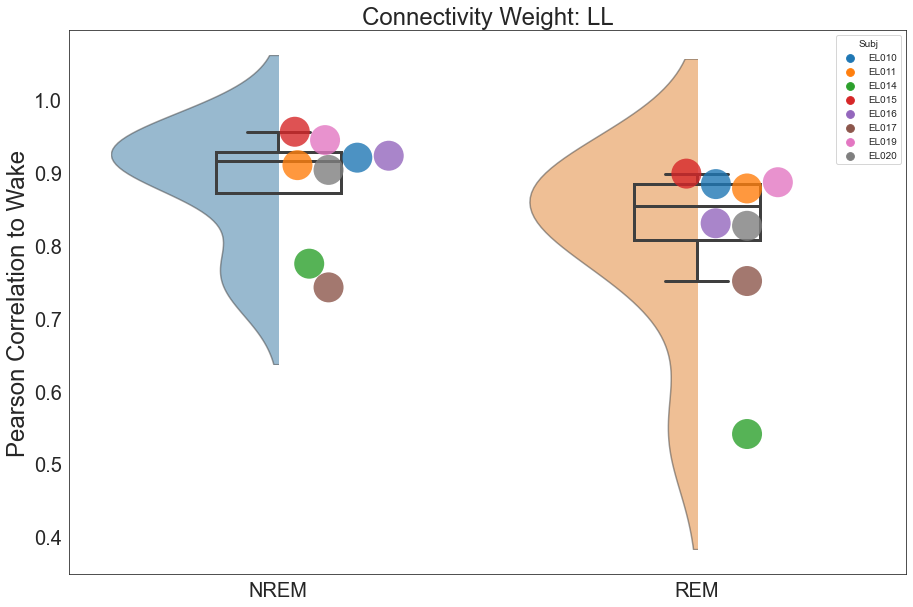

In [227]:
data_plot = arr_subj[arr_subj.weight=='LL']

xx = 'SleepState'
yy = 'P'
sns.set_style('white')
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.violinplot(x=xx, y=yy, data=data_plot, dodge=False,
                    scale="width", inner=None, alpha=.02)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
for violin in ax.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width / 2, height, transform=ax.transData))
    violin.set_alpha(0.5)

sns.boxplot(x=xx, y=yy, data=data_plot, saturation=1, showfliers=False,
            width=0.3, boxprops={'zorder': 3, 'facecolor': 'none'}, ax=ax, linewidth=3)
old_len_collections = len(ax.collections)

sns.swarmplot(x=xx, y=yy, data=data_plot, hue='Subj', dodge=False, ax=ax, alpha=0.8, s= 30)

# sns.stripplot(x=xx, y=yy, data=data_plot, dodge=False, ax=ax, alpha=0.8, s= 10)
for dots in ax.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0.12, 0]))
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Connectivity Weight: LL', fontsize=24)
plt.ylabel('Pearson Correlation to Wake', fontsize=24)
plt.xlabel("", fontsize=24)
#plt.savefig()

(0.5, 1.1)

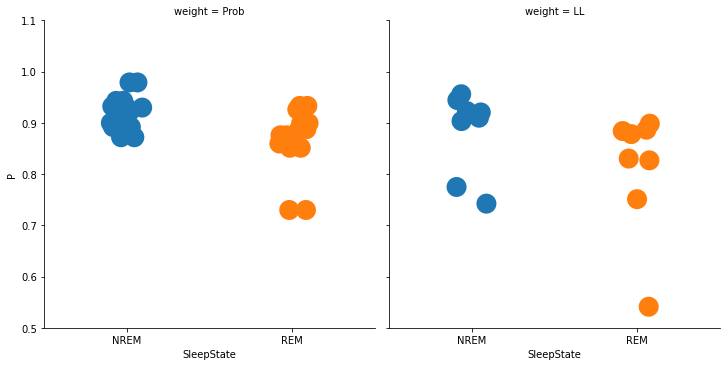

In [196]:
sns.catplot(x='SleepState', y='P', data= arr_subj, col='weight', s=20)
plt.ylim([0.5,1.1])

In [140]:
## SURROGATE
M_surr = np.zeros((len(subjs), n_surr, 2,2))
for subj, subj_ix in zip(subjs, np.arange(len(subjs))):
    dat_sel = data_con_subj[data_con_subj.Subj==subj]
    dat_sel = dat_sel.reset_index(drop=True)
    for n in tqdm.tqdm(range(n_surr)):
        dat_sel["SS"] = dat_sel.groupby(['Stim','Chan'], as_index=False)["SS"].transform(np.random.permutation)
        G = dat_sel.groupby(['Stim','Chan','ChanR','StimR','SS'], as_index=False)[['Sig','LLs', 'd']].mean()
        chans =np.unique(G[['Stim','Chan']].astype('int'))
        M = np.zeros((np.max(chans)+1, np.max(chans)+1,3,2))-1
        for sc in chans:
            for ss,ss_ix in zip(['Wake', 'NREM', 'REM'], np.arange(3)):
                dat = G.loc[(G.SS==ss)&(G.Stim==sc), ['Chan', 'Sig', 'LLs']].values
                M[sc, dat[:,0].astype('int'),ss_ix,0] = dat[:,1]
                M[sc, dat[:,0].astype('int'),ss_ix,1] = dat[:,2]
        for ss,ss_ix in zip(['NREM', 'REM'], np.arange(1,3)):
            for m, mix in zip(['Prob', 'LL'], np.arange(2)):
                x = M[:,:,0,mix].flatten()
                y = M[:,:,ss_ix,mix].flatten()
                ix = (x>0)|(y>0)
                y = y[ix]
                x = x[ix]
                M_surr[subj_ix, n,ss_ix-1, mix] = np.corrcoef(x,y)[0,1]

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [22:12<00:00,  6.66s/it]


In [167]:
#arr_subj.insert(4,'Sig',0)
arr_subj.insert(4,'thr_L',0)
arr_subj.insert(4,'thr_H',0)
# arr_subj.insert(4,'weight',arr_subj.Weigth)
arr_subj.Sig = 0
for subj, subj_ix in zip(subjs, np.arange(len(subjs))):
    for ss,ss_ix in zip(['NREM', 'REM'], np.arange(1,3)):
            for m, mix in zip(['Prob', 'LL'], np.arange(2)):
                thr_L = np.percentile(M_surr[subj_ix, :,ss_ix-1, mix],1)
                thr_H = np.percentile(M_surr[subj_ix, :,ss_ix-1, mix],99)
                arr_subj.loc[(arr_subj.Subj==subj)&(arr_subj.weight==m)&(arr_subj.SleepState==ss),'thr_L'] = thr_L
                arr_subj.loc[(arr_subj.Subj==subj)&(arr_subj.weight==m)&(arr_subj.SleepState==ss),'thr_H'] = thr_H
                arr_subj.loc[(arr_subj.Subj==subj)&(arr_subj.weight==m)&(arr_subj.P<thr_L)&(arr_subj.SleepState==ss),'Sig'] = 1
                arr_subj.loc[(arr_subj.Subj==subj)&(arr_subj.weight==m)&(arr_subj.P>thr_H)&(arr_subj.SleepState==ss),'Sig'] = 1

In [194]:
sns.catplot(x='SleepState', y='P', hue='Sig', data= arr_subj, col='weight', s=20)
plt.ylim([0.5,1.1])

ValueError: Could not interpret input 'Sig'

(0.5, 1.1)

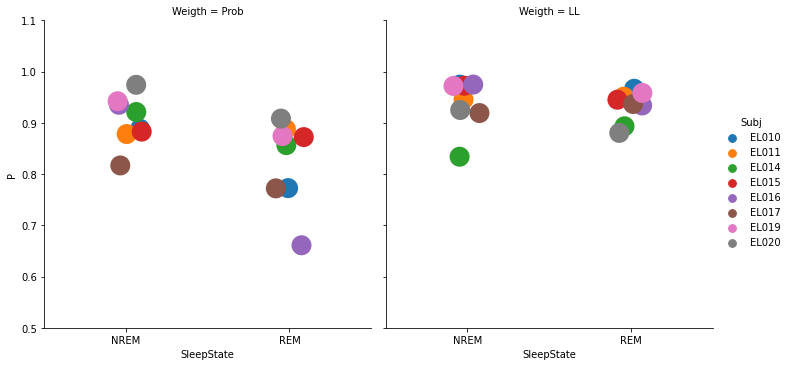

In [176]:
sns.catplot(x='SleepState', y='P', hue='Subj', data= arr_subj, col='Weigth', s=20)
plt.ylim([0.5,1.1])

## Nodes

In [107]:
G_count = data_con_subj.groupby(['Subj','Stim','Chan','ChanR','StimR','SleepState'], as_index=False)[['d']].count()
G_count = G_count[(G_count.SleepState!='NREM1')&(G_count.d<3)]
G_count = G_count.reset_index(drop=True)

In [116]:
data_con_subj.loc[data_con_subj.Sig ==0, "LLs"] = np.nan

In [120]:
G[(G.Subj=='EL011')&(G.Stim==0)&(G.Chan==2)]

Subj  Stim  Chan          ChanR          StimR SleepState       Sig  \
3849  EL011   0.0   2.0  Mesiotemporal  Mesiotemporal       NREM  0.868421   
3850  EL011   0.0   2.0  Mesiotemporal  Mesiotemporal        REM  0.750000   
3851  EL011   0.0   2.0  Mesiotemporal  Mesiotemporal       Wake  0.846154   

           LLs    d  
3849  3.321451  7.0  
3850  3.125836  7.0  
3851  3.411744  7.0

In [113]:
G[(G.Subj=='EL011')&(G.Stim==19)&(G.Chan==85)]

Subj  Stim  Chan         ChanR          StimR SleepState       Sig  \
6087  EL011  19.0  85.0  Dorsofrontal  Mesiotemporal       NREM  0.658537   
6088  EL011  19.0  85.0  Dorsofrontal  Mesiotemporal        REM  0.111111   
6089  EL011  19.0  85.0  Dorsofrontal  Mesiotemporal       Wake  0.071429   

           LLs      d  
6087  3.526527  69.18  
6088  0.401551  69.18  
6089  0.261412  69.18

In [117]:
G = data_con_subj.groupby(['Subj','Stim','Chan','ChanR','StimR','SleepState'], as_index=False)[['Sig','LLs', 'd']].mean()
G = G[(G.SleepState!='NREM1')]
G_count = G_count.reset_index(drop=True)
for ss in ['Wake', 'NREM', 'REM']:
    G_count.SleepState = ss
    G = pd.concat([G, G_count]).drop_duplicates(['Subj','Stim','Chan','SleepState'],keep=False)
    G = G.reset_index(drop=True)
metrics = ['Sig','LLs']

In [168]:
degree_file = sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\\G_deg.csv'

G_deg.to_csv(degree_file,
        header=True, index=False)


In [167]:
G_deg

Subj   Chan          ChanR  Deg SleepState        Sig         LLs  \
0     EL010    0.0  Mesiotemporal   in       NREM   8.419460   45.198607   
1     EL010    0.0  Mesiotemporal   in        REM   8.904762   39.057758   
2     EL010    0.0  Mesiotemporal   in       Wake   8.117595   46.487570   
3     EL010    1.0   Basotemporal   in       NREM  10.121856   50.177918   
4     EL010    1.0   Basotemporal   in        REM  10.078571   42.949185   
...     ...    ...            ...  ...        ...        ...         ...   
2679  EL020  104.0  Orbitofrontal  out        REM  14.454545  126.516734   
2680  EL020  104.0  Orbitofrontal  out       Wake  12.609008  166.798192   
2681  EL020  105.0  Orbitofrontal  out       NREM  14.250000  133.881105   
2682  EL020  105.0  Orbitofrontal  out        REM  14.545455  200.277120   
2683  EL020  105.0  Orbitofrontal  out       Wake  13.237624  136.102509   

         Sig_n     LLs_n  
0     1.037186  0.972273  
1     1.096970  0.840176  
2     1.000000  1.000000  
3     1.094231  0.837301  
4     1.089551  0.716678  
...        ...       ...  
2679  1.146367  0.758502  
2680  1.000000  1.000000  
2681  1.076477  0.983678  
2682  1.098796  1.471517  
2683  1.000000  1.000000  

[2684 rows x 9 columns]

In [126]:
metrics = ['Sig','LLs']
# degrees: sum up all CCEP magnitudes with specific channel being reponse or stimulation channel
G_in = G.groupby(['Subj','Chan','ChanR','SleepState'], as_index=False)[metrics].sum()
G_in.insert(3,'Deg', 'in')
G_out = G.groupby(['Subj','Stim','StimR','SleepState'], as_index=False)[metrics].sum()
G_out.insert(3,'Deg', 'out')
G_out.insert(0,'Chan', G_out.Stim)
G_out.insert(0,'ChanR', G_out.StimR)
G_deg = pd.concat([G_in,G_out])
G_deg = G_deg.reset_index(drop=True)
G_deg = G_deg.drop(columns=['Stim'])
G_deg = G_deg.drop(columns=['StimR'])
for m in metrics:
    means_stds = G_deg.groupby(['Subj','Chan','Deg','SleepState'])[m].agg(['mean','std']).reset_index()
    means_stds = means_stds[means_stds.SleepState=='Wake']
    means_stds = means_stds.drop(columns=['SleepState'])
    G_deg = G_deg.merge(means_stds,on=['Subj','Chan','Deg'])
    G_deg[m+'_n'] = (G_deg[m] / G_deg['mean']) 
    G_deg = G_deg.drop(columns=['mean', 'std'])
    
# G_deg.insert(1, 'Lobe', G_deg.ChanR)
# for region in np.unique(G_deg[['ChanR']]):
#     if len(regions.Lobe[regions.label==region].values)>0:
#         lobe = regions.Lobe[regions.label==region].values[0]
#     else:
#         lobe = 'out'
#     G_deg.loc[G_deg.ChanR==region, 'Lobe'] = lobe

deg_summary = G_deg[(G_deg.ChanR != 'Unknown')&(G_deg.ChanR != 'out')&(G_deg.SleepState != 'Wake')]
deg_summary = deg_summary.reset_index(drop=True)
deg_summary = deg_summary.groupby(['ChanR', 'Deg','SleepState'], as_index=False)[['Sig_n','LLs_n']].mean()


In [266]:
G = data_con_subj_clean.groupby(['Subj','Stim','Chan','ChanR','StimR','SleepState'], as_index=False)[['Sig','LLs', 'd']].mean()
G = G[(G.SleepState!='NREM1')]
G_count = G_count.reset_index(drop=True)
for ss in ['Wake', 'NREM', 'REM']:
    G_count.SleepState = ss
    G = pd.concat([G, G_count]).drop_duplicates(['Subj','Stim','Chan','SleepState'],keep=False)
    G = G.reset_index(drop=True)
metrics = ['Sig','LLs']
# degrees: sum up all CCEP magnitudes with specific channel being reponse or stimulation channel
G_in = G.groupby(['Subj','Chan','ChanR','SleepState'], as_index=False)[metrics].sum()
G_in.insert(3,'Deg', 'in')
G_out = G.groupby(['Subj','Stim','StimR','SleepState'], as_index=False)[metrics].sum()
G_out.insert(3,'Deg', 'out')
G_out.insert(0,'Chan', G_out.Stim)
G_out.insert(0,'ChanR', G_out.StimR)
G_deg = pd.concat([G_in,G_out])
G_deg = G_deg.reset_index(drop=True)
G_deg = G_deg.drop(columns=['Stim'])
G_deg = G_deg.drop(columns=['StimR'])
for m in metrics:
    means_stds = G_deg.groupby(['Subj','Chan','Deg','SleepState'])[m].agg(['mean','std']).reset_index()
    means_stds = means_stds[means_stds.SleepState=='Wake']
    means_stds = means_stds.drop(columns=['SleepState'])
    G_deg = G_deg.merge(means_stds,on=['Subj','Chan','Deg'])
    G_deg[m+'_n'] = (G_deg[m] / G_deg['mean']) 
    G_deg = G_deg.drop(columns=['mean', 'std'])
    
G_deg.insert(1, 'Lobe', G_deg.ChanR)
for region in np.unique(G_deg[['ChanR']]):
    if len(regions.Lobe[regions.label==region].values)>0:
        lobe = regions.Lobe[regions.label==region].values[0]
    else:
        lobe = 'out'
    G_deg.loc[G_deg.ChanR==region, 'Lobe'] = lobe

deg_summary = G_deg[(G_deg.Lobe != 'Unknown')&(G_deg.Lobe != 'out')&(G_deg.SleepState != 'Wake')]
deg_summary = deg_summary.reset_index(drop=True)
deg_summary = deg_summary.groupby(['Lobe', 'Deg','SleepState'], as_index=False)[['Sig_n','LLs_n']].mean()


In [166]:
G_deg.to_csv

Subj   Chan          ChanR  Deg SleepState        Sig         LLs  \
0     EL010    0.0  Mesiotemporal   in       NREM   8.419460   45.198607   
1     EL010    0.0  Mesiotemporal   in        REM   8.904762   39.057758   
2     EL010    0.0  Mesiotemporal   in       Wake   8.117595   46.487570   
3     EL010    1.0   Basotemporal   in       NREM  10.121856   50.177918   
4     EL010    1.0   Basotemporal   in        REM  10.078571   42.949185   
...     ...    ...            ...  ...        ...        ...         ...   
2679  EL020  104.0  Orbitofrontal  out        REM  14.454545  126.516734   
2680  EL020  104.0  Orbitofrontal  out       Wake  12.609008  166.798192   
2681  EL020  105.0  Orbitofrontal  out       NREM  14.250000  133.881105   
2682  EL020  105.0  Orbitofrontal  out        REM  14.545455  200.277120   
2683  EL020  105.0  Orbitofrontal  out       Wake  13.237624  136.102509   

         Sig_n     LLs_n  
0     1.037186  0.972273  
1     1.096970  0.840176  
2     1.000000  1.000000  
3     1.094231  0.837301  
4     1.089551  0.716678  
...        ...       ...  
2679  1.146367  0.758502  
2680  1.000000  1.000000  
2681  1.076477  0.983678  
2682  1.098796  1.471517  
2683  1.000000  1.000000  

[2684 rows x 9 columns]

In [275]:
deg_summary.insert(5,'N',i)

### surrogate

In [282]:
n = 200
surr_data = np.zeros((len(G_deg),n))
for i in range(0,n):
    print('loading -- ' + str(i+1)+'/'+str(n), end='\r')
    data_con_subj["SS"] = data_con_subj.groupby(['Subj','Stim','Chan'], as_index=False)["SS"].transform(np.random.permutation)
    G = data_con_subj.groupby(['Subj','Stim','Chan','ChanR','StimR','SS'], as_index=False)[['Sig','LLs', 'd']].mean()
    metrics = ['Sig', 'LLs']
    # degrees: sum up all CCEP magnitudes with specific channel being reponse or stimulation channel
    G_in = G.groupby(['Subj','Chan','ChanR','SS'], as_index=False)[metrics].sum()
    G_in.insert(3,'Deg', 'in')
    G_out = G.groupby(['Subj','Stim','StimR','SS'], as_index=False)[metrics].sum()
    G_out.insert(3,'Deg', 'out')
    G_out.insert(0,'Chan', G_out.Stim)
    G_out.insert(0,'ChanR', G_out.StimR)
    G_deg_surr = pd.concat([G_in,G_out])
    G_deg_surr = G_deg_surr.reset_index(drop=True)
    G_deg_surr = G_deg_surr.drop(columns=['Stim'])
    G_deg_surr = G_deg_surr.drop(columns=['StimR'])
    for m in metrics:
        means_stds = G_deg_surr.groupby(['Subj','Chan','Deg','SS'])[m].agg(['mean','std']).reset_index()
        means_stds = means_stds[means_stds.SS=='Wake']
        means_stds = means_stds.drop(columns=['SS'])
        G_deg_surr = G_deg_surr.merge(means_stds,on=['Subj','Chan','Deg'])
        G_deg_surr[m+'_n'] = (G_deg_surr[m] / G_deg_surr['mean']) 
        G_deg_surr = G_deg_surr.drop(columns=['mean', 'std'])
    #surr_data[:,i] =G_deg_surr.values[:,-1]
    G_deg_surr.insert(1, 'Lobe', G_deg_surr.ChanR)
    for region in np.unique(G_deg_surr[['ChanR']]):
        if len(regions.Lobe[regions.label==region].values)>0:
            lobe = regions.Lobe[regions.label==region].values[0]
        else:
            lobe = 'out'
        G_deg_surr.loc[G_deg_surr.ChanR==region, 'Lobe'] = lobe

    deg_summary = G_deg_surr[(G_deg_surr.Lobe != 'Unknown')&(G_deg_surr.Lobe != 'out')&(G_deg_surr.SS != 'Wake')]
    deg_summary = deg_summary.reset_index(drop=True)
    deg_summary = deg_summary.groupby(['Lobe', 'Deg', 'SS'], as_index=False)[['Sig_n','LLs_n']].mean()
    deg_summary.insert(5,'N',i)
    if i == 0:
        deg_surr = deg_summary
    else:
        deg_surr = pd.concat([deg_surr, deg_summary])
deg_surr.to_csv(data_con_surr,
            header=True, index=False)

In [131]:
deg_summary

ChanR  Deg SleepState     Sig_n     LLs_n
0     Basotemporal   in       NREM  0.987541  1.022597
1     Basotemporal   in        REM  0.985850  0.857825
2     Basotemporal  out       NREM  0.956787  0.974217
3     Basotemporal  out        REM  0.977255  0.830122
4          Central   in       NREM  1.042135  0.914580
5          Central   in        REM  1.076656  0.884033
6          Central  out       NREM  1.041948  0.856865
7          Central  out        REM  1.017924  0.831082
8     Dorsofrontal   in       NREM  1.099004  1.005671
9     Dorsofrontal   in        REM  1.037838  0.872438
10    Dorsofrontal  out       NREM  1.052139  0.949543
11    Dorsofrontal  out        REM  1.011859  0.810726
12          Insula   in       NREM  1.003181  1.038954
13          Insula   in        REM  0.986900  0.929286
14          Insula  out       NREM  1.021803  0.990899
15          Insula  out        REM  1.014303  0.878612
16  Laterotemporal   in       NREM  0.995899  0.952143
17  Laterotemporal   in        REM  0.979626  0.809098
18  Laterotemporal  out       NREM  0.996456  0.997250
19  Laterotemporal  out        REM  0.971396  0.764563
20   Mesiotemporal   in       NREM  0.974293  1.110904
21   Mesiotemporal   in        REM  0.997843  0.842142
22   Mesiotemporal  out       NREM  0.970548  1.024802
23   Mesiotemporal  out        REM  0.963053  0.816520
24        Necrosis   in       NREM  0.975374  0.604303
25        Necrosis   in        REM  0.875021  0.470949
26       Occipital   in       NREM  0.965556  0.880616
27       Occipital   in        REM  0.919697  0.662776
28       Occipital  out       NREM  1.009284  0.982416
29       Occipital  out        REM  0.971889  0.680135
30   Orbitofrontal   in       NREM  1.035074  0.946920
31   Orbitofrontal   in        REM  1.037986  0.949125
32   Orbitofrontal  out       NREM  1.022225  0.872009
33   Orbitofrontal  out        REM  1.033272  0.882660
34        Parietal   in       NREM  1.030655  0.935327
35        Parietal   in        REM  1.001986  0.751541
36        Parietal  out       NREM  1.021705  0.895726
37        Parietal  out        REM  1.019234  0.736984
38  Superotemporal   in       NREM  0.942599  0.846980
39  Superotemporal   in        REM  0.882827  0.640055
40  Superotemporal  out       NREM  1.067378  0.964774
41  Superotemporal  out        REM  1.048569  0.628038

In [ ]:
deg_summary.insert(3,'thr_H', np.percentile(deg_surr.values[:,3:],99,1))
deg_summary.insert(3,'thr_L', np.percentile(deg_surr.values[:,3:],1,1))
deg_summary.insert(3,'Sig', (deg_summary.LLs_n<deg_summary.thr_L)|(deg_summary.LLs_n>deg_summary.thr_H))

In [303]:
G_deg_sum = G_deg.groupby(['Subj','Chan','Lobe','SleepState'], as_index=False)[['Sig','LLs', 'Sig_n', 'LLs_n']].sum()

In [133]:
G_deg_in = G_deg[G_deg.Deg=='in']
G_deg_out = G_deg[G_deg.Deg=='out']

##### Ratio

In [315]:
G_deg_r = G_deg_in.merge(G_deg_out, on=['Subj','Chan','Lobe','SleepState'])
for m in ['Sig', 'LLs', 'Sig_n', 'LLs_n']:
    G_deg_r.insert(0, m+'_R', G_deg_r[m+'_x']/G_deg_r[m+'_y'])
y= 15
for m in ['Sig', 'LLs', 'Sig_n', 'LLs_n']:
    if m =='Sig_n':
        y= 3
    g = sns.catplot(x ='Lobe', y=m+'_R', hue='SleepState', data= G_deg_r[(G_deg_r.Lobe != 'Central')&(G_deg_r.Lobe != 'Unknown')&(G_deg_r.Lobe != 'out')&(G_deg_r.SleepState != 'Wake')], kind='strip',height=8,aspect= 3, s=10, palette=['#27348B','#FF8007'])
    ax = g.axes  # access a grid of 'axes' objects
    plt.ylim([0,y])
    ax[0,0].axhline(1, color='k', linewidth=2)
    plt.xticks(fontsize=20)
    ax[0,0].tick_params(labelsize=20)
    ax[0,0].set_title('Ratio-Degree', fontsize=25)
    ax[0,0].set_ylabel('Ratio Degree '+m, fontsize=25)
    plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_Ratio_'+m+'.svg')

###### Sum

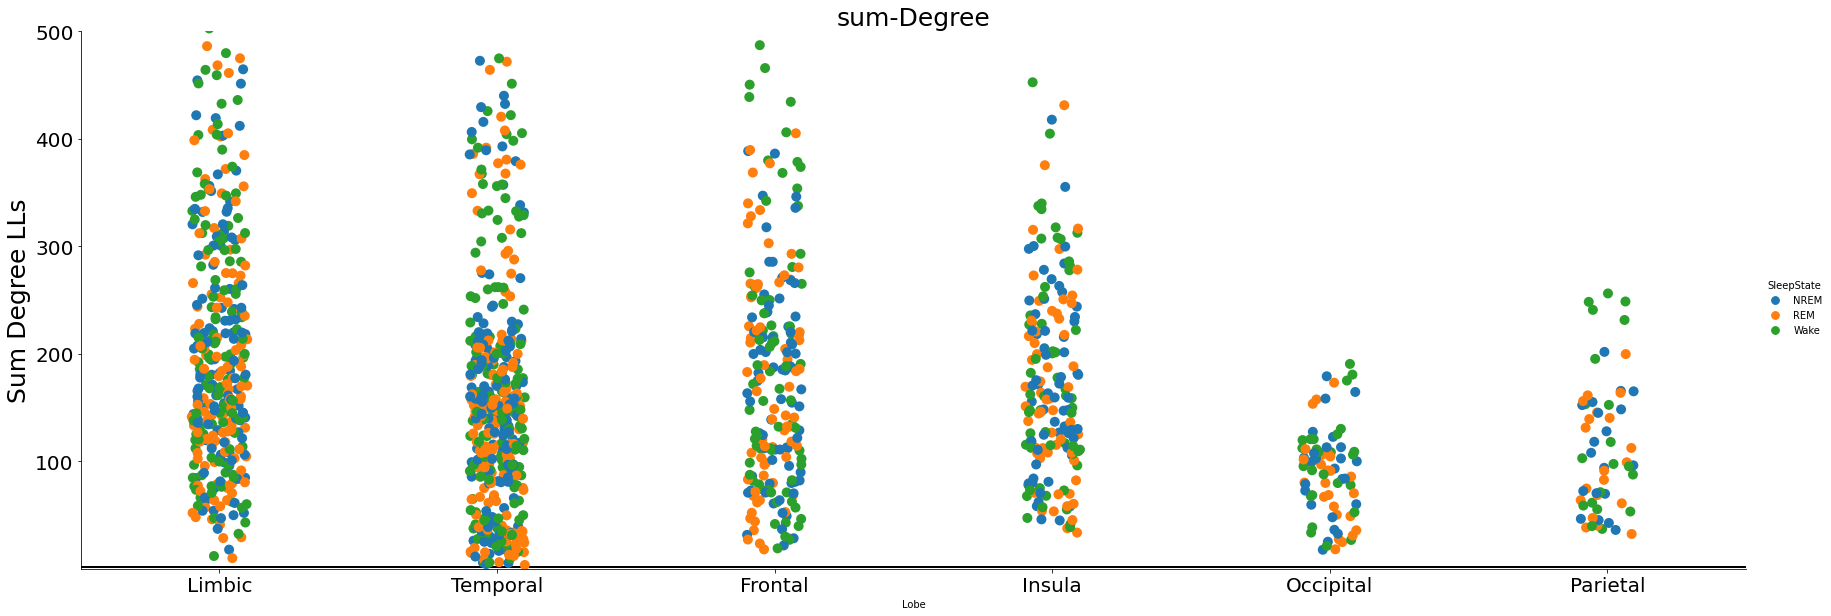

In [329]:
m = 'LLs'
g = sns.catplot(x ='Lobe', y=m, hue='SleepState', data= G_deg_sum[(G_deg_sum.Lobe != 'Central')&(G_deg_sum.Lobe != 'Unknown')&(G_deg_sum.Lobe != 'out')], kind='strip',height=8,aspect= 3, s=10)
ax = g.axes  # access a grid of 'axes' objects
plt.ylim([0.2,500])
ax[0,0].axhline(2, color='k', linewidth=2)
plt.xticks(fontsize=20)
ax[0,0].tick_params(labelsize=20)
ax[0,0].set_title('sum-Degree', fontsize=25)
ax[0,0].set_ylabel('Sum Degree '+m, fontsize=25)
plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_Sum_'+m+'.svg')

In [ ]:
m = 'LLs_n'
g = sns.catplot(x ='Lobe', y=m, hue='SleepState', data= G_deg_sum[(G_deg_sum.Lobe != 'Central')&(G_deg_sum.Lobe != 'Unknown')&(G_deg_sum.Lobe != 'out')&(G_deg_sum.SleepState != 'Wake')], kind='swarm',height=8,aspect= 3, s=10, palette=['#27348B','#FF8007'])
ax = g.axes  # access a grid of 'axes' objects
plt.ylim([1.2,3])
ax[0,0].axhline(2, color='k', linewidth=2)
plt.xticks(fontsize=20)
ax[0,0].tick_params(labelsize=20)
ax[0,0].set_title('sum-Degree', fontsize=25)
ax[0,0].set_ylabel('Sum Degree '+m, fontsize=25)
#plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_Sum_'+m+'.svg')

#### single

In [139]:
G_deg

Subj   Chan          ChanR  Deg SleepState        Sig         LLs  \
0     EL010    0.0  Mesiotemporal   in       NREM   8.419460   45.198607   
1     EL010    0.0  Mesiotemporal   in        REM   8.904762   39.057758   
2     EL010    0.0  Mesiotemporal   in       Wake   8.117595   46.487570   
3     EL010    1.0   Basotemporal   in       NREM  10.121856   50.177918   
4     EL010    1.0   Basotemporal   in        REM  10.078571   42.949185   
...     ...    ...            ...  ...        ...        ...         ...   
2679  EL020  104.0  Orbitofrontal  out        REM  14.454545  126.516734   
2680  EL020  104.0  Orbitofrontal  out       Wake  12.609008  166.798192   
2681  EL020  105.0  Orbitofrontal  out       NREM  14.250000  133.881105   
2682  EL020  105.0  Orbitofrontal  out        REM  14.545455  200.277120   
2683  EL020  105.0  Orbitofrontal  out       Wake  13.237624  136.102509   

         Sig_n     LLs_n  
0     1.037186  0.972273  
1     1.096970  0.840176  
2     1.000000  1.000000  
3     1.094231  0.837301  
4     1.089551  0.716678  
...        ...       ...  
2679  1.146367  0.758502  
2680  1.000000  1.000000  
2681  1.076477  0.983678  
2682  1.098796  1.471517  
2683  1.000000  1.000000  

[2684 rows x 9 columns]

c:\users\i0328442\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\i0328442\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\i0328442\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\i0328442\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.wa

Text(8.317024739583339, 0.5, 'Degree normalized to Wake')

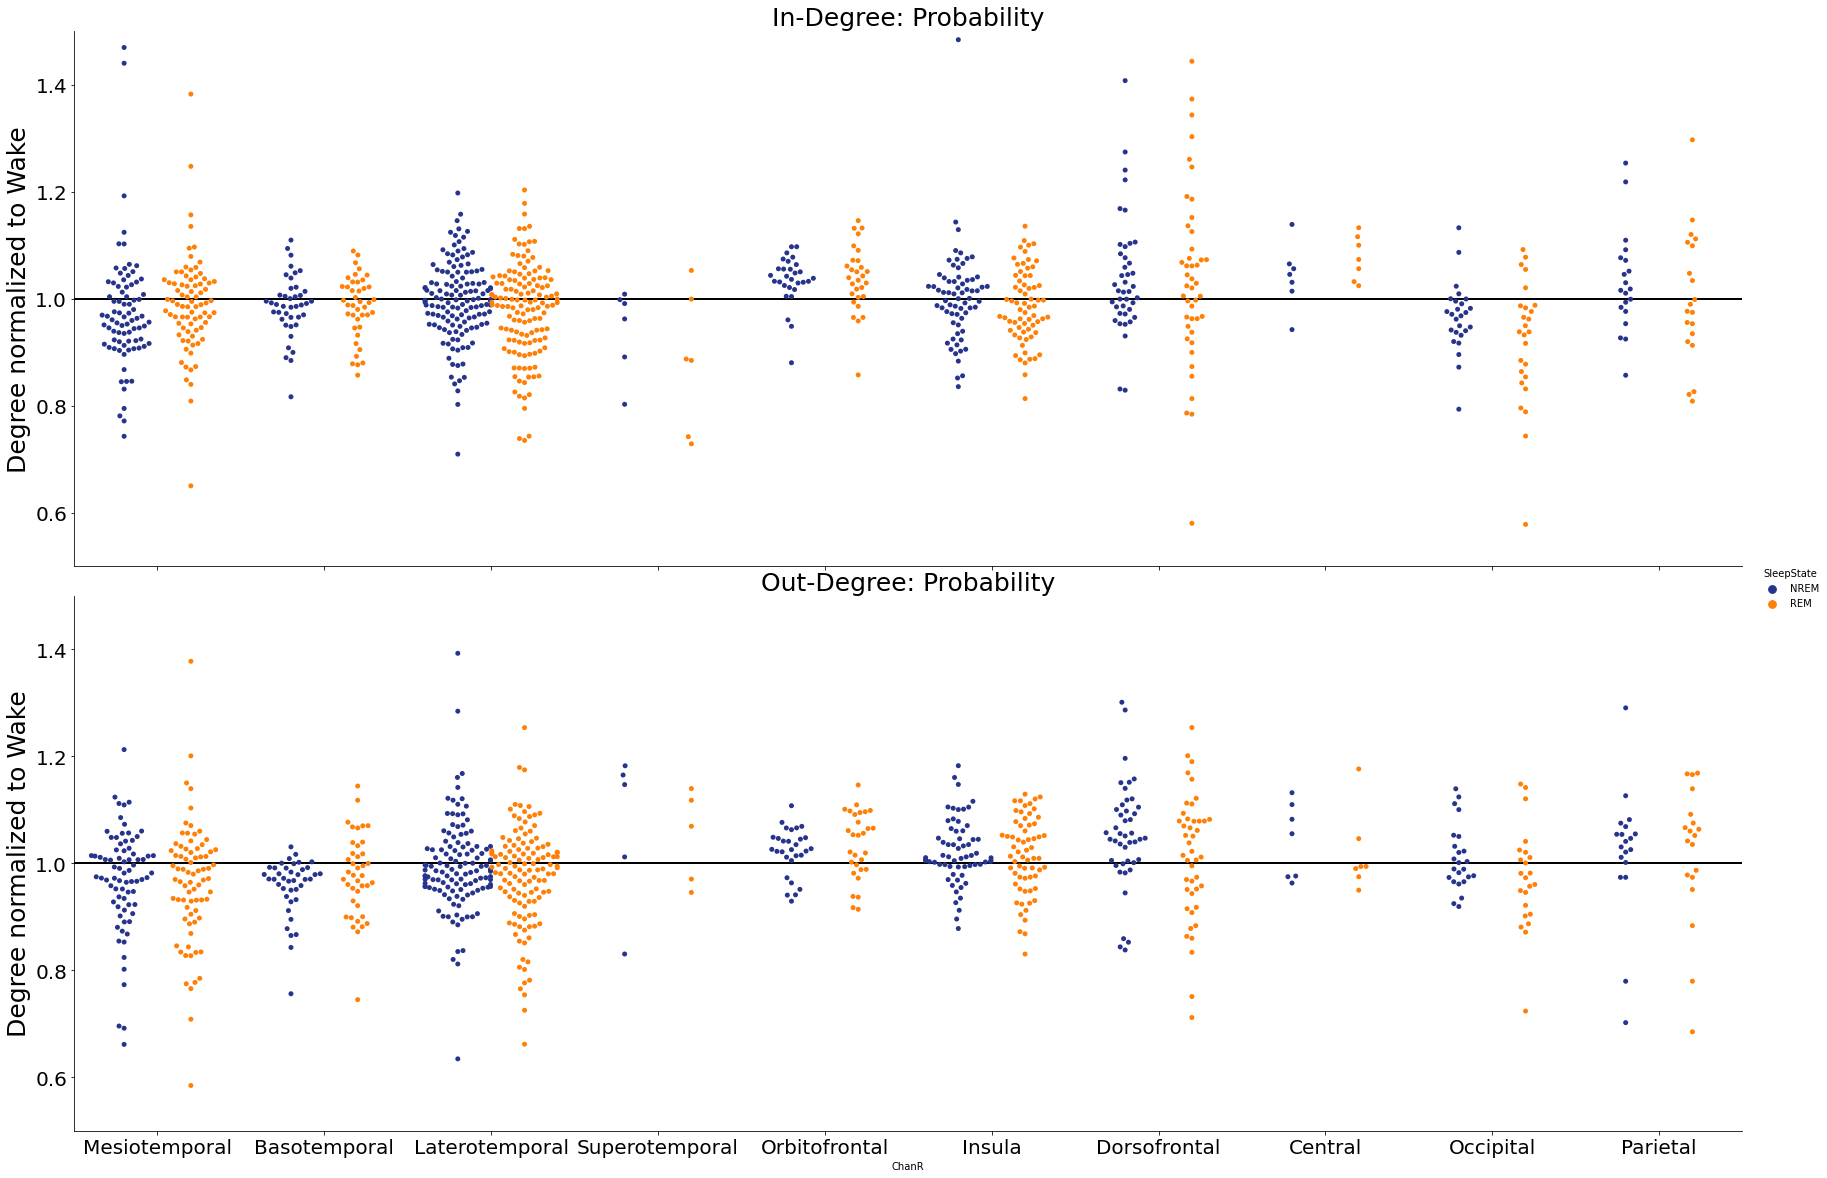

In [140]:
g = sns.catplot(x ='ChanR', y='Sig_n', hue='SleepState', data= G_deg[(G_deg.ChanR != 'Unknown')&(G_deg.ChanR != 'Necrosis')&(G_deg.SleepState != 'Wake')], row = 'Deg',dodge = True,  kind='swarm',height=8,aspect= 3, palette=['#27348B','#FF8007'])
ax = g.axes  # access a grid of 'axes' objects
plt.ylim([0.5,1.5])
ax[0,0].axhline(1, color='k', linewidth=2)
ax[1,0].axhline(1, color='k', linewidth=2)
plt.xticks(fontsize=20)
ax[1,0].tick_params(labelsize=20)
ax[0,0].tick_params(labelsize=20)
ax[0,0].set_title('In-Degree: Probability', fontsize=25)
ax[1,0].set_title('Out-Degree: Probability', fontsize=25)
ax[0,0].set_ylabel('Degree normalized to Wake', fontsize=25)
ax[1,0].set_ylabel('Degree normalized to Wake', fontsize=25)
# plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_P_nn_v.svg')
# plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_P_nn_v.jpg')

In [169]:
G_deg

Subj   Chan          ChanR  Deg SleepState        Sig         LLs  \
0     EL010    0.0  Mesiotemporal   in       NREM   8.419460   45.198607   
1     EL010    0.0  Mesiotemporal   in        REM   8.904762   39.057758   
2     EL010    0.0  Mesiotemporal   in       Wake   8.117595   46.487570   
3     EL010    1.0   Basotemporal   in       NREM  10.121856   50.177918   
4     EL010    1.0   Basotemporal   in        REM  10.078571   42.949185   
...     ...    ...            ...  ...        ...        ...         ...   
2679  EL020  104.0  Orbitofrontal  out        REM  14.454545  126.516734   
2680  EL020  104.0  Orbitofrontal  out       Wake  12.609008  166.798192   
2681  EL020  105.0  Orbitofrontal  out       NREM  14.250000  133.881105   
2682  EL020  105.0  Orbitofrontal  out        REM  14.545455  200.277120   
2683  EL020  105.0  Orbitofrontal  out       Wake  13.237624  136.102509   

         Sig_n     LLs_n  
0     1.037186  0.972273  
1     1.096970  0.840176  
2     1.000000  1.000000  
3     1.094231  0.837301  
4     1.089551  0.716678  
...        ...       ...  
2679  1.146367  0.758502  
2680  1.000000  1.000000  
2681  1.076477  0.983678  
2682  1.098796  1.471517  
2683  1.000000  1.000000  

[2684 rows x 9 columns]

c:\users\i0328442\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
c:\users\i0328442\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


Text(7.893973214285722, 0.5, 'Degree normalized to Wake [%]')

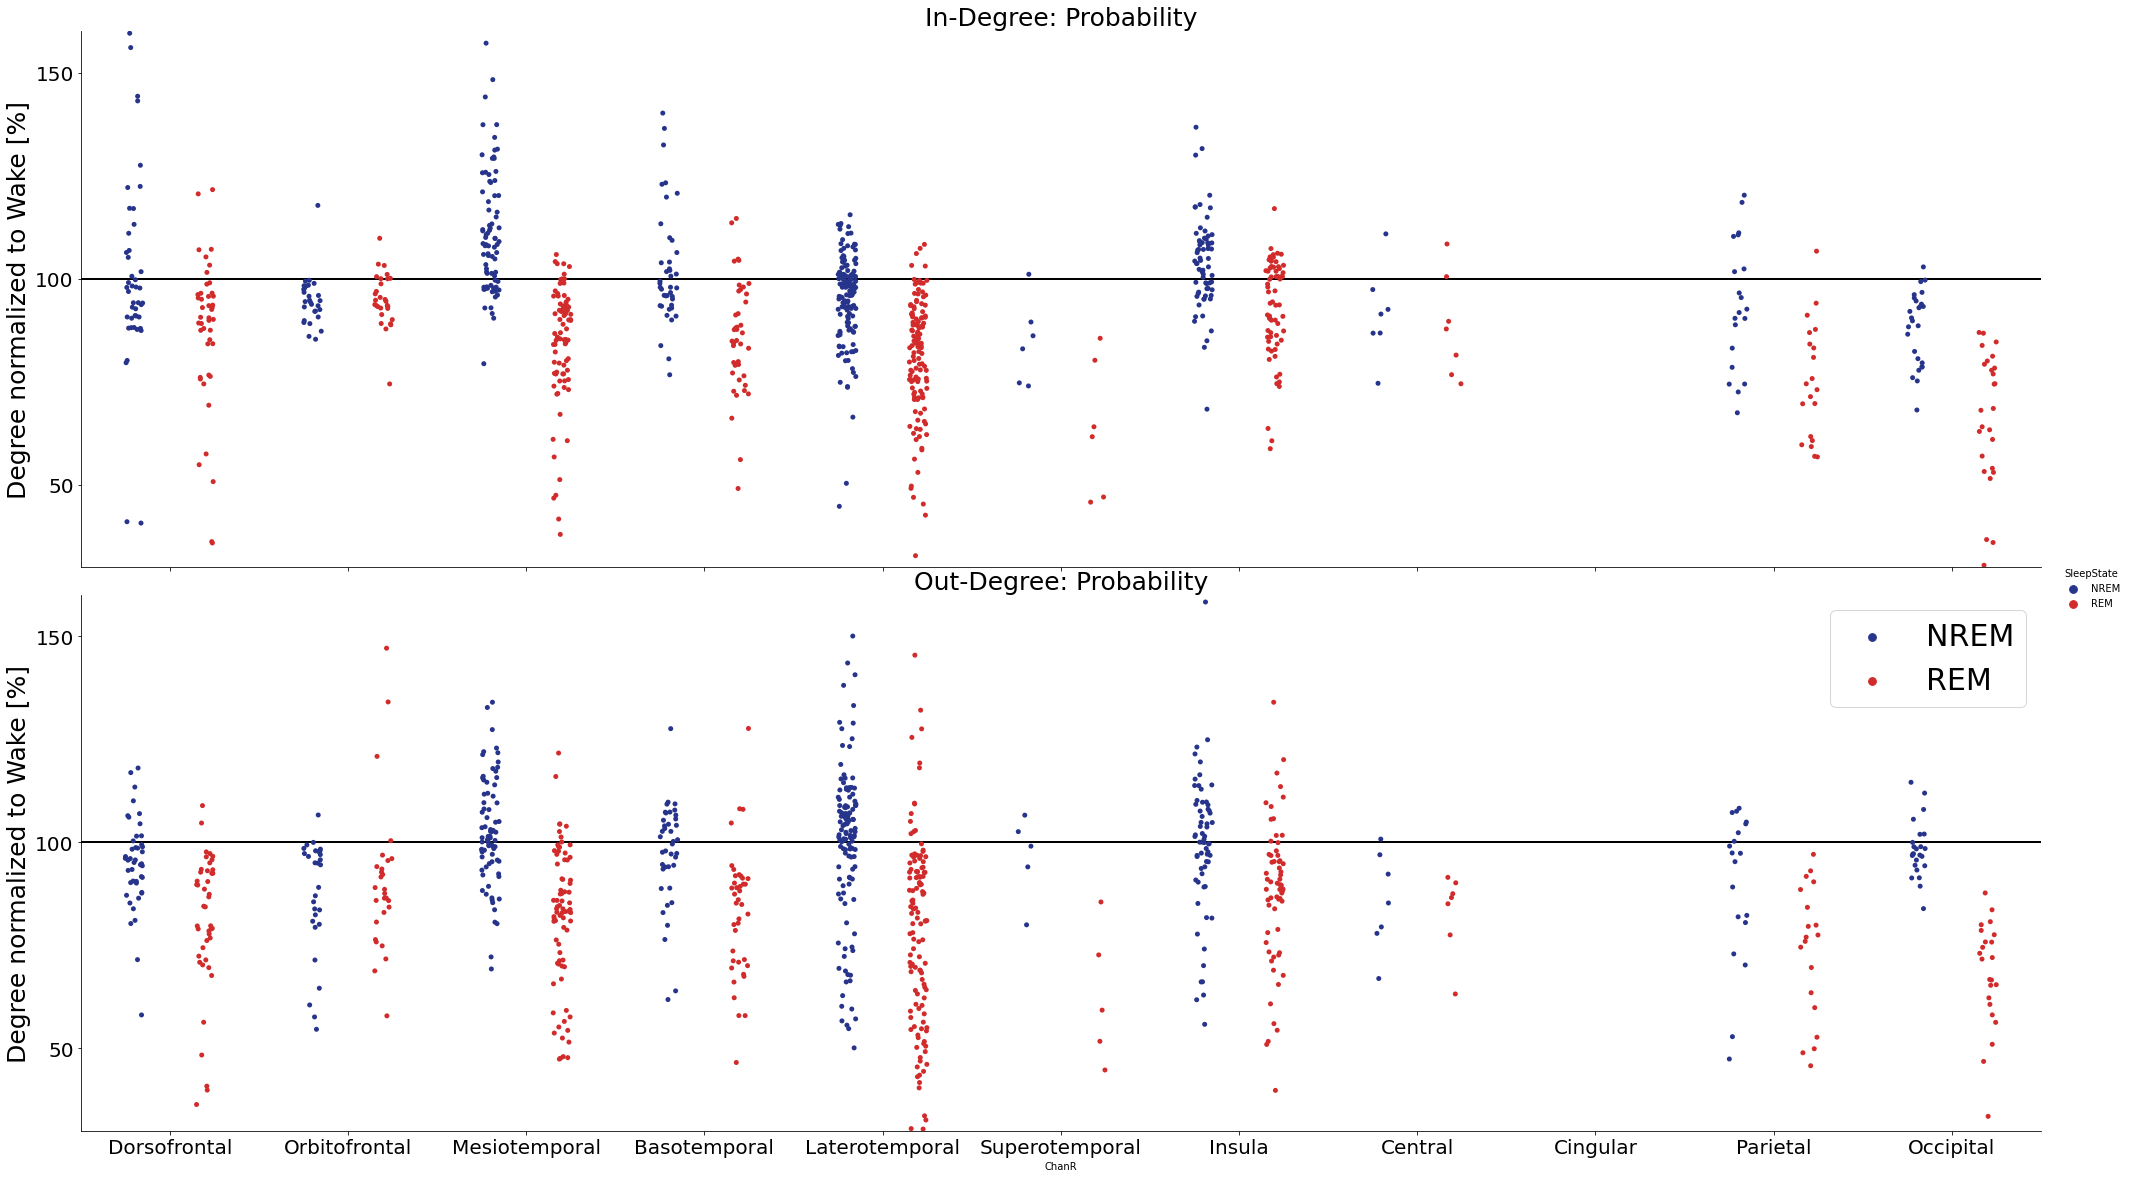

In [165]:
g = sns.catplot(x ='ChanR', y='LLs_n', hue='SleepState', data= G_deg[(G_deg.ChanR != 'Unknown')&(G_deg.ChanR != 'Necrosis')&(G_deg.SleepState != 'Wake')], row = 'Deg',dodge = True,  kind='strip',height=8,aspect= 3.5, order = regions_all, palette=['#27348B','#D22B2B'])
ax = g.axes  # access a grid of 'axes' objects
plt.ylim([0.3,1.6])
ax[0,0].axhline(1, color='k', linewidth=2)
ax[1,0].axhline(1, color='k', linewidth=2)
plt.xticks(fontsize=20)
plt.legend(fontsize=30)
ax[1,0].set_yticks([0.5, 1, 1.5], [50, 100, 150])
ax[0,0].set_yticks([0.5, 1, 1.5], [50, 100, 150])
ax[1,0].tick_params(labelsize=20)
ax[0,0].tick_params(labelsize=20)
ax[0,0].set_title('In-Degree: connection strength (LL)', fontsize=25)
ax[1,0].set_title('Out-Degree: connection strength (LL)', fontsize=25)
ax[0,0].set_ylabel('Degree normalized to Wake [%]', fontsize=25)
ax[1,0].set_ylabel('Degree normalized to Wake [%]', fontsize=25)
plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_LL.svg')
plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_LL.jpg')

In [135]:
G_deg

Subj   Chan          ChanR  Deg SleepState        Sig         LLs  \
0     EL010    0.0  Mesiotemporal   in       NREM   8.419460   45.198607   
1     EL010    0.0  Mesiotemporal   in        REM   8.904762   39.057758   
2     EL010    0.0  Mesiotemporal   in       Wake   8.117595   46.487570   
3     EL010    1.0   Basotemporal   in       NREM  10.121856   50.177918   
4     EL010    1.0   Basotemporal   in        REM  10.078571   42.949185   
...     ...    ...            ...  ...        ...        ...         ...   
2679  EL020  104.0  Orbitofrontal  out        REM  14.454545  126.516734   
2680  EL020  104.0  Orbitofrontal  out       Wake  12.609008  166.798192   
2681  EL020  105.0  Orbitofrontal  out       NREM  14.250000  133.881105   
2682  EL020  105.0  Orbitofrontal  out        REM  14.545455  200.277120   
2683  EL020  105.0  Orbitofrontal  out       Wake  13.237624  136.102509   

         Sig_n     LLs_n  
0     1.037186  0.972273  
1     1.096970  0.840176  
2     1.000000  1.000000  
3     1.094231  0.837301  
4     1.089551  0.716678  
...        ...       ...  
2679  1.146367  0.758502  
2680  1.000000  1.000000  
2681  1.076477  0.983678  
2682  1.098796  1.471517  
2683  1.000000  1.000000  

[2684 rows x 9 columns]

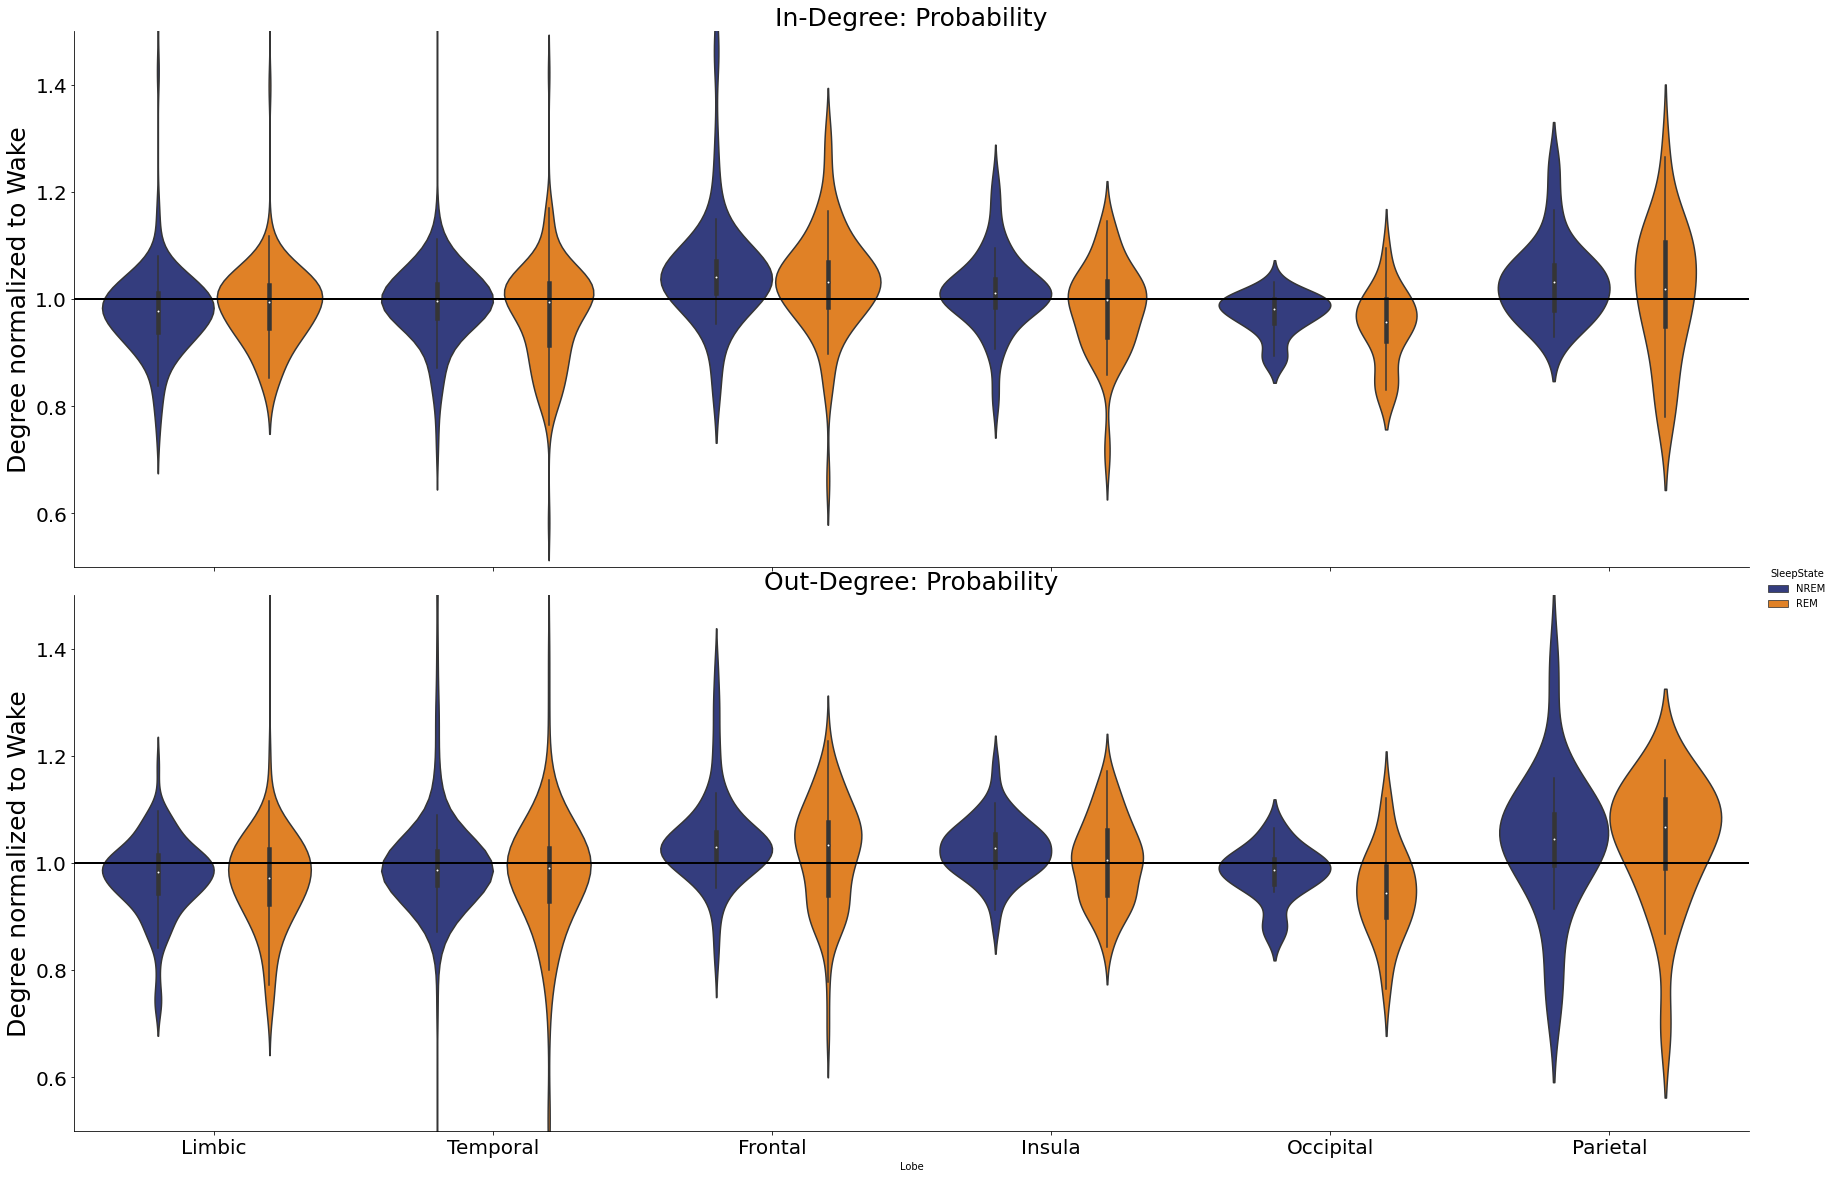

In [472]:
g = sns.catplot(x ='Lobe', y='Sig_n', hue='SleepState', data= G_deg[(G_deg.Lobe != 'Central')&(G_deg.Lobe != 'Unknown')&(G_deg.Lobe != 'out')&(G_deg.SleepState != 'Wake')], row = 'Deg', kind='violin',height=8,aspect= 3, palette=['#27348B','#FF8007'])
ax = g.axes  # access a grid of 'axes' objects
plt.ylim([0.5,1.5])
ax[0,0].axhline(1, color='k', linewidth=2)
ax[1,0].axhline(1, color='k', linewidth=2)
plt.xticks(fontsize=20)
ax[1,0].tick_params(labelsize=20)
ax[0,0].tick_params(labelsize=20)
ax[0,0].set_title('In-Degree: Probability', fontsize=25)
ax[1,0].set_title('Out-Degree: Probability', fontsize=25)
ax[0,0].set_ylabel('Degree normalized to Wake', fontsize=25)
ax[1,0].set_ylabel('Degree normalized to Wake', fontsize=25)
plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_P_nn_v.svg')
plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_P_nn_v.jpg')

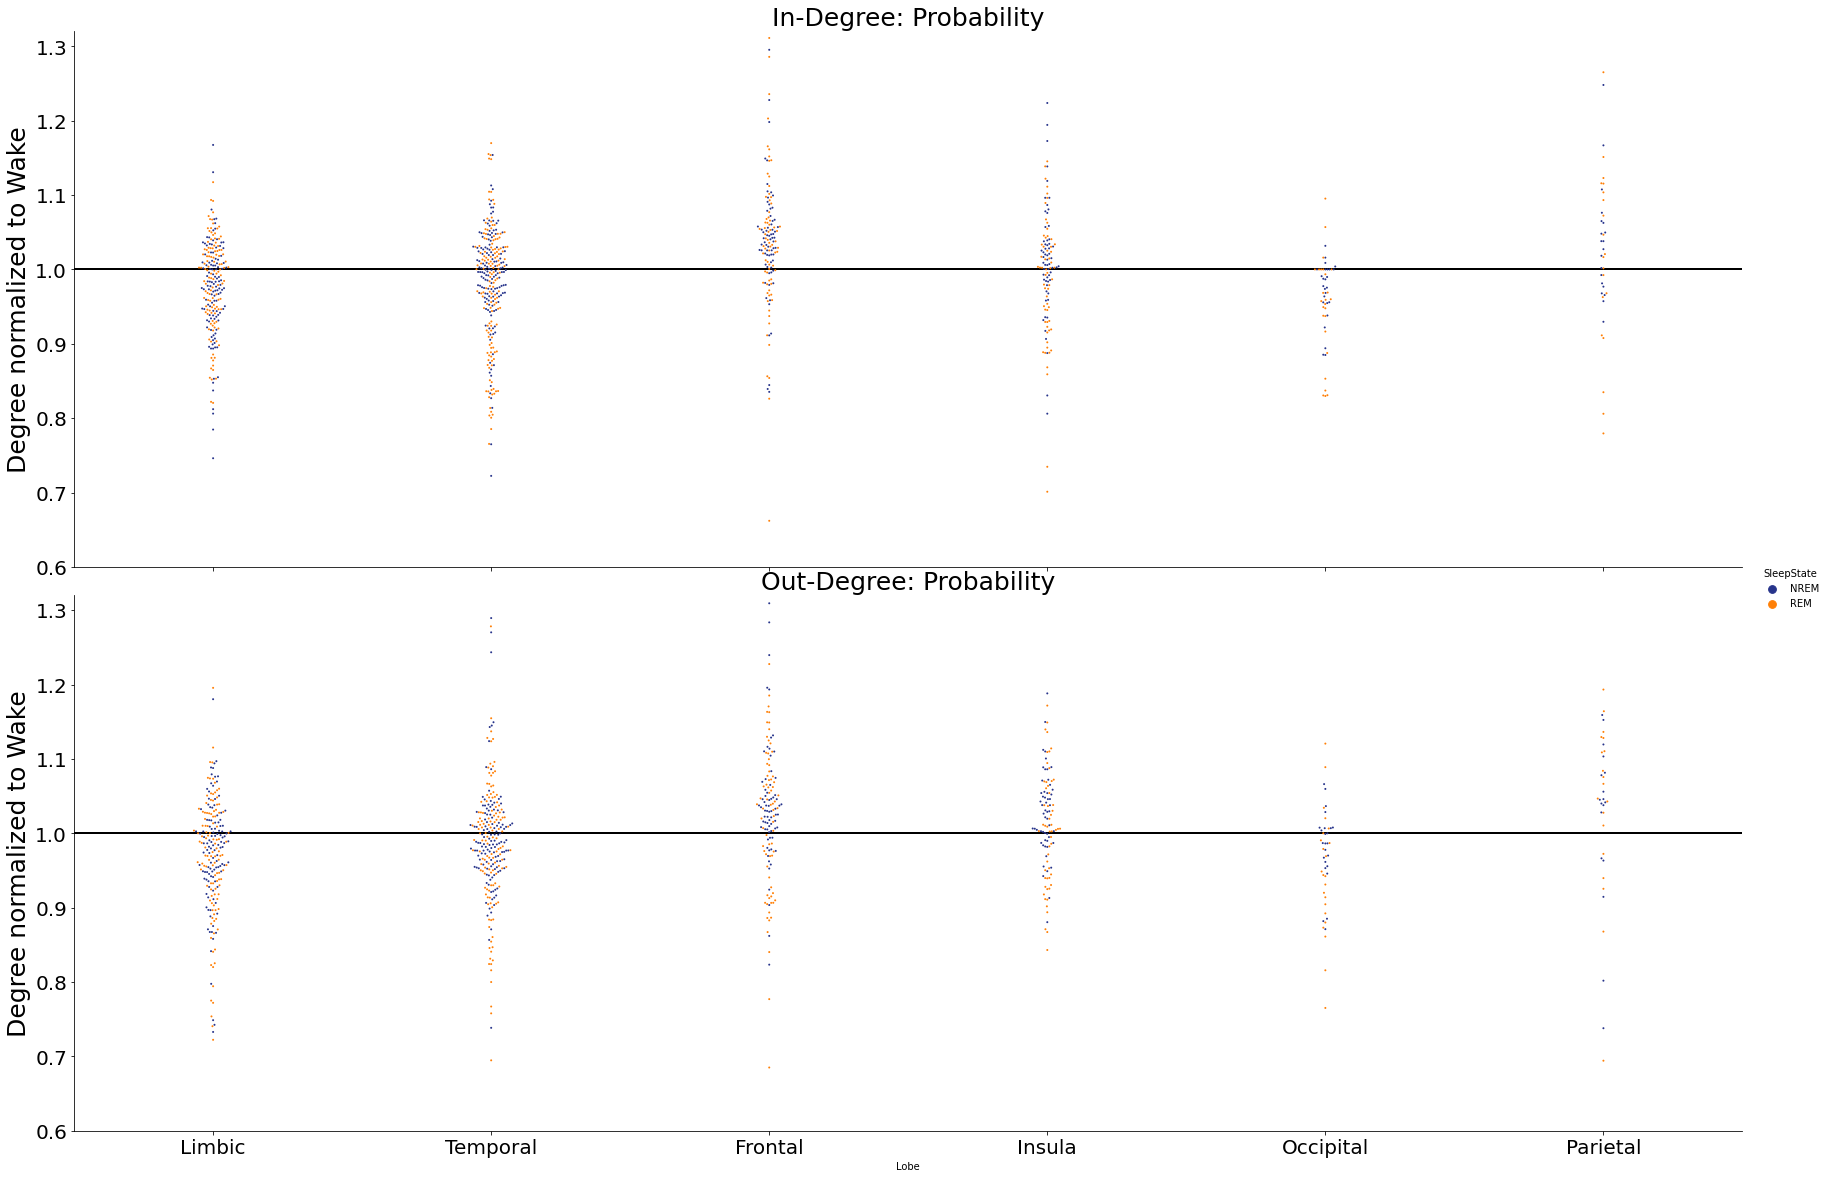

In [475]:
g = sns.catplot(x ='Lobe', y='Sig_n', hue='SleepState', data= G_deg[(G_deg.Lobe != 'Central')&(G_deg.Lobe != 'Unknown')&(G_deg.Lobe != 'out')&(G_deg.SleepState != 'Wake')], row = 'Deg', kind='swarm',height=8,aspect= 3, s=2, palette=['#27348B','#FF8007'])
ax = g.axes  # access a grid of 'axes' objects
plt.ylim([0.6,1.32])
ax[0,0].axhline(1, color='k', linewidth=2)
ax[1,0].axhline(1, color='k', linewidth=2)
plt.xticks(fontsize=20)
ax[1,0].tick_params(labelsize=20)
ax[0,0].tick_params(labelsize=20)
ax[0,0].set_title('In-Degree: Probability', fontsize=25)
ax[1,0].set_title('Out-Degree: Probability', fontsize=25)
ax[0,0].set_ylabel('Degree normalized to Wake', fontsize=25)
ax[1,0].set_ylabel('Degree normalized to Wake', fontsize=25)
plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_P_nn.svg')
plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_P_nn.jpg')

In [ ]:
g = sns.catplot(x ='Lobe', y='LLs_n', hue='SleepState', data= G_deg[(G_deg.Lobe != 'Central')&(G_deg.Lobe != 'Unknown')&(G_deg.Lobe != 'out')&(G_deg.SleepState != 'Wake')], row = 'Deg', kind='swarm',height=8,aspect= 3, s=10, palette=['#27348B','#FF8007'])
ax = g.axes  # access a grid of 'axes' objects
#plt.ylim([0.2,2])
ax[0,0].axhline(1, color='k', linewidth=2)
ax[1,0].axhline(1, color='k', linewidth=2)
plt.xticks(fontsize=20)
ax[1,0].tick_params(labelsize=20)
ax[0,0].tick_params(labelsize=20)
ax[0,0].set_title('In-Degree: LL', fontsize=25)
ax[1,0].set_title('Out-Degree: LL', fontsize=25)
ax[0,0].set_ylabel('Degree normalized to Wake', fontsize=25)
ax[1,0].set_ylabel('Degree normalized to Wake', fontsize=25)
plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_LLs_nn.svg')
plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_LLs_nn.jpg')

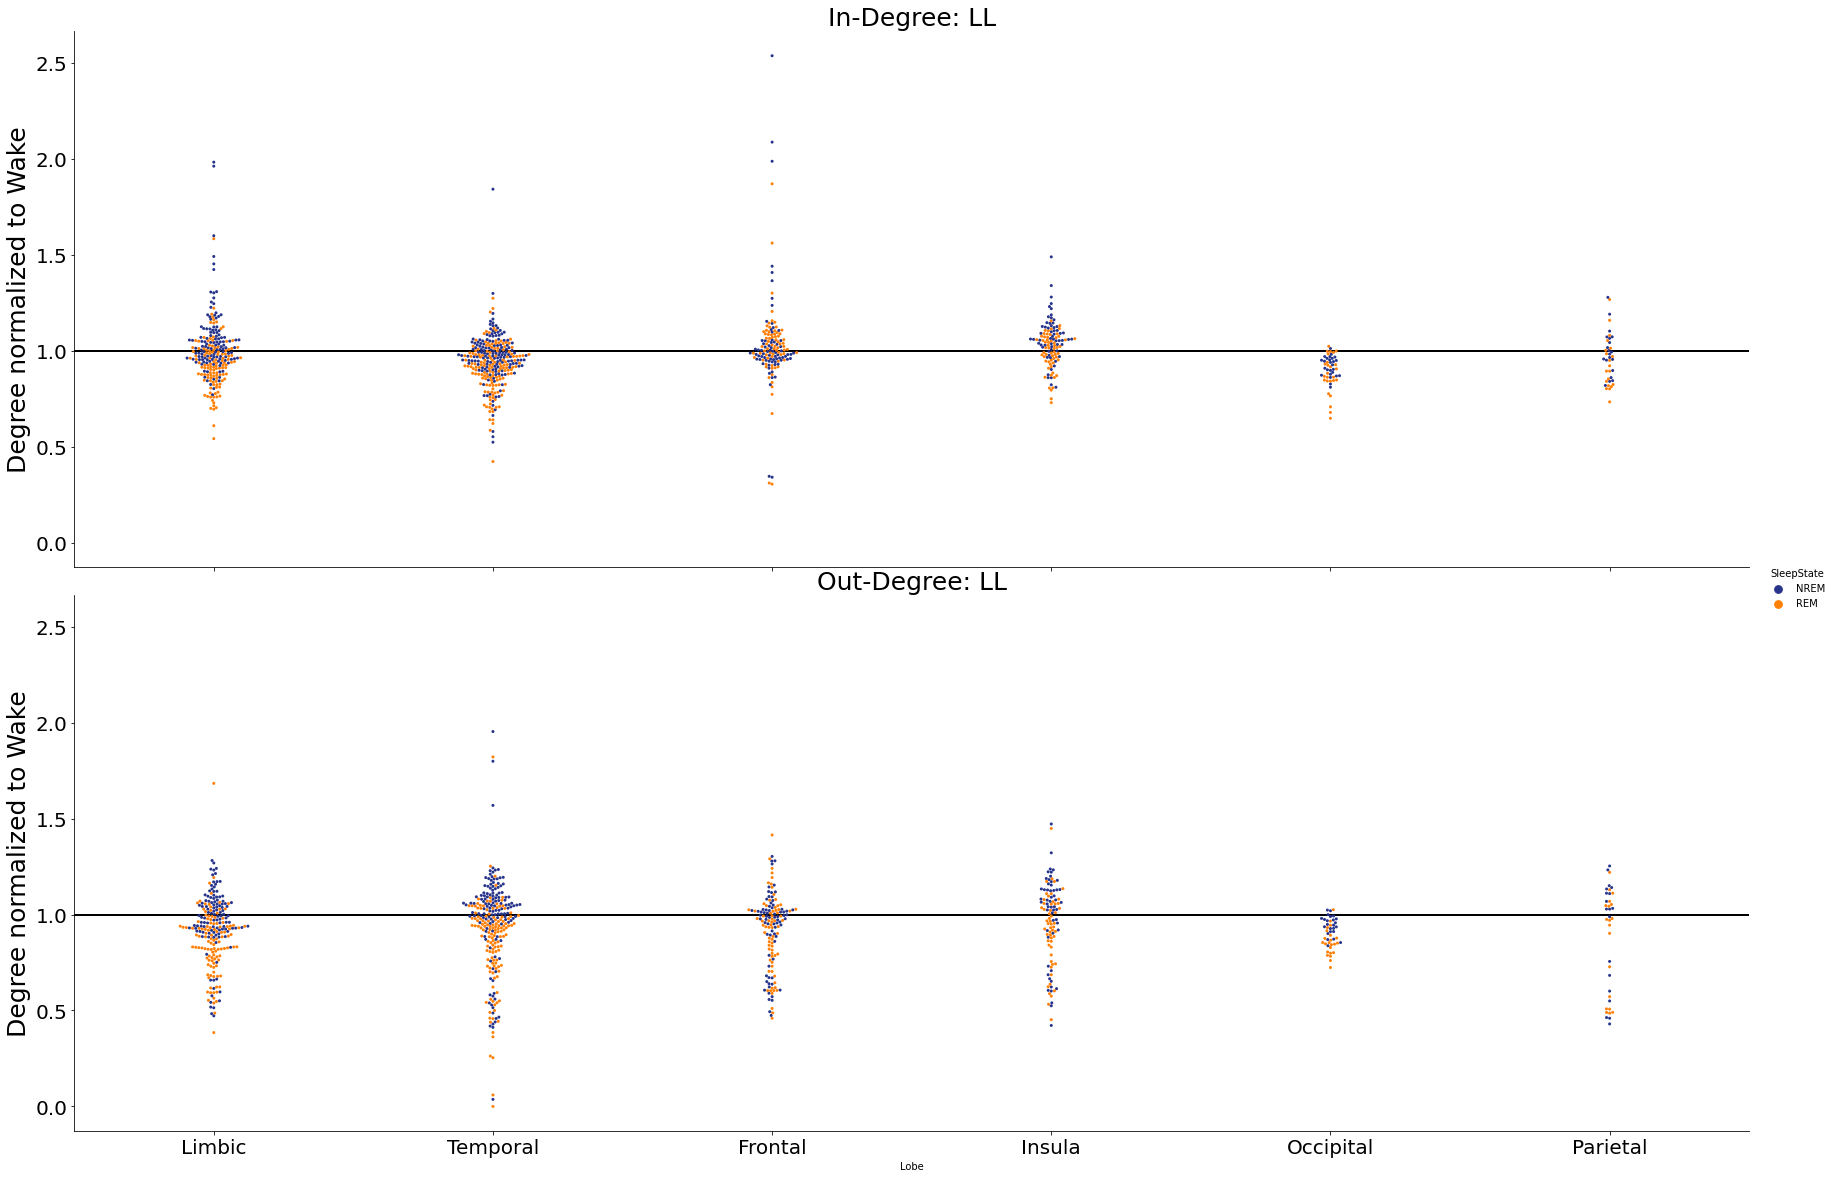

In [476]:
g = sns.catplot(x ='Lobe', y='LLs_n', hue='SleepState', data= G_deg[(G_deg.Lobe != 'Central')&(G_deg.Lobe != 'Unknown')&(G_deg.Lobe != 'out')&(G_deg.SleepState != 'Wake')], row = 'Deg', kind='swarm',height=8,aspect= 3, s=3, palette=['#27348B','#FF8007'])
ax = g.axes  # access a grid of 'axes' objects
#plt.ylim([0.2,2])
ax[0,0].axhline(1, color='k', linewidth=2)
ax[1,0].axhline(1, color='k', linewidth=2)
plt.xticks(fontsize=20)
ax[1,0].tick_params(labelsize=20)
ax[0,0].tick_params(labelsize=20)
ax[0,0].set_title('In-Degree: LL', fontsize=25)
ax[1,0].set_title('Out-Degree: LL', fontsize=25)
ax[0,0].set_ylabel('Degree normalized to Wake', fontsize=25)
ax[1,0].set_ylabel('Degree normalized to Wake', fontsize=25)
plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_LLs_nn.svg')
plt.savefig(sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_LLs_nn.jpg')

In [ ]:
G = data_con_subj.groupby(['Subj','Stim','Chan','ChanR','StimR','SleepState'], as_index=False)[['Sig','LLs', 'd']].mean()
metrics = ['Sig','LLs']
# degrees: sum up all CCEP magnitudes with specific channel being reponse or stimulation channel
G_in = G.groupby(['Subj','Chan','ChanR','SleepState'], as_index=False)[metrics].sum()
G_in.insert(3,'Deg', 'in')
G_out = G.groupby(['Subj','Stim','StimR','SleepState'], as_index=False)[metrics].sum()
G_out.insert(3,'Deg', 'out')
G_out.insert(0,'Chan', G_out.Stim)
G_out.insert(0,'ChanR', G_out.StimR)
G_deg = pd.concat([G_in,G_out])
G_deg = G_deg.reset_index(drop=True)
G_deg = G_deg.drop(columns=['Stim'])
G_deg = G_deg.drop(columns=['StimR'])
for m in metrics:
    means_stds = G_deg.groupby(['Subj','Chan','Deg','SleepState'])[m].agg(['mean','std']).reset_index()
    means_stds = means_stds[means_stds.SleepState=='Wake']
    means_stds = means_stds.drop(columns=['SleepState'])
    G_deg = G_deg.merge(means_stds,on=['Subj','Chan','Deg'])
    G_deg[m+'_n'] = (G_deg[m] / G_deg['mean']) 
    G_deg = G_deg.drop(columns=['mean', 'std'])
    
G_deg.insert(1, 'Lobe', G_deg.ChanR)
for region in np.unique(G_deg[['ChanR']]):
    if len(regions.Lobe[regions.label==region].values)>0:
        lobe = regions.Lobe[regions.label==region].values[0]
    else:
        lobe = 'out'
    G_deg.loc[G_deg.ChanR==region, 'Lobe'] = lobe

deg_summary = G_deg[(G_deg.Lobe != 'Unknown')&(G_deg.Lobe != 'out')&(G_deg.SleepState != 'Wake')]
deg_summary = deg_summary.reset_index(drop=True)
deg_summary = deg_summary.groupby(['Lobe', 'Deg','SleepState'], as_index=False)['LLs_n'].mean()

deg_summary.insert(3,'thr_H', np.percentile(deg_surr.values[:,3:],99,1))
deg_summary.insert(3,'thr_L', np.percentile(deg_surr.values[:,3:],1,1))
deg_summary.insert(3,'Sig', (deg_summary.LLs_n<deg_summary.thr_L)|(deg_summary.LLs_n>deg_summary.thr_H))

c:\users\i0328442\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\i0328442\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\i0328442\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\i0328442\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings

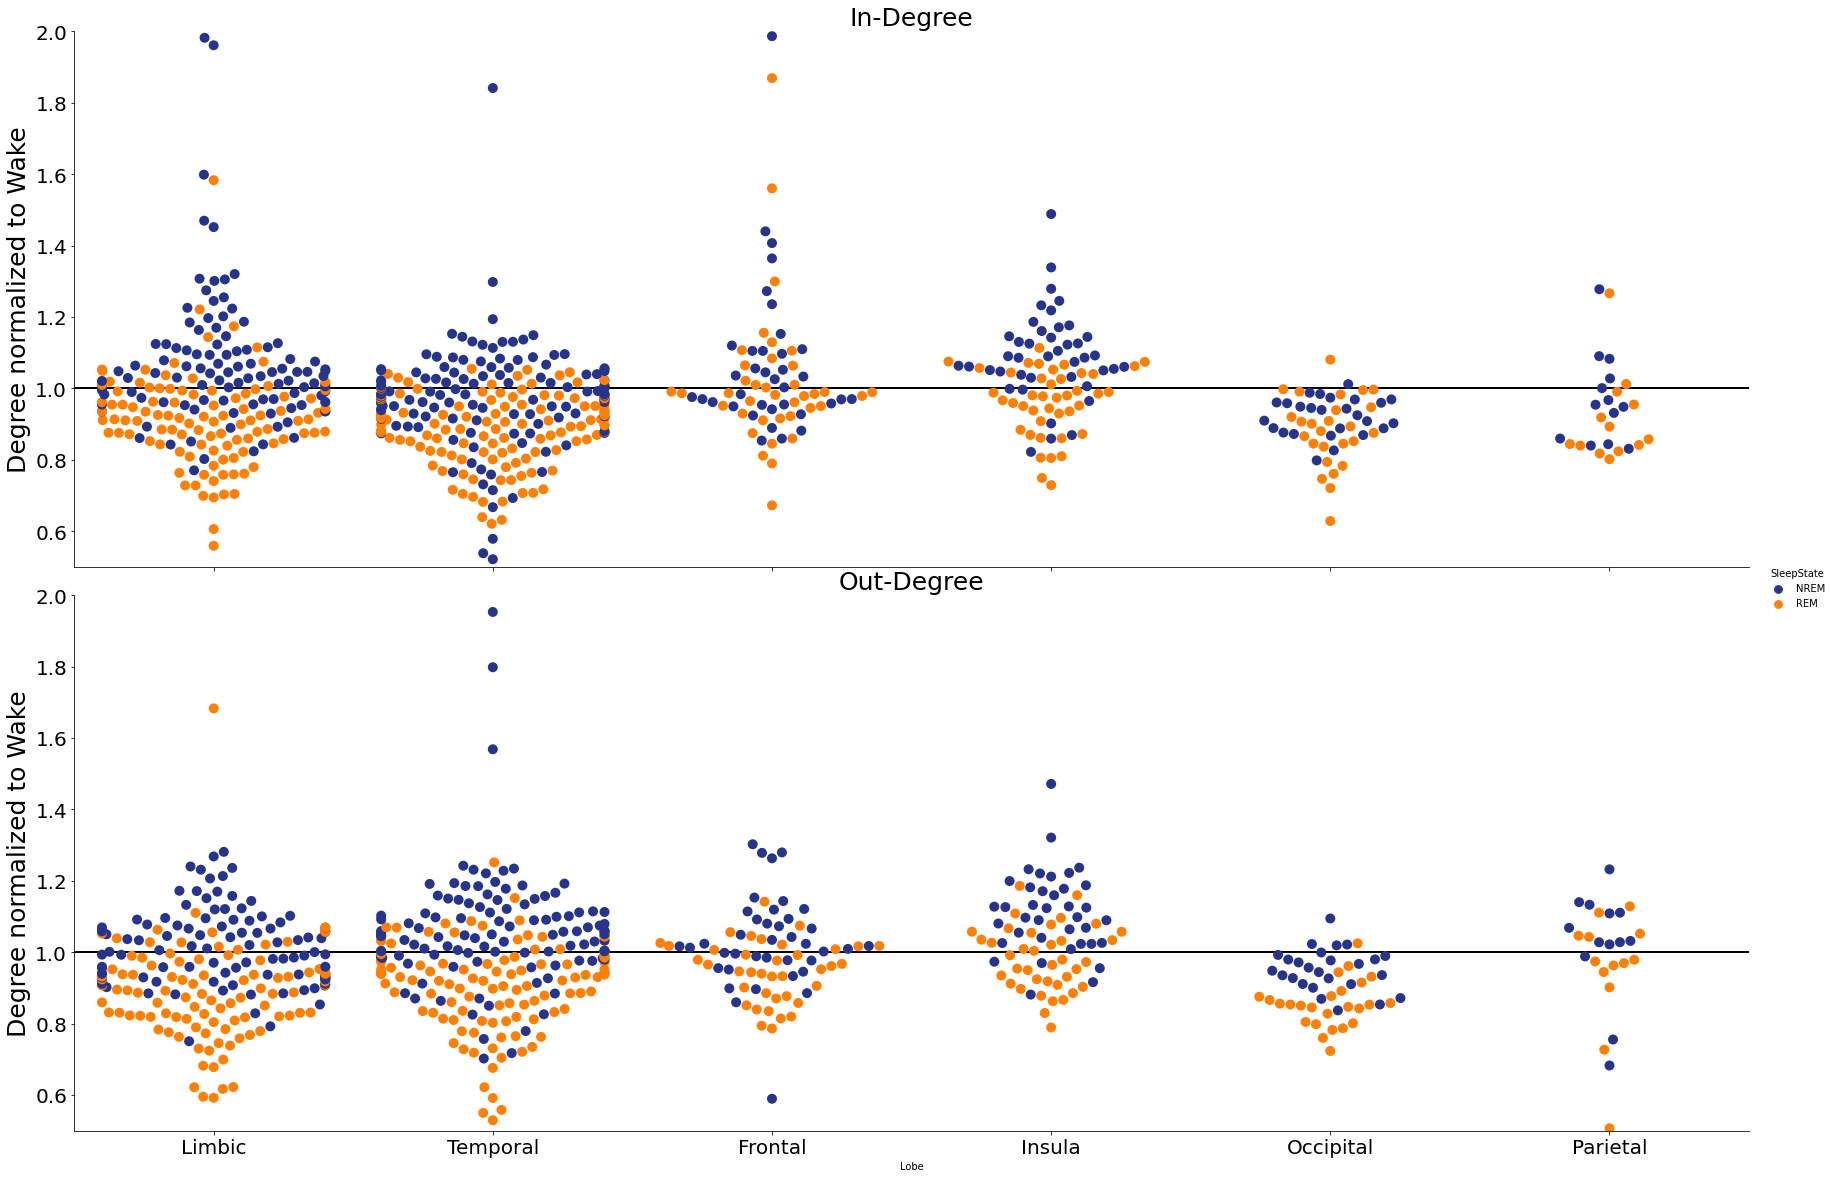

In [84]:
g = sns.catplot(x ='Lobe', y='LLs_n', hue='SleepState', data= G_deg[(G_deg.Lobe != 'Central')&(G_deg.Lobe != 'Unknown')&(G_deg.Lobe != 'out')&(G_deg.SleepState != 'Wake')], row = 'Deg', kind='swarm',height=8,aspect= 3, s=10, palette=['#27348B','#FF8007'])
ax = g.axes  # access a grid of 'axes' objects
plt.ylim([0.5,2])
ax[0,0].axhline(1, color='k', linewidth=2)
ax[1,0].axhline(1, color='k', linewidth=2)
plt.xticks(fontsize=20)
ax[1,0].tick_params(labelsize=20)
ax[0,0].tick_params(labelsize=20)
ax[0,0].set_title('In-Degree', fontsize=25)
ax[1,0].set_title('Out-Degree', fontsize=25)
ax[0,0].set_ylabel('Degree normalized to Wake', fontsize=25)
ax[1,0].set_ylabel('Degree normalized to Wake', fontsize=25)
plt.savefig('Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_Lobe2.svg')

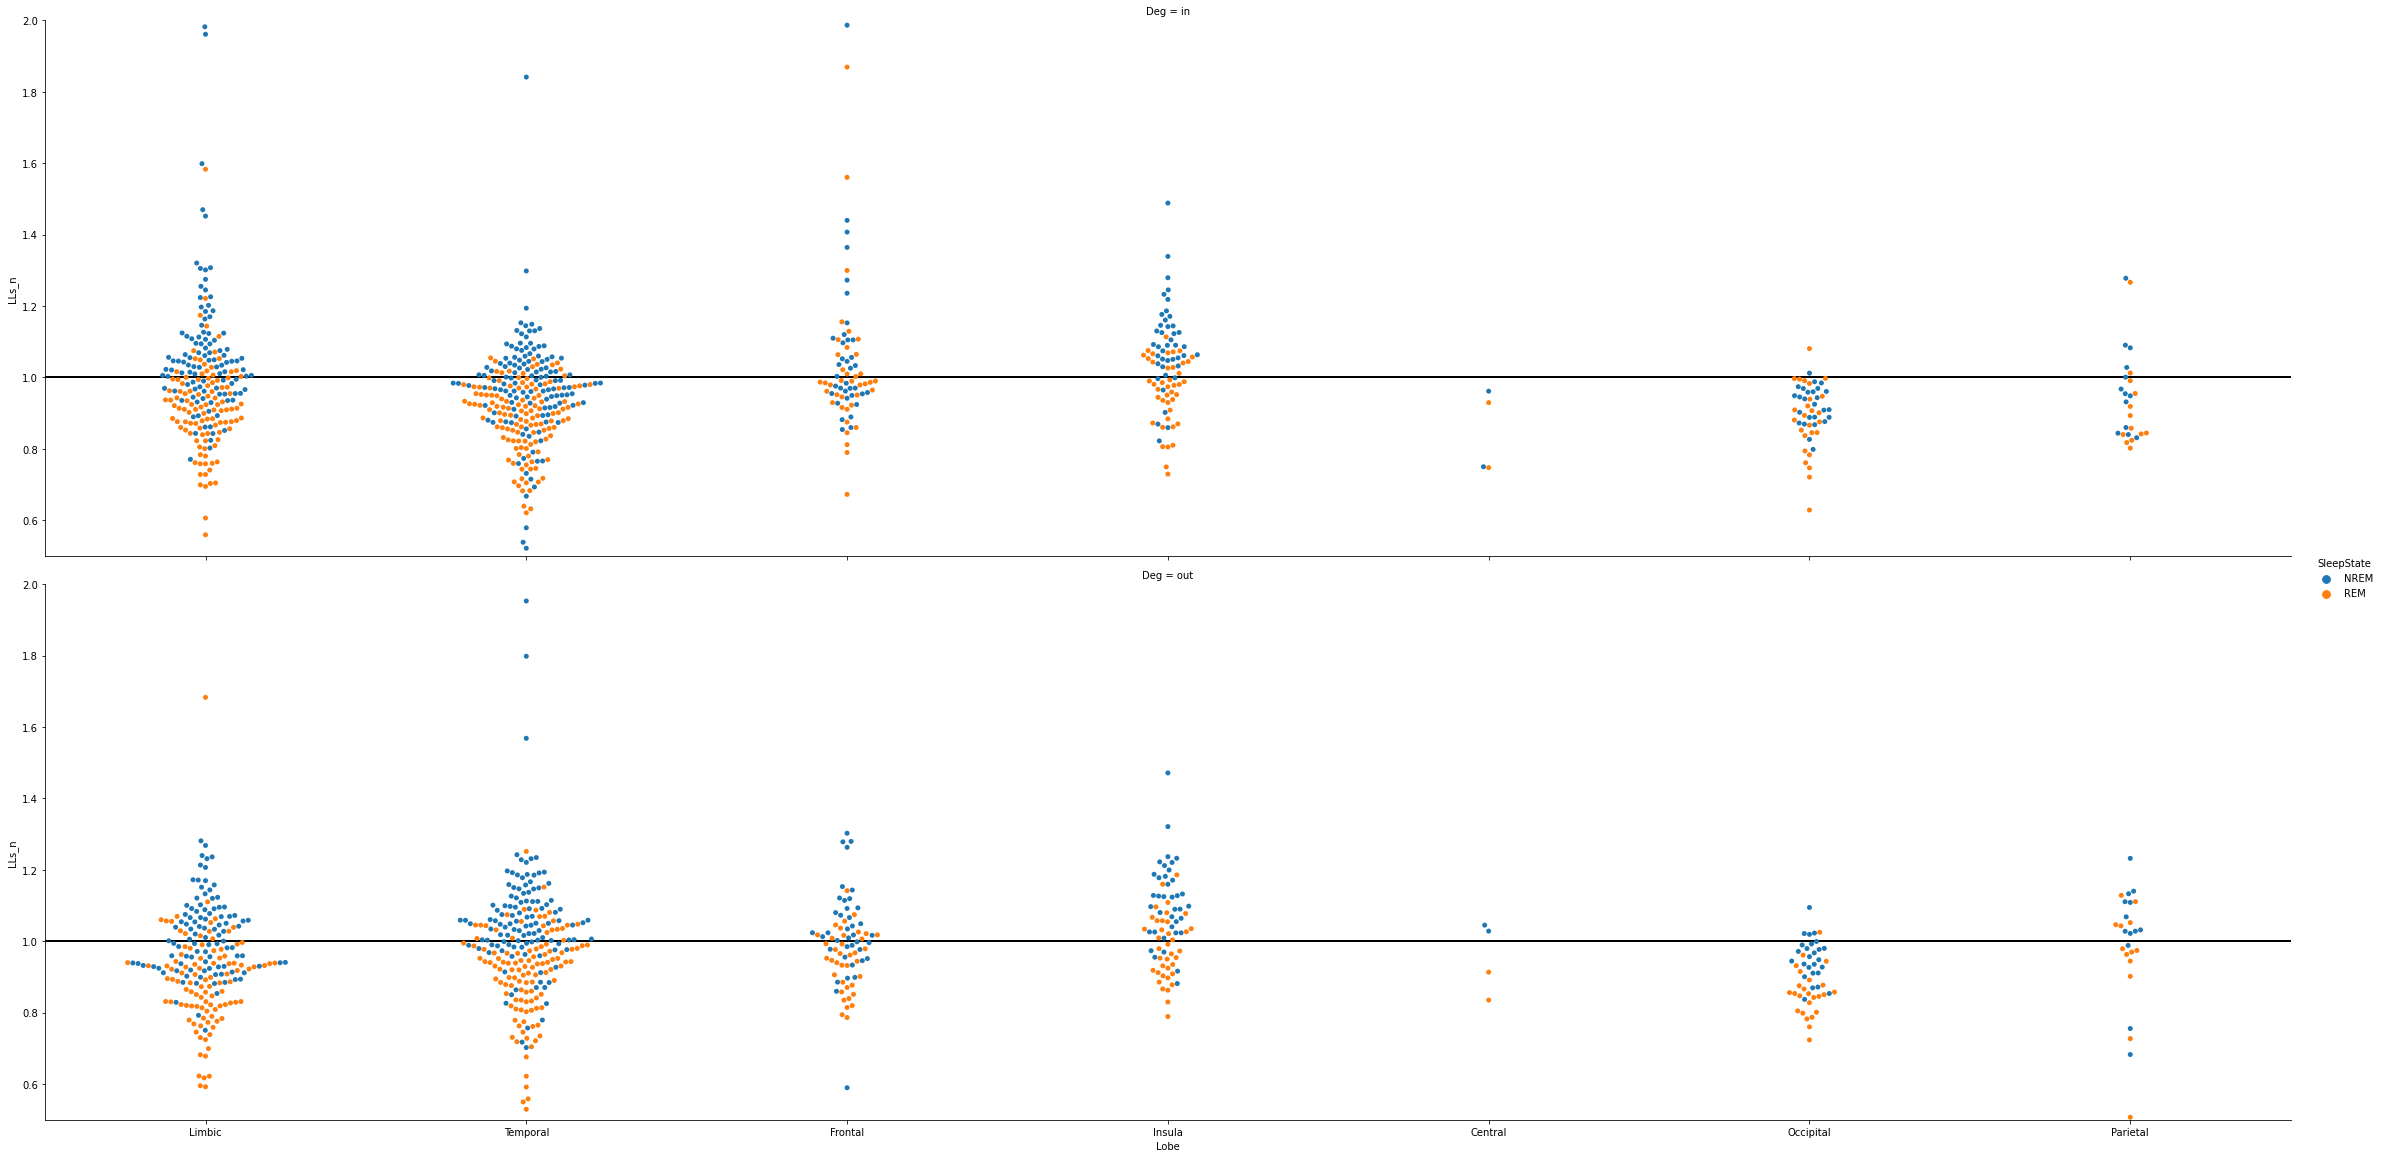

In [18]:
g = sns.catplot(x ='Lobe', y='LLs_n', hue='SleepState', data= G_deg[(G_deg.Lobe != 'Unknown')&(G_deg.Lobe != 'out')&(G_deg.SleepState != 'Wake')], row = 'Deg', kind='swarm',s=5,height=8,aspect= 4)
ax = g.axes  # access a grid of 'axes' objects
plt.ylim([0.5,2])
ax[0,0].axhline(1, color='k', linewidth=2)
ax[1,0].axhline(1, color='k', linewidth=2)
plt.savefig('Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\Deg_Lobe.svg')

In [48]:
data_con_file = 'Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\degree\\data_con.csv'
if os.path.exists(data_con_file)*0:
    data_deg = pd.read_csv(data_con_file)
else:
    for i in range(len(subjs)):
        print('loading -- ' + subjs[i], end='\r')
        subj = subjs[i]
        path_gen = os.path.join('y:\\eLab\Patients\\' + subj)
        if not os.path.exists(path_gen):
            path_gen = 'T:\\EL_experiment\\Patients\\' + subj
        path_patient = path_gen + '\Data\EL_experiment'
        path_infos = os.path.join(path_patient, 'infos')
        if not os.path.exists(path_infos):
            path_infos = path_gen + '\\infos'
        path_patient_analysis = 'y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\\' + subj

        file_con = path_patient_analysis + '\\' + folder + '/' + cond_folder + '/data/con_trial_all.csv'
        con_trial = pd.read_csv(file_con)

        lbls = pd.read_excel(os.path.join(path_infos, subj + "_labels.xlsx"), header=0, sheet_name='BP')
        labels_all = lbls.label.values
        labels_clinic = lbls.Clinic.values
        labels_region = lbls.Region.values
        labels_region[labels_region == 'HIPP'] = 'Mesiotemporal'
        labels_region[labels_region == 'HIPP '] = 'Mesiotemporal'
        labels_region[labels_region == 'ENT'] = 'Basotemporal'
        bad_region = np.where((labels_region == 'WM') | (labels_region == 'OUT') | (labels_region == 'Putamen'))[0]

        # data_A = data_A[~np.isin(data_A.Chan,bad_all)&~np.isin(data_A.Stim,bad_all)]
        
        con_trial = con_trial[con_trial.Sig>=0]
        con_trial.loc[con_trial.SleepState=='W','SleepState'] = 'Wake'
        con_trial.insert(3,'LLs', con_trial.LL*con_trial.Sig)
        con_trial.insert(3,'LLz', con_trial.LL*con_trial.Sig)
        con_trial['LLz'] = con_trial.groupby(['Stim','Chan'])['LLs'].transform(lambda x: (x / x.max()))
        # mean CCEP magnitude for each conenction at each sleep state
        G = con_trial.groupby(['Stim','Chan','SleepState'], as_index=False)[['Sig','LLz','LLs', 'd']].mean()
        metrics = ['Sig','LLz','LLs']
        # degrees: sum up all CCEP magnitudes with specific channel being reponse or stimulation channel
        G_in = G.groupby(['Chan','SleepState'], as_index=False)[metrics].sum()
        G_in.insert(3,'Deg', 'in')
        G_out = G.groupby(['Stim','SleepState'], as_index=False)[metrics].sum()
        G_out.insert(3,'Deg', 'out')
        G_out.insert(0,'Chan', G_out.Stim)
        G_deg = pd.concat([G_in,G_out])
        G_deg = G_deg.reset_index(drop=True)
        G_deg = G_deg.drop(columns=['Stim'])
        
        for m in metrics:
            means_stds = G_deg.groupby(['Chan','Deg','SleepState'])[m].agg(['mean','std']).reset_index()
            means_stds = means_stds[means_stds.SleepState=='Wake']
            means_stds = means_stds.drop(columns=['SleepState'])
            G_deg = G_deg.merge(means_stds,on=['Chan','Deg'])
            G_deg[m+'_n'] = (G_deg[m] / G_deg['mean']) 
            G_deg = G_deg.drop(columns=['mean', 'std'])
        
        G_deg.insert(0,'Area','Test')
        for c in np.unique(G_deg.Chan.values.astype('int')):
            G_deg.loc[G_deg.Chan==c,'Area']= labels_region[c]
        G_deg.insert(0,'Subj', subj)
        if i == 0:
            data_deg = G_deg
        else:
            data_deg = pd.concat([data_deg, G_deg])
            data_deg = data_deg.reset_index(drop=True)
        
    data_deg.to_csv(data_con_file,
        header=True, index=False)

In [134]:
deg_summary.insert(3,'thr_high',thr[:,1])
deg_summary.insert(3,'thr_low',thr[:,0])

In [118]:
deg_summary = data_deg[(data_deg.Lobe != 'Unknown')&(data_deg.Lobe != 'out')&(data_deg.SleepState != 'Wake')]
deg_summary = deg_summary.reset_index(drop=True)
deg_summary = deg_summary.groupby(['Lobe', 'SleepState'], as_index=False)['LLs_n'].mean()
deg_summary.insert(deg_summary.shape[1], str(n+1), deg_summary.LLs_n)
deg_summary = deg_summary.drop(columns='LLs_n')

In [105]:
deg_summary.insert(deg_summary.shape[1], str(n+1), deg_summary.LLs_n)

In [107]:
deg_summary = deg_summary.drop(columns='LLs_n')

In [98]:
deg_summary = data_deg[(data_deg.Lobe != 'Unknown')&(data_deg.Lobe != 'out')&(data_deg.SleepState != 'Wake')]
deg_summary = deg_summary.reset_index(drop=True)
deg_summary = deg_summary.groupby(['Lobe', 'SleepState'], as_index=False)['LLs_n'].mean()

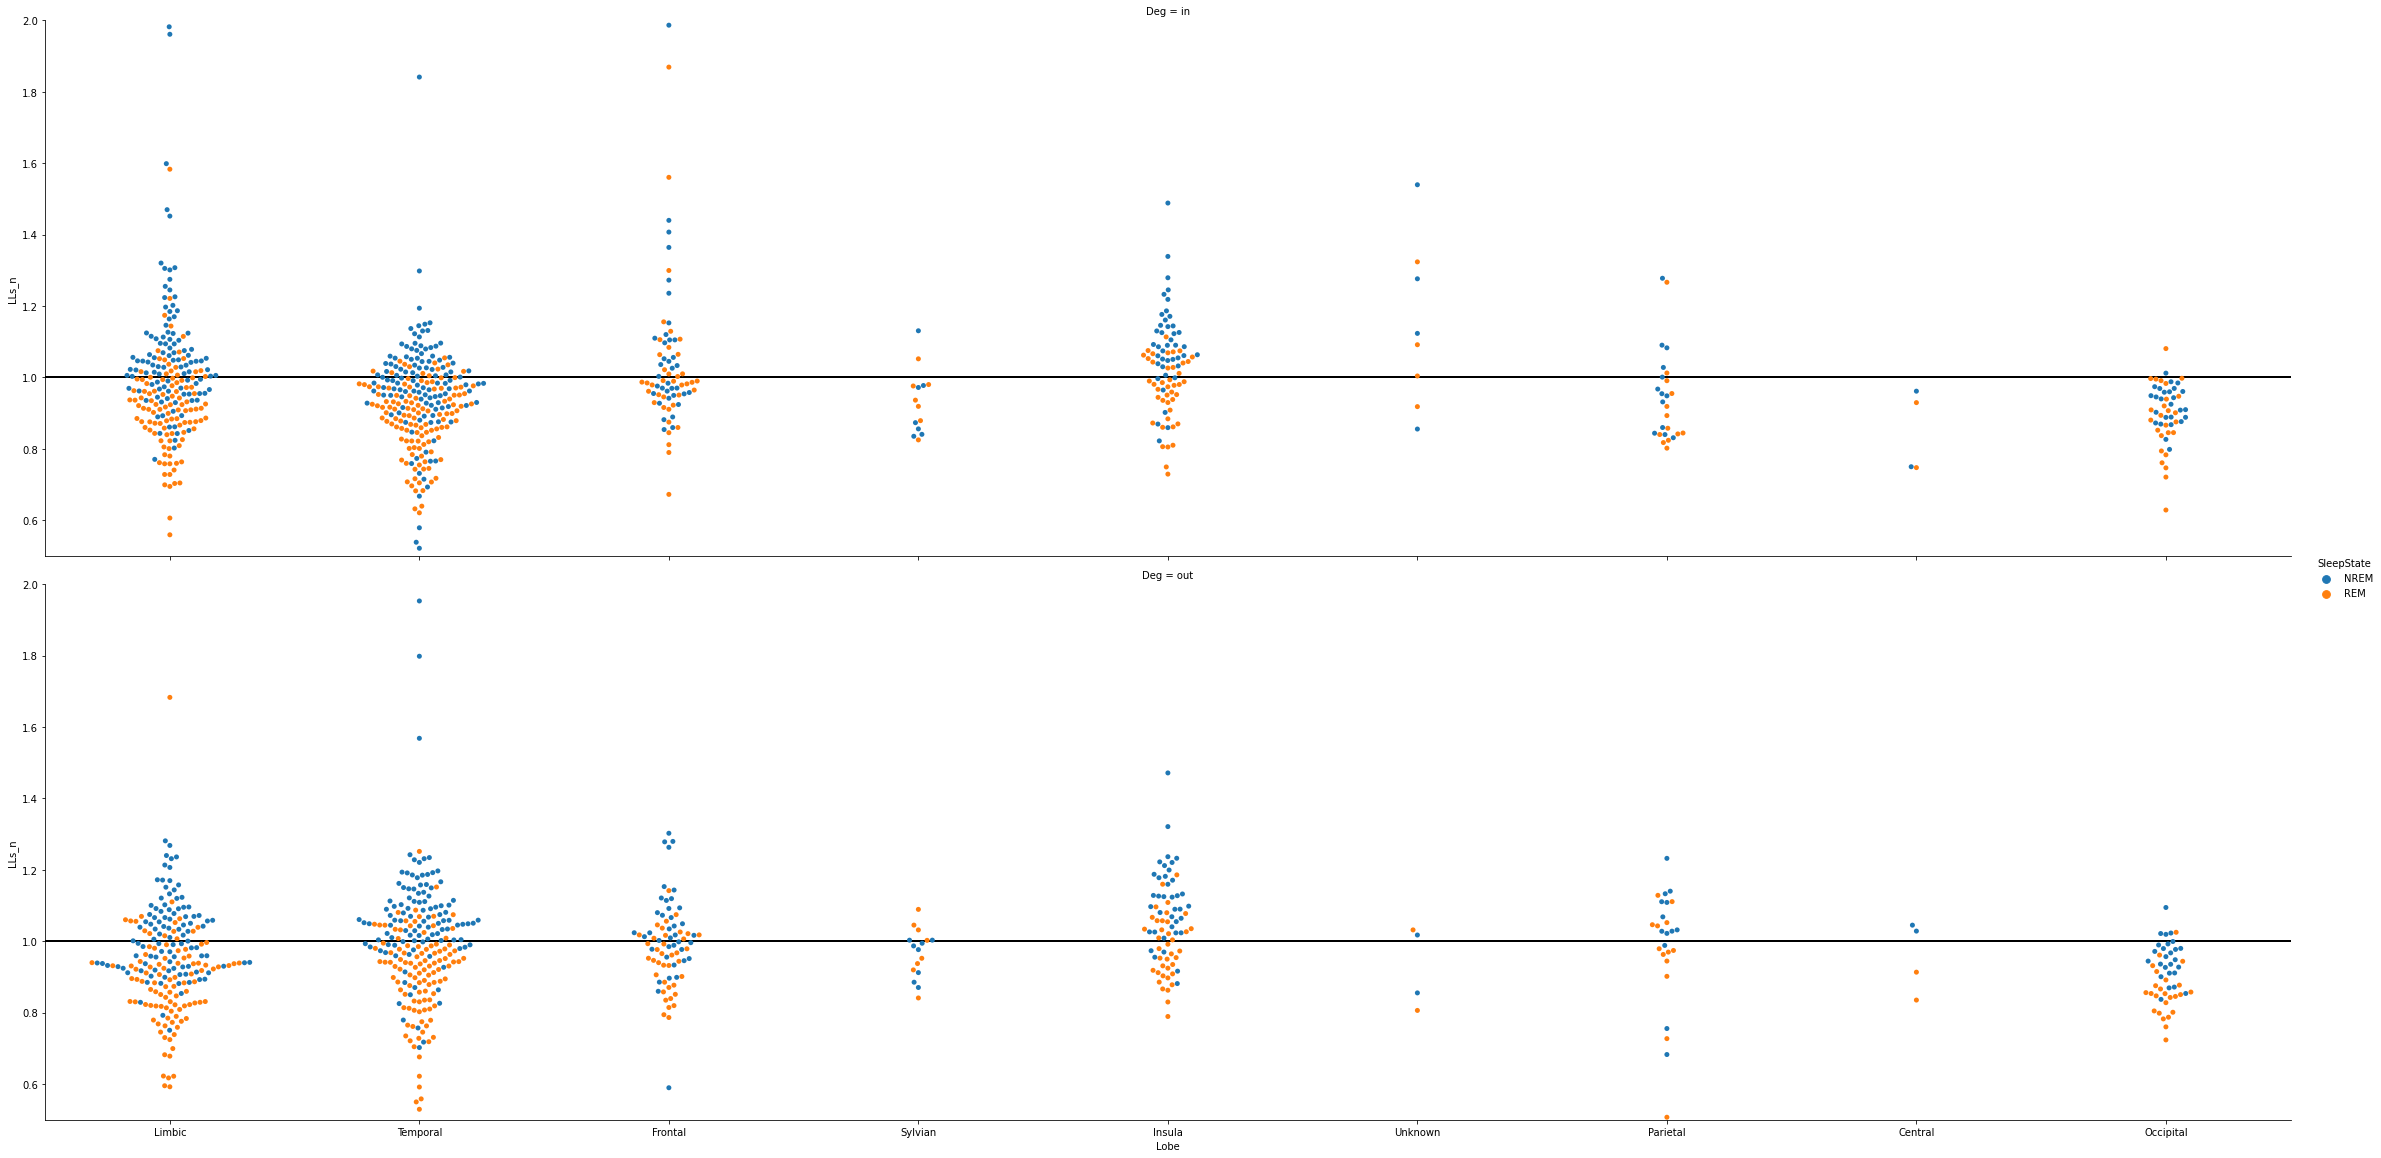

In [89]:
g = sns.catplot(x ='Lobe', y='LLs_n', hue='SleepState', data= data_deg[(data_deg.Lobe != 'out')&(data_deg.SleepState != 'Wake')], row = 'Deg', kind='swarm',s=5,height=8,aspect= 4)
ax = g.axes  # access a grid of 'axes' objects
plt.ylim([0.5,2])
ax[0,0].axhline(1, color='k', linewidth=2)
ax[1,0].axhline(1, color='k', linewidth=2)

In [86]:
# data_deg.insert(1, 'Lobe', data_con.StimR)
for region in np.unique(data_deg[['Area']]):
    if len(regions.Lobe[regions.label==region].values)>0:
        lobe = regions.Lobe[regions.label==region].values[0]
    else:
        lobe = 'out'
    data_deg.loc[data_deg.Area==region, 'Lobe'] = lobe

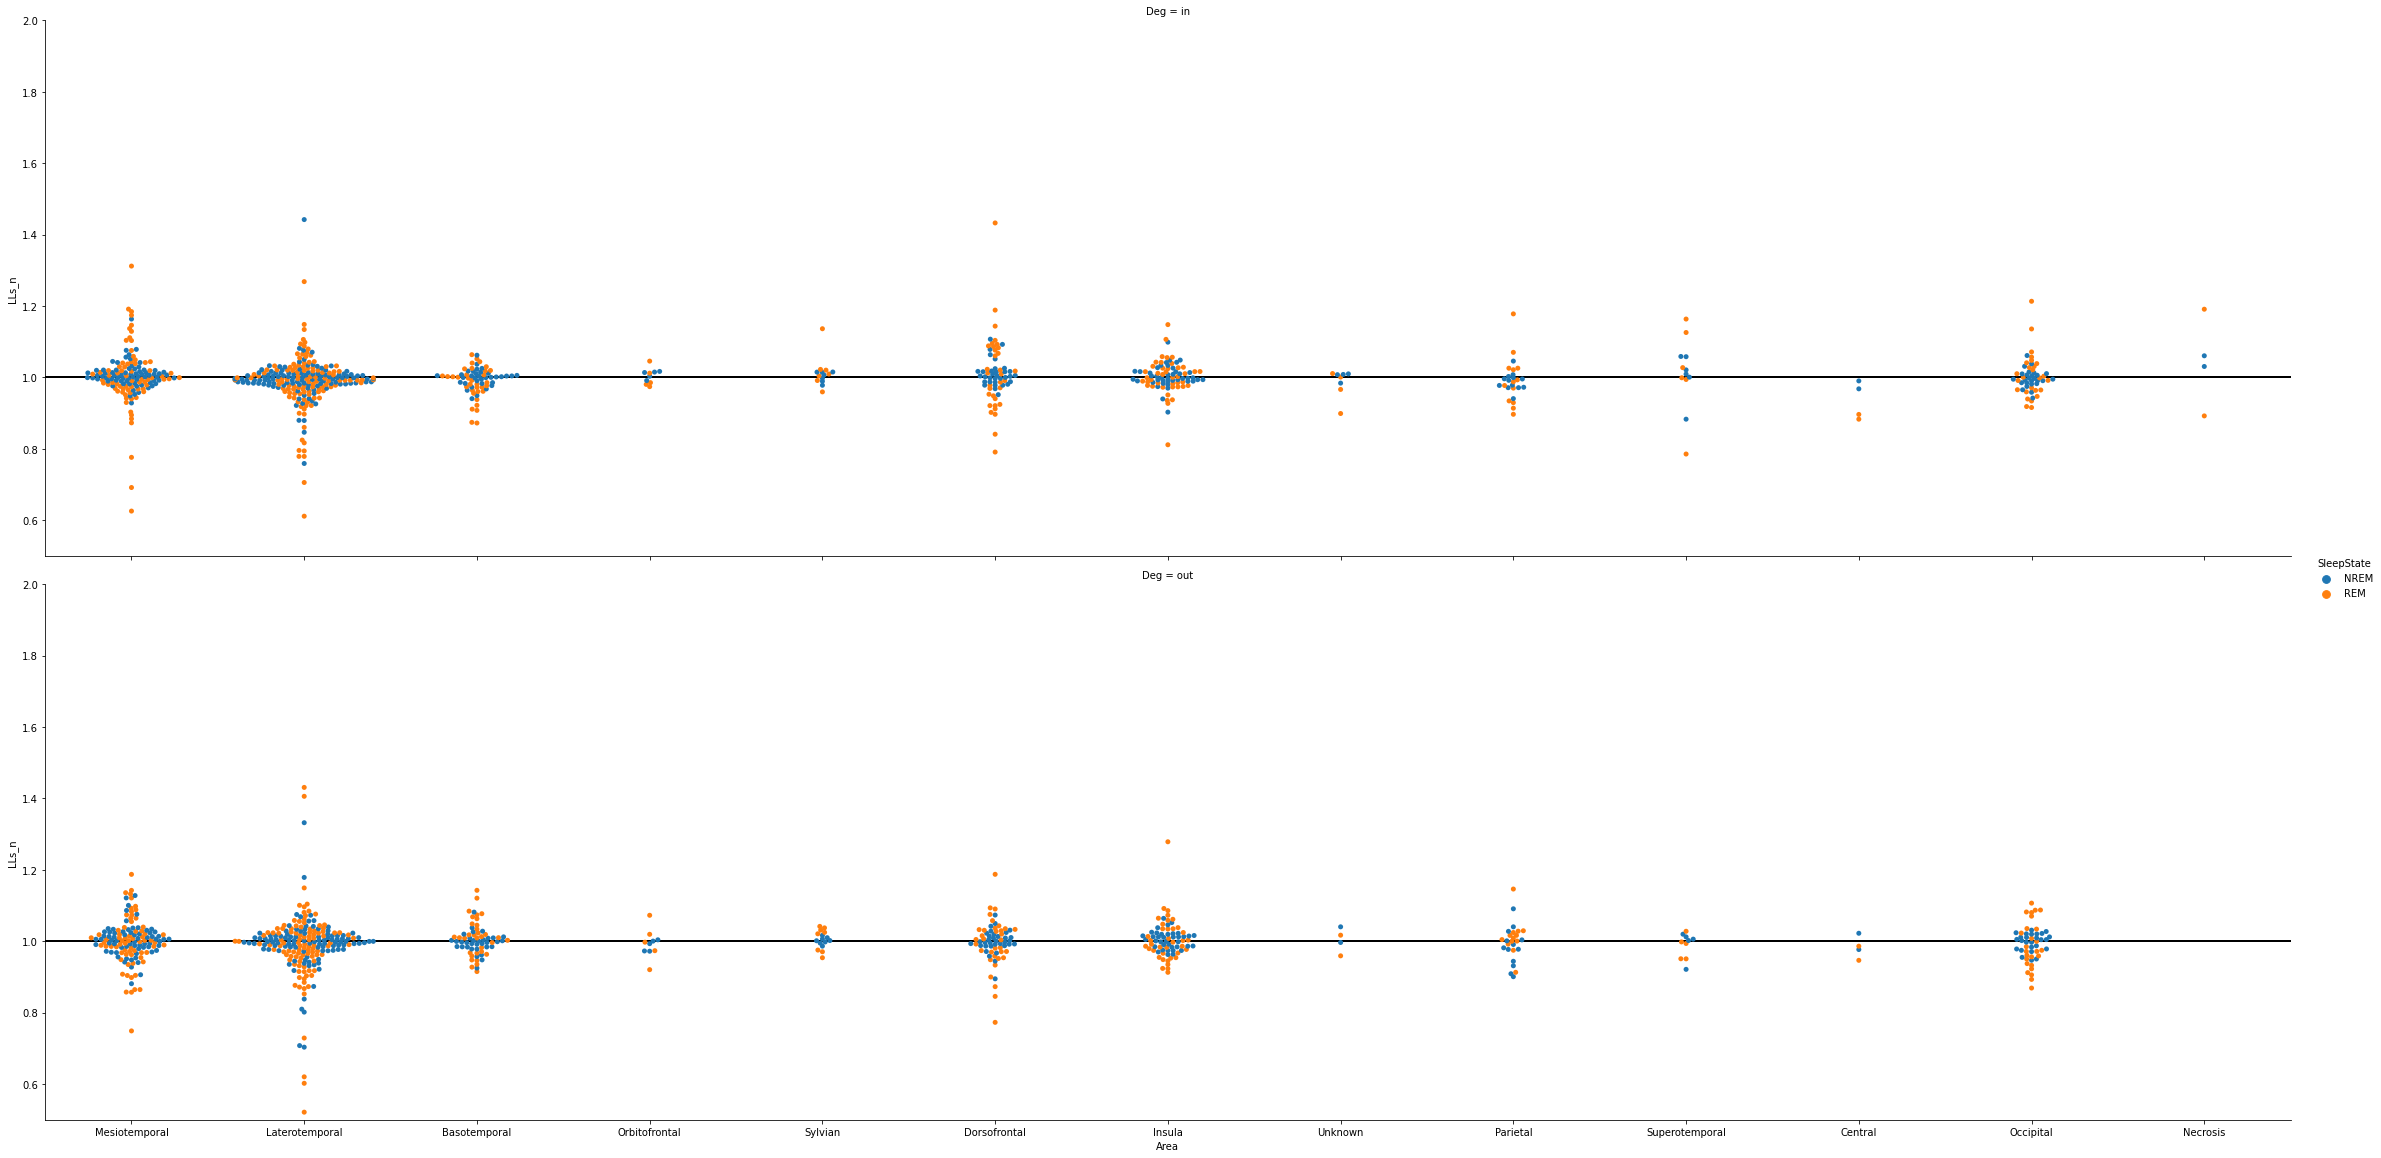

In [77]:
g = sns.catplot(x ='Area', y='LLs_n', hue='SleepState', data= data_deg_surr[data_deg_surr.SleepState != 'Wake'], row = 'Deg', kind='swarm',s=5,height=8,aspect= 4)
ax = g.axes  # access a grid of 'axes' objects
plt.ylim([0.5,2])
ax[0,0].axhline(1, color='k', linewidth=2)
ax[1,0].axhline(1, color='k', linewidth=2)

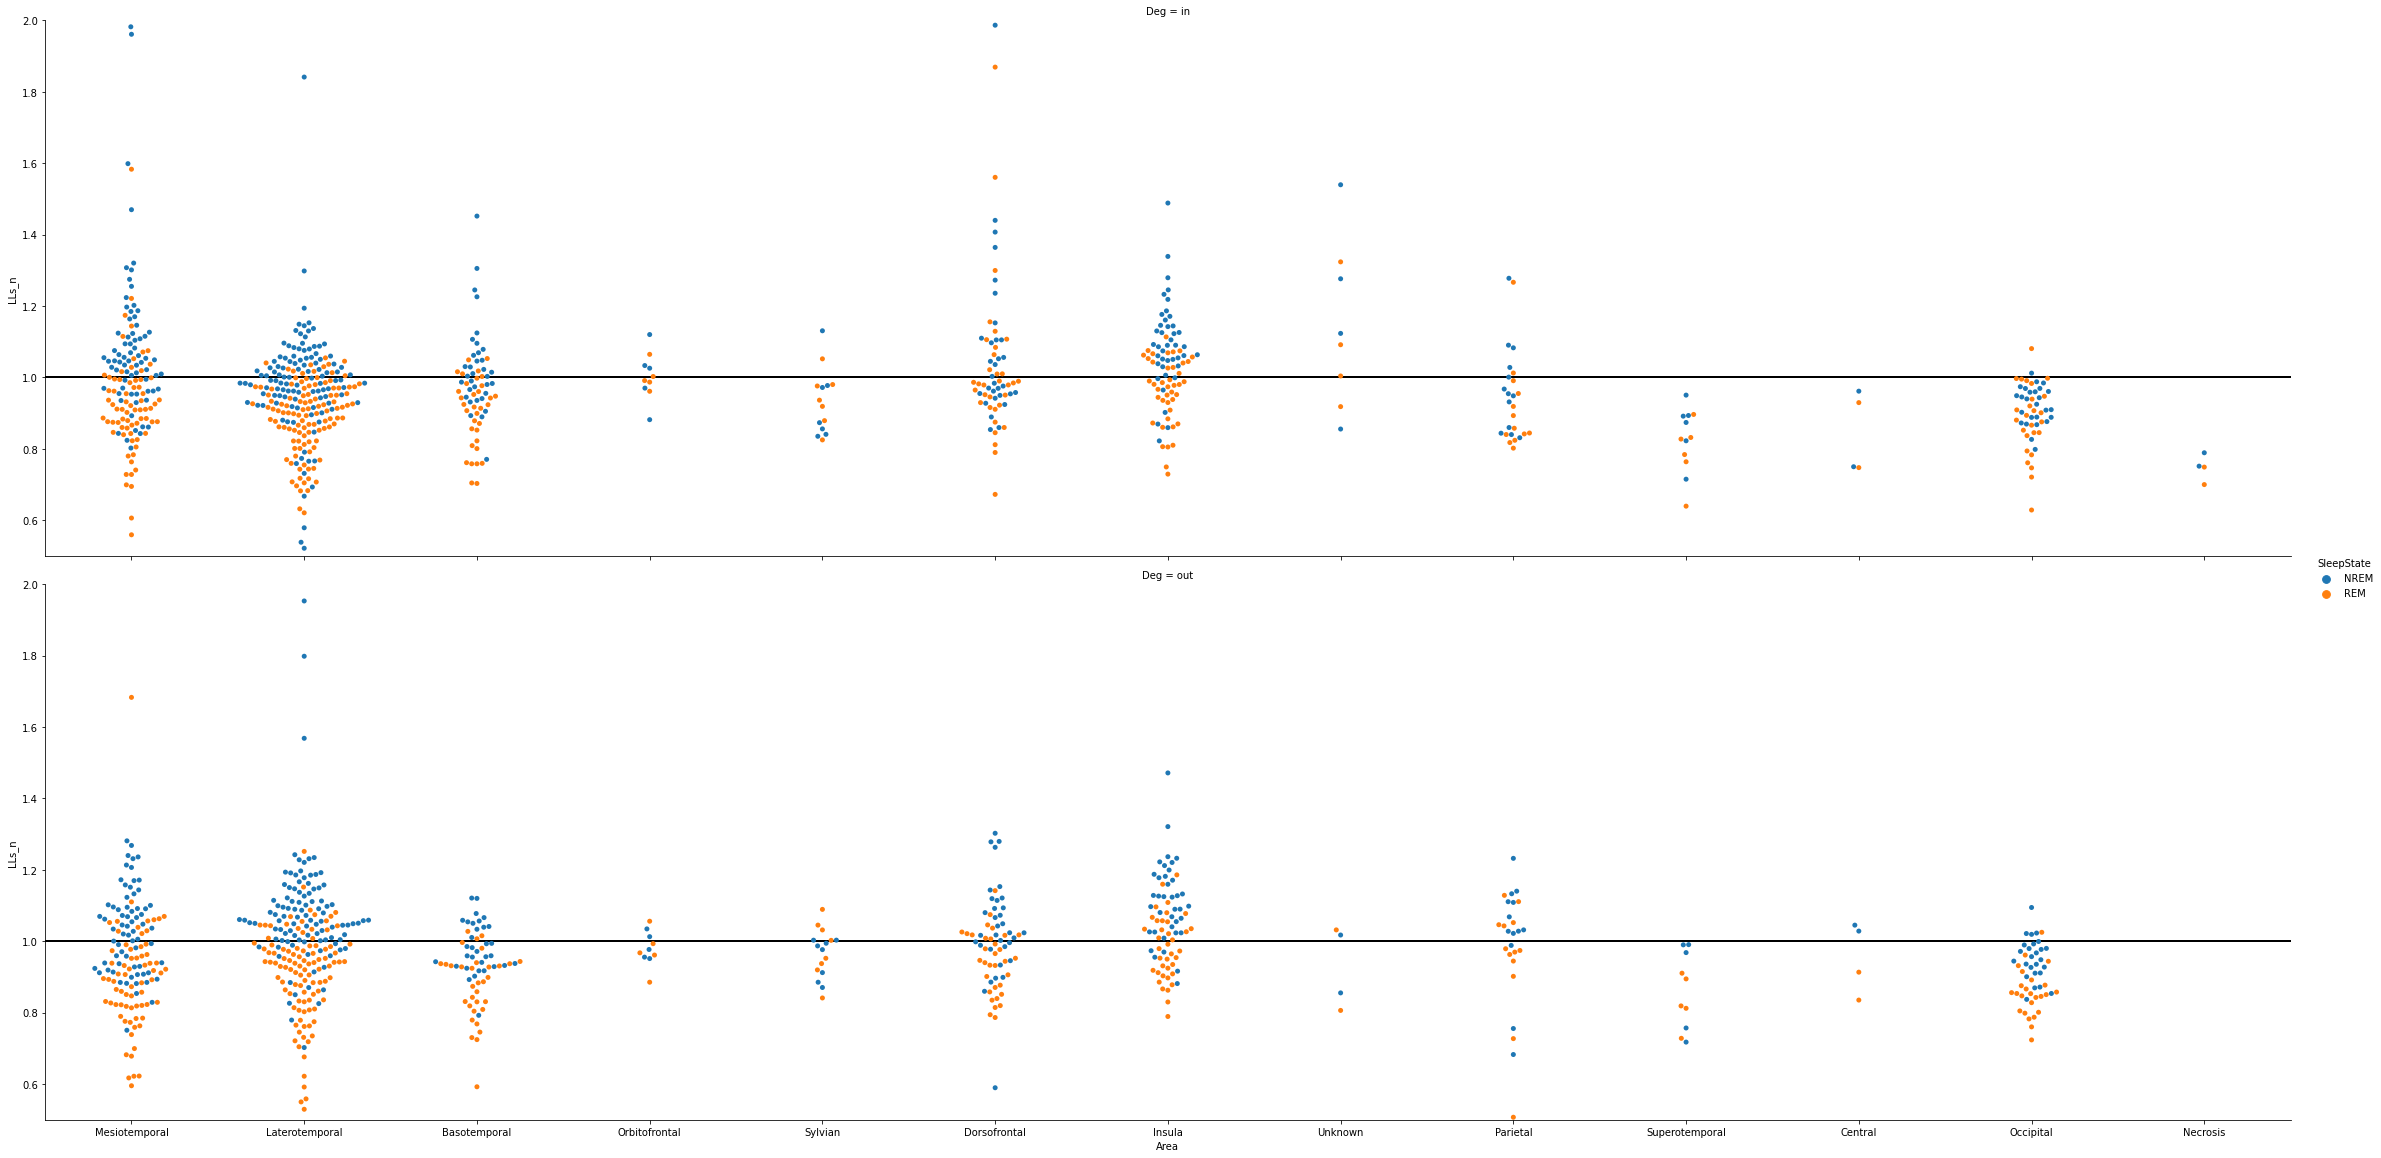

In [78]:
g = sns.catplot(x ='Area', y='LLs_n', hue='SleepState', data= data_deg[data_deg.SleepState != 'Wake'], row = 'Deg', kind='swarm',s=5,height=8,aspect= 4)
ax = g.axes  # access a grid of 'axes' objects
plt.ylim([0.5,2])
ax[0,0].axhline(1, color='k', linewidth=2)
ax[1,0].axhline(1, color='k', linewidth=2)

## Connection-wise

In [35]:
data_con_sleep

Subj  Stim_ID  Chan_ID   StimA    ChanA   Stim         Group   Chan  \
0      EL010      0.0      2.0    HIPP  OTS_med    0.0  local direct    2.0   
2      EL010      0.0      2.0    HIPP  OTS_med    0.0  local direct    2.0   
3      EL010      0.0      2.0    HIPP  OTS_med    0.0  local direct    2.0   
4      EL010      0.0      6.0    HIPP      ITS    0.0   long direct    6.0   
6      EL010      0.0      6.0    HIPP      ITS    0.0   long direct    6.0   
...      ...      ...      ...     ...      ...    ...           ...    ...   
98637  EL020    588.0    585.0  LatOrS   LatOrS  105.0  local direct  102.0   
98638  EL020    588.0    585.0  LatOrS   LatOrS  105.0  local direct  102.0   
98639  EL020    588.0    586.0  LatOrS   LatOrS  105.0  local direct  103.0   
98641  EL020    588.0    586.0  LatOrS   LatOrS  105.0  local direct  103.0   
98642  EL020    588.0    586.0  LatOrS   LatOrS  105.0  local direct  103.0   

      SleepState  H      Prob         LL            Dist     LL_cd  P_ratio  \
0           NREM  0  1.000000   8.924150  local (<15 mm)  0.113264  0.00000   
2            REM  0  1.000000   7.556294  local (<15 mm) -1.331863  0.00000   
3           Wake  0  1.000000   8.808871  local (<15 mm)  0.000000  1.00000   
4           NREM  0  0.384615   2.901134   short (<30mm) -1.804556  0.59375   
6            REM  0  0.000000        NaN   short (<30mm)       NaN -1.00000   
...          ... ..       ...        ...             ...       ...      ...   
98637        REM  0  1.000000  14.633339  local (<15 mm)  1.194812  0.00000   
98638       Wake  0  1.000000  13.182032  local (<15 mm)  0.000000  1.00000   
98639       NREM  0  1.000000  10.947997  local (<15 mm)  0.334718  0.00000   
98641        REM  0  1.000000  10.881376  local (<15 mm)  0.246946  0.00000   
98642       Wake  0  1.000000  10.629452  local (<15 mm)  0.000000  1.00000   

      LL_cd_sig P_ratio_sig     d       DI  onset  
0         False       False   7.0  0.00000    0.0  
2          True       False   7.0  0.00000    0.0  
3           NaN         NaN   7.0  0.00000    0.0  
4         False        True  21.0 -0.35306    0.0  
6         False       False  21.0 -0.35306    0.0  
...         ...         ...   ...      ...    ...  
98637      True       False  10.5 -0.00000    0.0  
98638       NaN         NaN  10.5 -0.00000    0.0  
98639      True       False   7.0 -0.00000    0.0  
98641     False       False   7.0 -0.00000    0.0  
98642       NaN         NaN   7.0 -0.00000    0.0  

[74547 rows x 20 columns]

In [377]:
data_test = data_con_sleep[data_con_sleep.SleepState=='NREM']
data_test = data_test.reset_index(drop=True)

In [380]:
data_test

Subj  Stim_ID  Chan_ID   StimA     ChanA   Stim         Group   Chan  \
0      EL010      0.0      2.0    HIPP   OTS_med    0.0  local direct    2.0   
1      EL010      0.0      6.0    HIPP       ITS    0.0   long direct    6.0   
2      EL010      0.0      7.0    HIPP       ITS    0.0   long direct    7.0   
3      EL010      0.0      8.0    HIPP       ITS    0.0      indirect    8.0   
4      EL010      0.0     18.0    HIPP    RostrS    0.0      indirect   18.0   
...      ...      ...      ...     ...       ...    ...           ...    ...   
24854  EL020    588.0    582.0  LatOrS  TransOrS  105.0   long direct   99.0   
24855  EL020    588.0    583.0  LatOrS  TransOrS  105.0  local direct  100.0   
24856  EL020    588.0    584.0  LatOrS  TransOrS  105.0  local direct  101.0   
24857  EL020    588.0    585.0  LatOrS    LatOrS  105.0  local direct  102.0   
24858  EL020    588.0    586.0  LatOrS    LatOrS  105.0  local direct  103.0   

      SleepState  H      Prob         LL            Dist     LL_cd   P_ratio  \
0           NREM  0  1.000000   8.924150  local (<15 mm)  0.113264  0.000000   
1           NREM  0  0.384615   2.901134   short (<30mm) -1.804556  0.593750   
2           NREM  0  0.428571   3.191314   short (<30mm) -0.020587  0.052083   
3           NREM  0  0.000000        NaN   short (<30mm)       NaN       NaN   
4           NREM  0  0.000000        NaN            long       NaN       NaN   
...          ... ..       ...        ...             ...       ...       ...   
24854       NREM  0  0.818182   4.006245   short (<30mm) -0.005619  0.116612   
24855       NREM  0  0.977273   4.259733   short (<30mm) -0.269397  0.017269   
24856       NREM  0  1.000000  10.553605  local (<15 mm)  0.238981  0.000000   
24857       NREM  0  1.000000  14.171668  local (<15 mm)  0.845660  0.000000   
24858       NREM  0  1.000000  10.947997  local (<15 mm)  0.334718  0.000000   

      LL_cd_sig P_ratio_sig      d        DI  onset  
0         False       False   7.00  0.000000  0.000  
1         False        True  21.00 -0.353060  0.000  
2         False       False  24.50 -0.098943  0.000  
3           NaN         NaN  28.00       NaN    NaN  
4           NaN         NaN  70.34       NaN    NaN  
...         ...         ...    ...       ...    ...  
24854     False       False  21.00 -0.054153  0.002  
24855      True       False  17.50 -0.000633  0.000  
24856     False       False  14.00 -0.000000  0.000  
24857      True       False  10.50 -0.000000  0.000  
24858      True       False   7.00 -0.000000  0.000  

[24859 rows x 20 columns]

In [382]:
data_test.groupby(['SleepState', 'Group', 'P_ratio_sig'])['LL_cd'].count()

SleepState  Group         P_ratio_sig
NREM        indirect      False          3340
                          True           1176
            local direct  False          2316
                          True            439
            long direct   False          3060
                          True            895
Name: LL_cd, dtype: int64

In [386]:
sns.color_palette("Paired")[:2]

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765)]

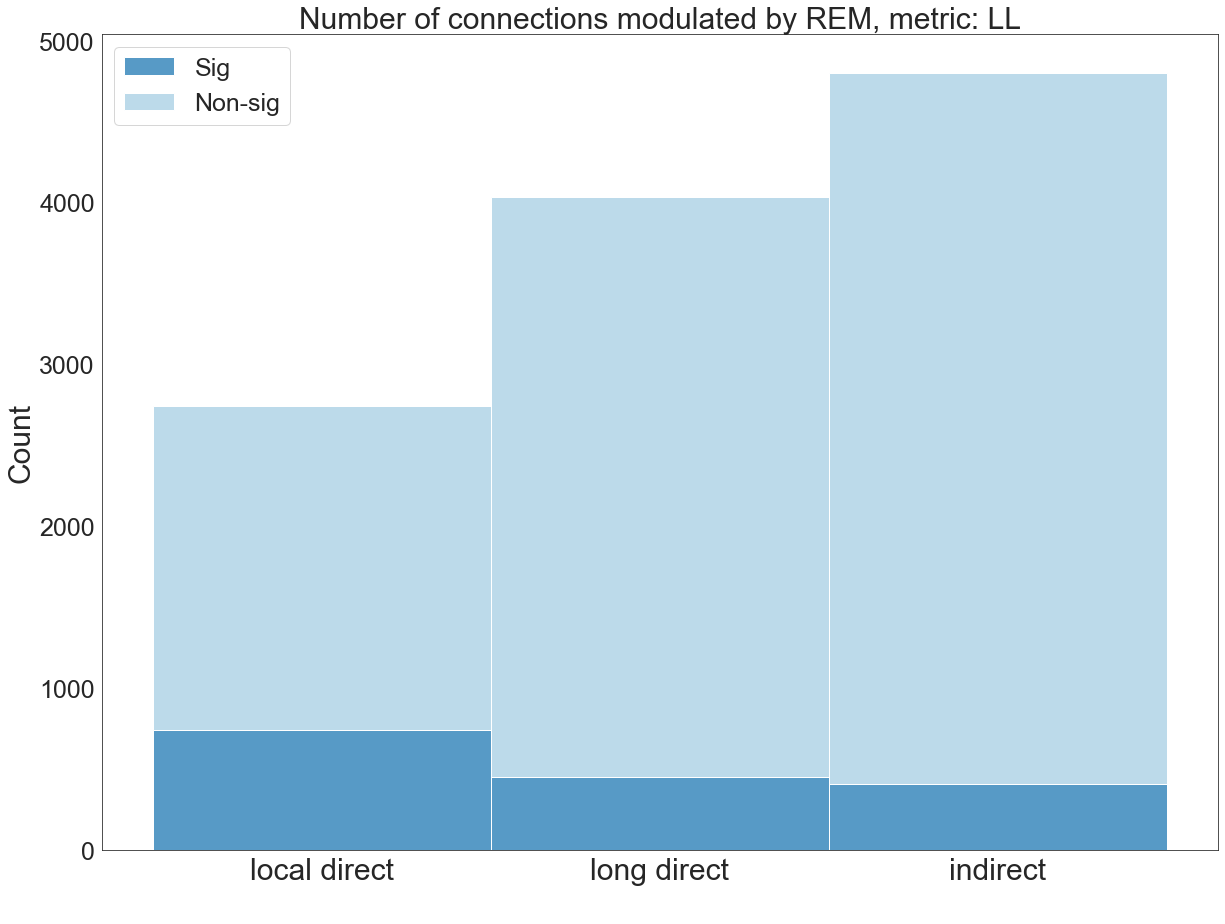

In [390]:
plt.figure(figsize=(20,15))
sns.histplot(x='Group', hue='LL_cd_sig',data=data_con_sleep[data_con_sleep.SleepState=='REM'], multiple='stack', legend=False, palette= sns.color_palette("Paired")[:2])
plt.ylabel('Count', fontsize=30)
plt.xlabel(' ', fontsize=30)
plt.legend(['Sig','Non-sig'],fontsize=25)
plt.xticks(fontsize=30)
plt.title("Number of connections modulated by REM, metric: LL", fontsize=30)
plt.yticks(fontsize=25)
plt.savefig('X:\\4 e-Lab\\EvM\Projects\\EL_experiment\\Analysis\\Patients\\Across\\BrainMapping\\Sleep\\connectogram\\figures\\REM_LL_sig_counts.png', dpi=300)

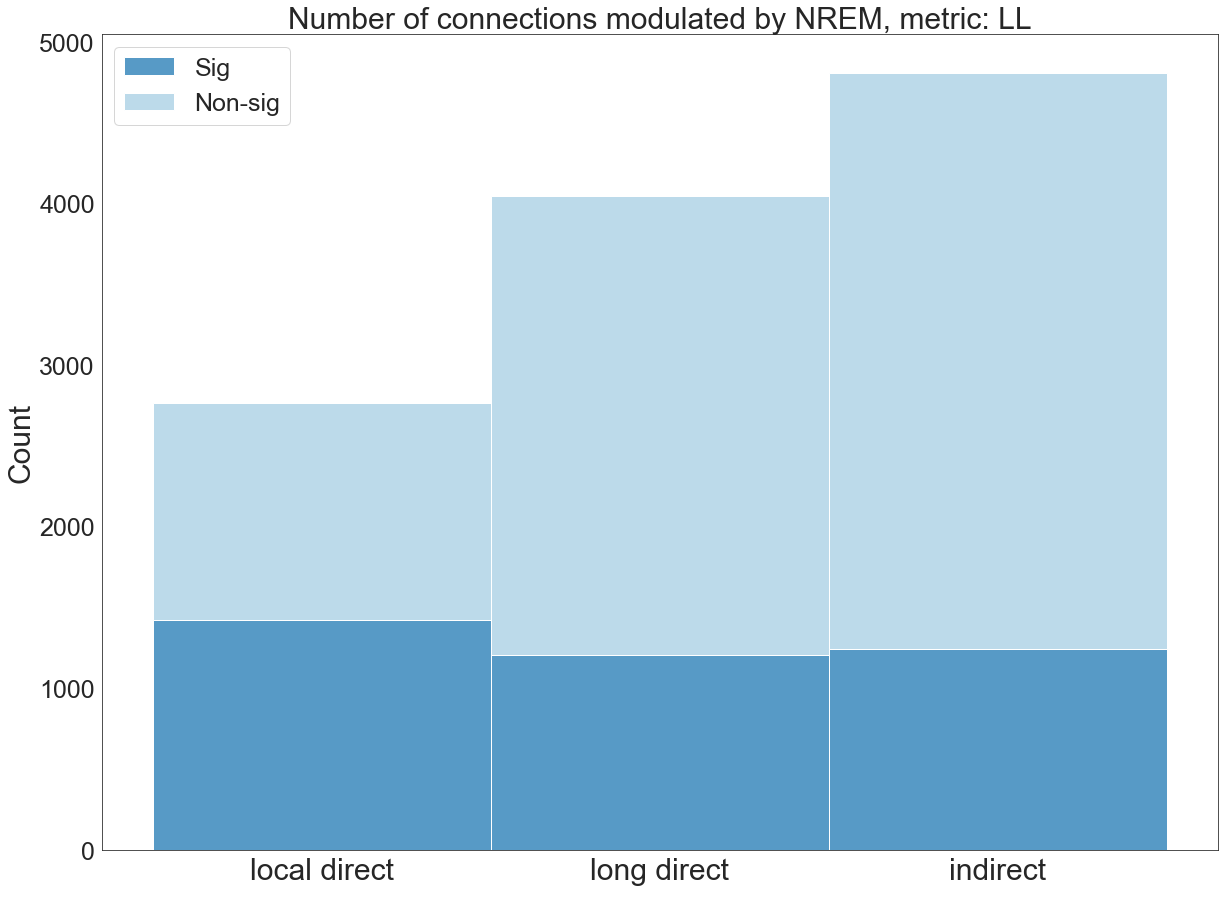

In [387]:
plt.figure(figsize=(20,15))
sns.histplot(x='Group', hue='LL_cd_sig',data=data_con_sleep[data_con_sleep.SleepState=='NREM'], multiple='stack', legend=False, palette= sns.color_palette("Paired")[:2])
plt.ylabel('Count', fontsize=30)
plt.xlabel(' ', fontsize=30)
plt.legend(['Sig','Non-sig'],fontsize=25)
plt.xticks(fontsize=30)
plt.title("Number of connections modulated by NREM, metric: LL", fontsize=30)
plt.yticks(fontsize=25)
plt.savefig('X:\\4 e-Lab\\EvM\Projects\\EL_experiment\\Analysis\\Patients\\Across\\BrainMapping\\Sleep\\connectogram\\figures\\NREM_LL_sig_counts.png', dpi=300)

In [309]:

sys.path.append('T:\EL_experiment\Codes\Connectogram')
import read_data as rd
import plot_funcs as pf


import numpy as np
import pandas as pd
import read_data as rd

from os import path
import matplotlib.pyplot as plt

from globals import DATA_CON_FILEPATH
from ui_connectogram import Ui_MainWindow as mainWindow
from connectogram import Connectrogram

In [272]:
data_con_file = sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\\data_con_sleep.csv'

data_con_sleep.to_csv(data_con_file,
        header=True, index=False)


In [304]:
data_con_cone = pd.read_csv('T:\EL_experiment\Codes\Connectogram\data_con.csv')

In [315]:
data_con_cone = data_con_cone[data_con_cone.Sig>0]
data_con_cone = data_con_cone.reset_index(drop=True)
data_con_cone.to_csv('T:\EL_experiment\Codes\Connectogram\data_con_sleep.csv',
        header=True, index=False)

In [298]:
data_con_cone2 = data_con_cone[data_con_cone.NREM_LL==1]
data_con_cone2 = data_con_cone2.reset_index(drop=True)
data_con_cone2.to_csv('T:\EL_experiment\Codes\Connectogram\data_con_sleep.csv',
        header=True, index=False)

In [305]:
data_con_cone.insert(5, 'REM_P', np.nan)
data_con_cone.insert(5, 'NREM_P', np.nan)
data_con_cone.insert(5, 'REM_LL', np.nan)
data_con_cone.insert(5, 'NREM_LL', np.nan)

In [314]:
data_con_cone = rd.get_Region_data_con(data_con_cone)
for subj in np.unique(data_con_cone.Subj):
    data_con_cone.loc[data_con_cone.Subj == subj, 'Stim'] = data_con_cone.loc[data_con_cone.Subj == subj, 'Stim'] + chan0
    data_con_cone.loc[data_con_cone.Subj == subj, 'Chan'] = data_con_cone.loc[data_con_cone.Subj == subj, 'Chan'] + chan0
    chan0 = np.max(data_con.loc[data_con.Subj == subj, ['Stim', 'Chan']].values) + 1

chan_ID = np.unique(np.concatenate([data_con_cone.Stim, data_con_cone.Chan])).astype('int')

data_nodes = rd.get_nodes(chan_ID, data_con_cone)


AttributeError: module 'read_data' has no attribute 'get_Region_data_con'

##  P

In [306]:
for i in range(len(data_NREM_neg)):
    subj = data_NREM_neg.Subj.values[i]
    sc = data_NREM_neg.Stim.values[i].astype('int')
    rc = data_NREM_neg.Chan.values[i].astype('int')
    data_con_cone.loc[(data_con_cone.Subj==subj)&(data_con_cone.Stim==sc)&(data_con_cone.Chan==rc), 'NREM_LL'] = -1
for i in range(len(data_NREM_pos)):
    subj = data_NREM_pos.Subj.values[i]
    sc = data_NREM_pos.Stim.values[i].astype('int')
    rc = data_NREM_pos.Chan.values[i].astype('int')
    data_con_cone.loc[(data_con_cone.Subj==subj)&(data_con_cone.Stim==sc)&(data_con_cone.Chan==rc), 'NREM_LL'] = 1
for i in range(len(data_REM_pos)):
    subj = data_REM_pos.Subj.values[i]
    sc = data_REM_pos.Stim.values[i].astype('int')
    rc = data_REM_pos.Chan.values[i].astype('int')
    data_con_cone.loc[(data_con_cone.Subj==subj)&(data_con_cone.Stim==sc)&(data_con_cone.Chan==rc), 'REM_LL'] =1
for i in range(len(data_REM_neg)):
    subj = data_REM_neg.Subj.values[i]
    sc = data_REM_neg.Stim.values[i].astype('int')
    rc = data_REM_neg.Chan.values[i].astype('int')
    data_con_cone.loc[(data_con_cone.Subj==subj)&(data_con_cone.Stim==sc)&(data_con_cone.Chan==rc), 'REM_LL'] =-1
##
for i in range(len(data_NREM_pos_p)):
    subj = data_NREM_pos_p.Subj.values[i]
    sc = data_NREM_pos_p.Stim.values[i].astype('int')
    rc = data_NREM_pos_p.Chan.values[i].astype('int')
    data_con_cone.loc[(data_con_cone.Subj==subj)&(data_con_cone.Stim==sc)&(data_con_cone.Chan==rc), 'NREM_P'] = 1
for i in range(len(data_NREM_neg_p)):
    subj = data_NREM_neg_p.Subj.values[i]
    sc = data_NREM_neg_p.Stim.values[i].astype('int')
    rc = data_NREM_neg_p.Chan.values[i].astype('int')
    data_con_cone.loc[(data_con_cone.Subj==subj)&(data_con_cone.Stim==sc)&(data_con_cone.Chan==rc), 'NREM_P'] = -1
for i in range(len(data_REM_pos_p)):
    subj = data_REM_pos_p.Subj.values[i]
    sc = data_REM_pos_p.Stim.values[i].astype('int')
    rc = data_REM_pos_p.Chan.values[i].astype('int')
    data_con_cone.loc[(data_con_cone.Subj==subj)&(data_con_cone.Stim==sc)&(data_con_cone.Chan==rc), 'REM_P'] = 1
for i in range(len(data_REM_neg_p)):
    subj = data_REM_neg_p.Subj.values[i]
    sc = data_REM_neg_p.Stim.values[i].astype('int')
    rc = data_REM_neg_p.Chan.values[i].astype('int')
    data_con_cone.loc[(data_con_cone.Subj==subj)&(data_con_cone.Stim==sc)&(data_con_cone.Chan==rc), 'REM_P'] = -1
    

In [287]:
data_NREM_neg = data_con_sleep2[(data_con_sleep2.LL_cd<0)&(data_con_sleep2.SleepState=='NREM')]
data_NREM_pos = data_con_sleep2[(data_con_sleep2.LL_cd>0)&(data_con_sleep2.SleepState=='NREM')]
data_REM_neg = data_con_sleep2[(data_con_sleep2.LL_cd<0)&(data_con_sleep2.SleepState=='REM')]
data_REM_pos = data_con_sleep2[(data_con_sleep2.LL_cd>0)&(data_con_sleep2.SleepState=='REM')]

data_NREM_neg_p = data_con_sleep2[(data_con_sleep2.P_ratio<0)&(data_con_sleep2.SleepState=='NREM')]
data_NREM_pos_p = data_con_sleep2[(data_con_sleep2.P_ratio>0)&(data_con_sleep2.SleepState=='NREM')]
data_REM_neg_p = data_con_sleep2[(data_con_sleep2.P_ratio<0)&(data_con_sleep2.SleepState=='REM')]
data_REM_pos_p = data_con_sleep2[(data_con_sleep2.P_ratio>0)&(data_con_sleep2.SleepState=='REM')]

In [284]:
data_con_sleep2.groupby(['Subj', 'Stim', 'Chan', 'SleepState'], as_index=False)[['P_ratio']].mean()

DataError: No numeric types to aggregate

In [273]:
data_con_NREM   = data_con_sleep[data_con_sleep.SleepState == 'NREM']

In [267]:
data_con_sleep.to_csv()

Subj  Stim_ID  Chan_ID   StimA    ChanA   Stim         Group   Chan  \
0      EL010      0.0      2.0    HIPP  OTS_med    0.0  local direct    2.0   
2      EL010      0.0      2.0    HIPP  OTS_med    0.0  local direct    2.0   
3      EL010      0.0      2.0    HIPP  OTS_med    0.0  local direct    2.0   
4      EL010      0.0      6.0    HIPP      ITS    0.0   long direct    6.0   
6      EL010      0.0      6.0    HIPP      ITS    0.0   long direct    6.0   
...      ...      ...      ...     ...      ...    ...           ...    ...   
98637  EL020    588.0    585.0  LatOrS   LatOrS  105.0  local direct  102.0   
98638  EL020    588.0    585.0  LatOrS   LatOrS  105.0  local direct  102.0   
98639  EL020    588.0    586.0  LatOrS   LatOrS  105.0  local direct  103.0   
98641  EL020    588.0    586.0  LatOrS   LatOrS  105.0  local direct  103.0   
98642  EL020    588.0    586.0  LatOrS   LatOrS  105.0  local direct  103.0   

      SleepState  H      Prob         LL            Dist     LL_cd  P_ratio  \
0           NREM  0  1.000000   8.924150  local (<15 mm)  0.113264  0.00000   
2            REM  0  1.000000   7.556294  local (<15 mm) -1.331863  0.00000   
3           Wake  0  1.000000   8.808871  local (<15 mm)  0.000000  1.00000   
4           NREM  0  0.384615   2.901134   short (<30mm) -1.804556  0.59375   
6            REM  0  0.000000        NaN   short (<30mm)       NaN -1.00000   
...          ... ..       ...        ...             ...       ...      ...   
98637        REM  0  1.000000  14.633339  local (<15 mm)  1.194812  0.00000   
98638       Wake  0  1.000000  13.182032  local (<15 mm)  0.000000  1.00000   
98639       NREM  0  1.000000  10.947997  local (<15 mm)  0.334718  0.00000   
98641        REM  0  1.000000  10.881376  local (<15 mm)  0.246946  0.00000   
98642       Wake  0  1.000000  10.629452  local (<15 mm)  0.000000  1.00000   

      LL_cd_sig P_ratio_sig     d       DI  onset  
0         False       False   7.0  0.00000    0.0  
2          True       False   7.0  0.00000    0.0  
3           NaN         NaN   7.0  0.00000    0.0  
4         False        True  21.0 -0.35306    0.0  
6         False       False  21.0 -0.35306    0.0  
...         ...         ...   ...      ...    ...  
98637      True       False  10.5 -0.00000    0.0  
98638       NaN         NaN  10.5 -0.00000    0.0  
98639      True       False   7.0 -0.00000    0.0  
98641     False       False   7.0 -0.00000    0.0  
98642       NaN         NaN   7.0 -0.00000    0.0  

[74547 rows x 20 columns]

c:\users\i0328442\appdata\local\programs\python\python37\lib\site-packages\seaborn\_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

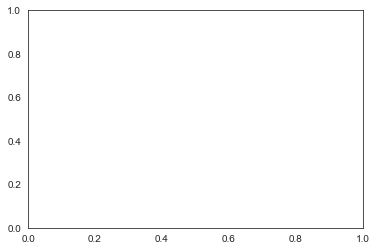

In [266]:
sns.histplot(x='Group', hue='LL_cd_sig',data=data_con_sleep[data_con_sleep.SleepState=='NREM'], multiple='stack', palette= color_group)

In [258]:
color_d, color_dist, color_group, color_elab = ls.get_color()

Text(0.5, 6.7999999999999545, '')

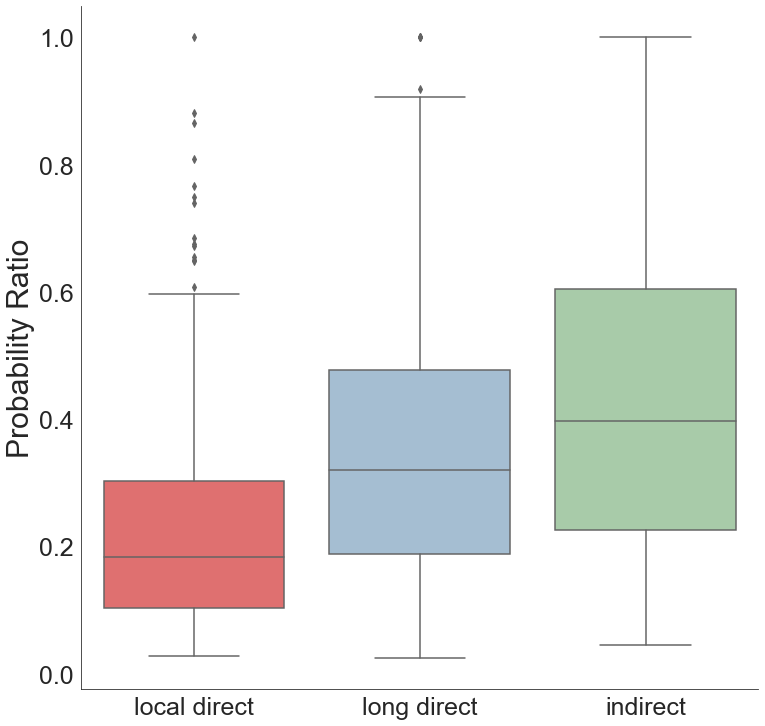

In [262]:
data_plot = data_con_sleep[(data_con_sleep.P_ratio_sig==1)& (data_con_sleep.SleepState=='NREM')]
sns.catplot(x='Group', y= abs(data_plot.P_ratio),data=data_plot,  kind='box',order= group_labels, height=10, palette= color_group)
plt.ylabel("Probability Ratio", fontsize=30)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.xlabel("", fontsize=30)

Text(0.5, 6.7999999999999545, '')

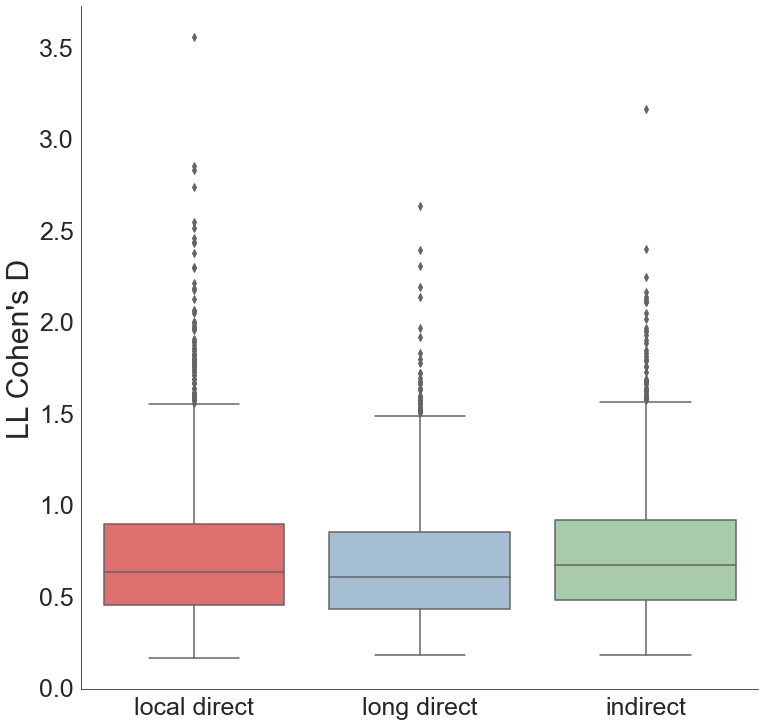

In [259]:
data_plot = data_con_sleep[(data_con_sleep.LL_cd_sig==1)& (data_con_sleep.SleepState=='NREM')]
sns.catplot(x='Group', y= abs(data_plot.LL_cd),data=data_plot,  kind='box',order= group_labels, height=10, palette= color_group)
plt.ylabel("LL Cohen's D", fontsize=30)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.xlabel("", fontsize=30)

(0.0, 1.0)

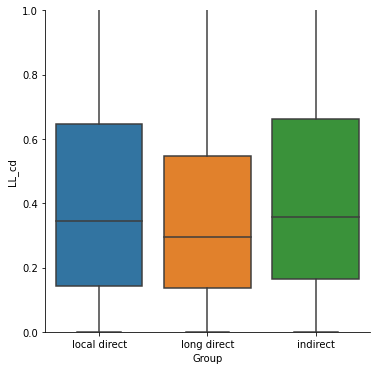

In [67]:
data_plot = data_con_sleep[(data_con_sleep.SleepState=='NREM')]
sns.catplot(x='Group',y= abs(data_plot.LL_cd),data=data_plot,  kind='box', palette= color_group)
plt.ylim([0,1])

In [247]:
group_labels = np.unique(data_con_sleep.Group)
group_labels = ['local direct',  'long direct','indirect']

array(['indirect', 'local direct', 'long direct'], dtype=object)

In [248]:
group_labels = ['local direct',  'long direct','indirect']

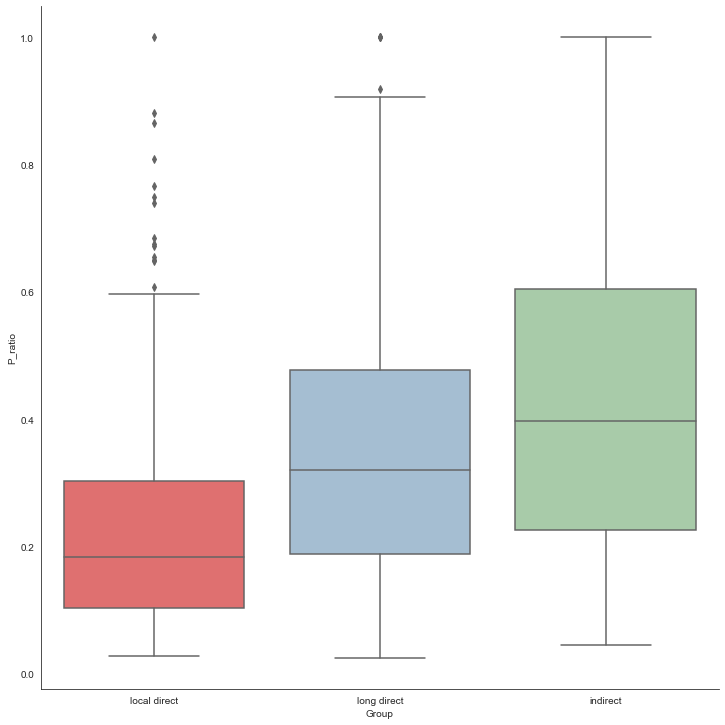

In [38]:
sns.catplot(x='Group', y= 'LL_cd', hue='LL_cd_sig',data=data_con_sleep[data_con_sleep.SleepState=='NREM'], kind='hist', dodge=True)


ValueError: Plot kind 'hist' is not recognized

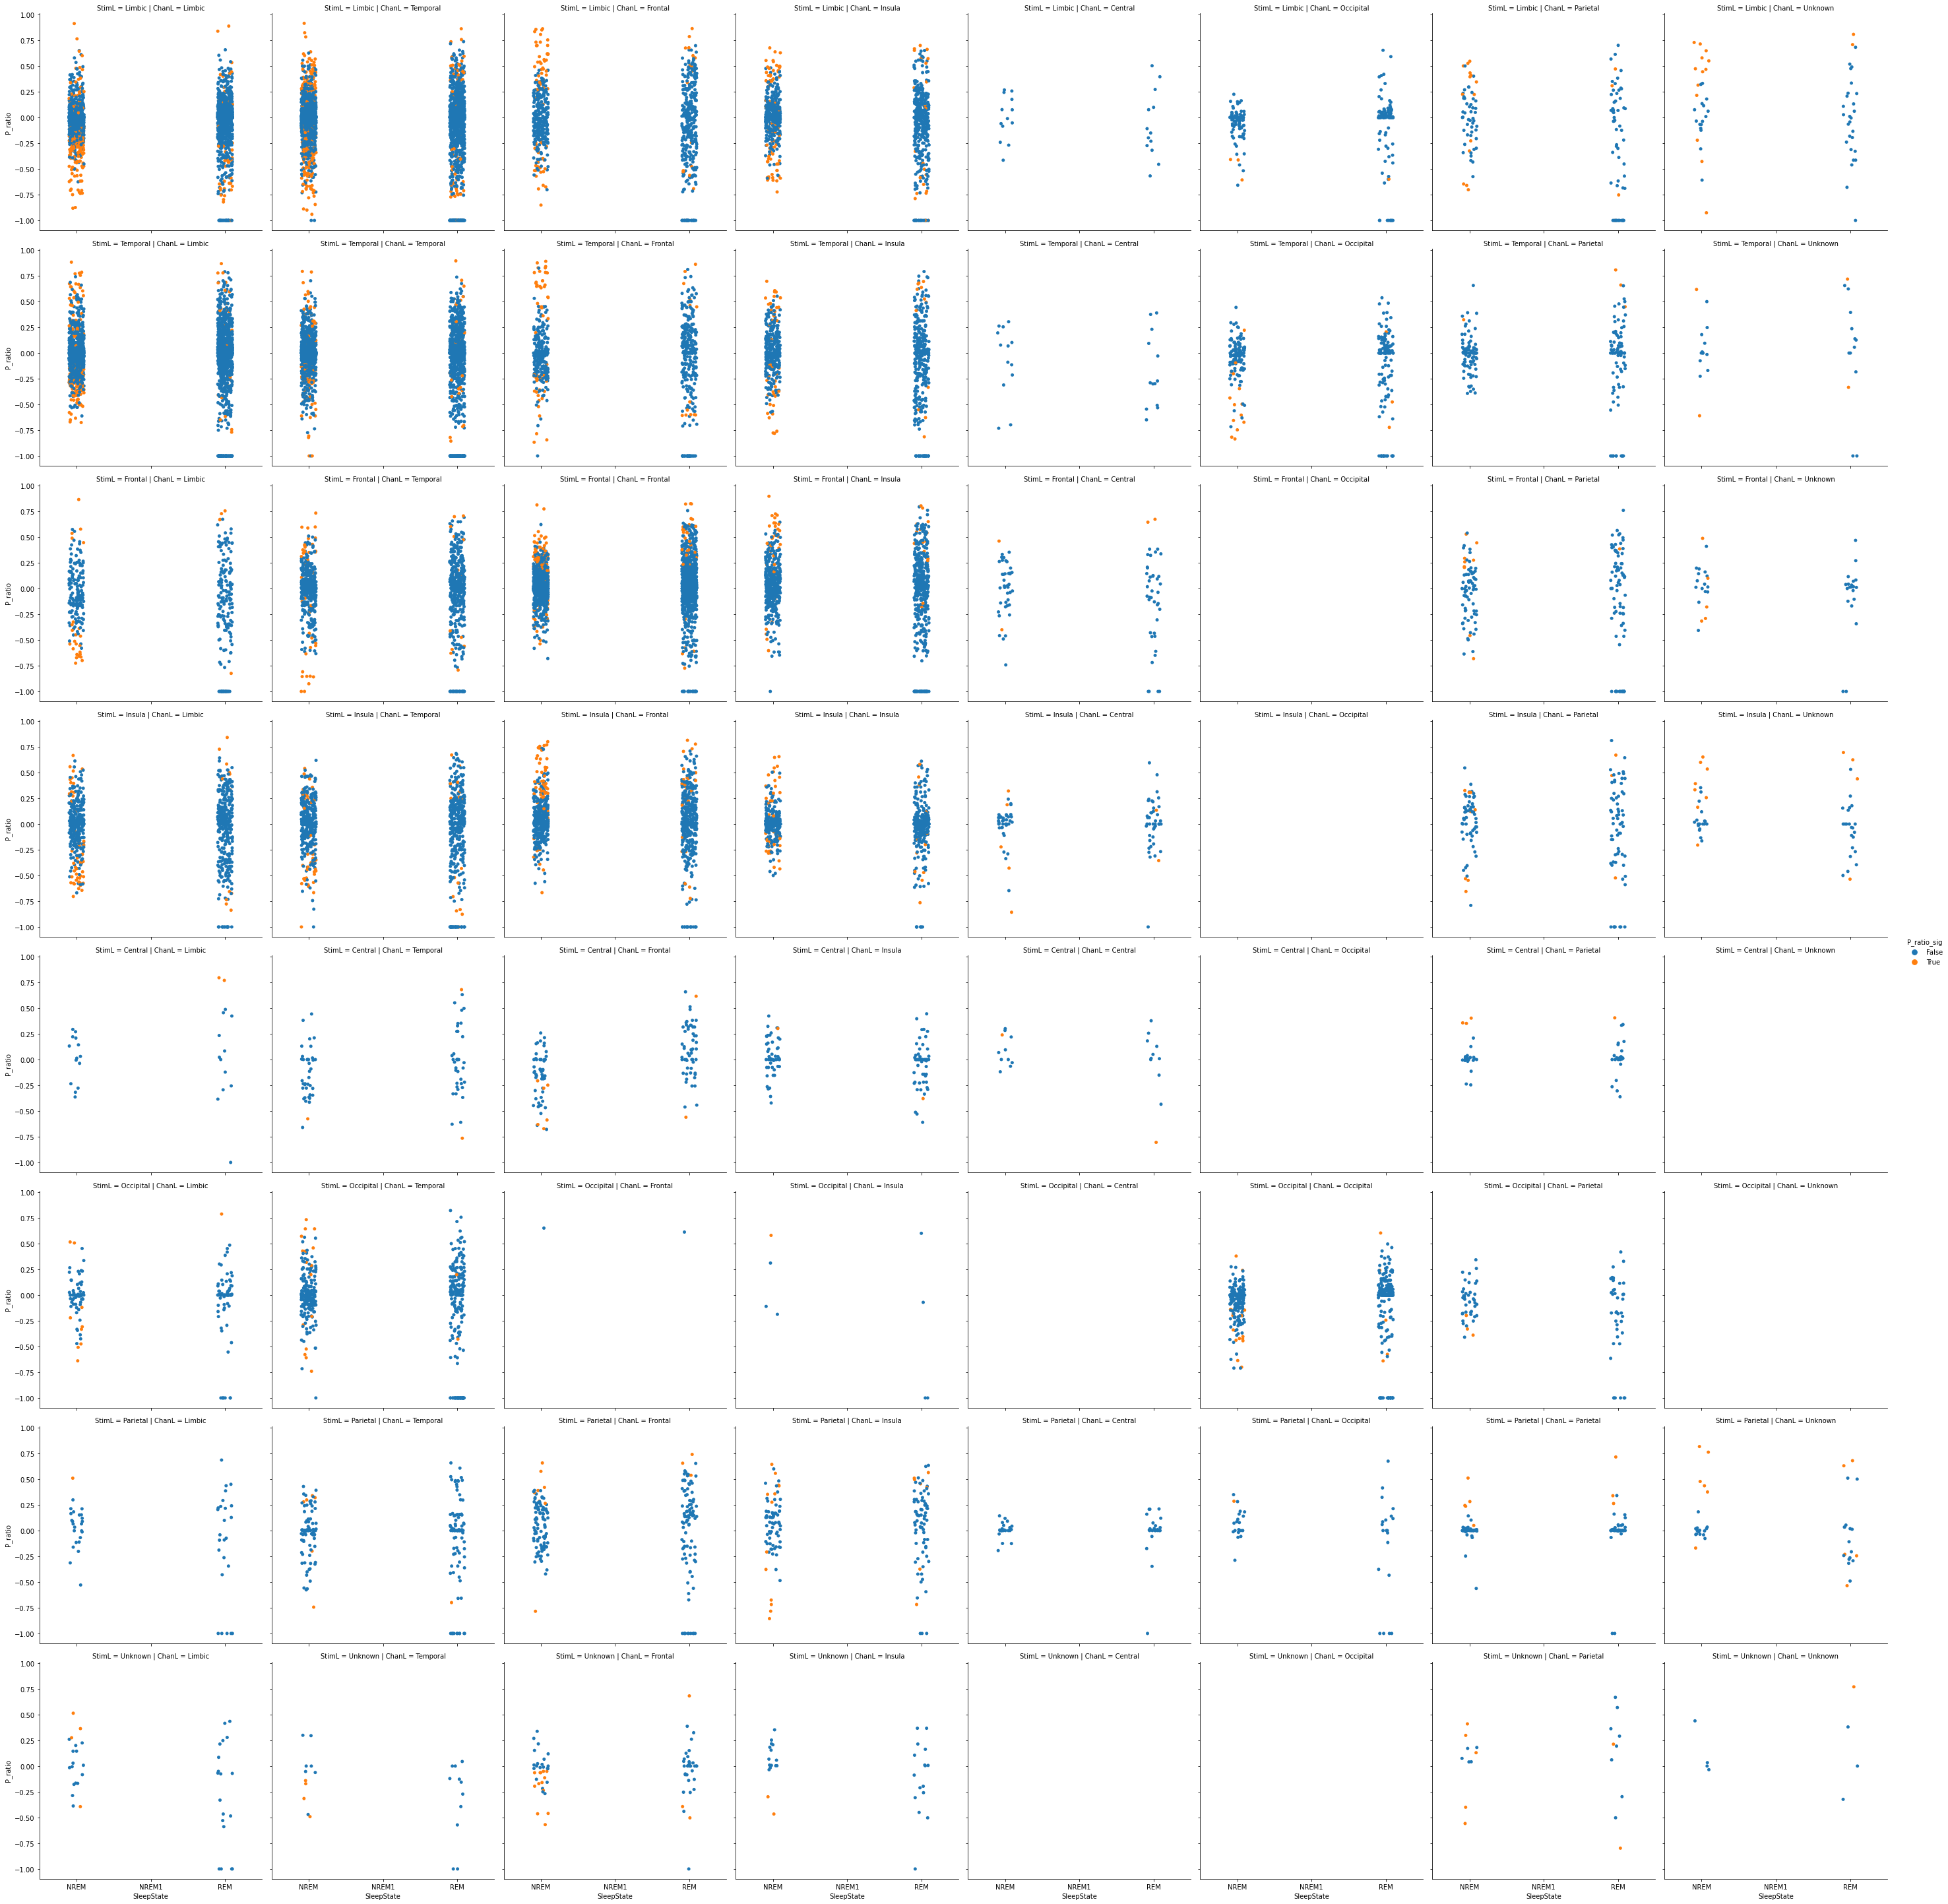

In [462]:
sns.catplot(x='SleepState', y= 'P_ratio', hue='P_ratio_sig',data=data_con[data_con.SleepState!='Wake'], row='StimL', col = 'ChanL')
plt.savefig('X:\\4 e-Lab\EvM\Projects\EL_experiment\Analysis\Patients\Across\CR\sleep_connections\con_sig_P.jpg')

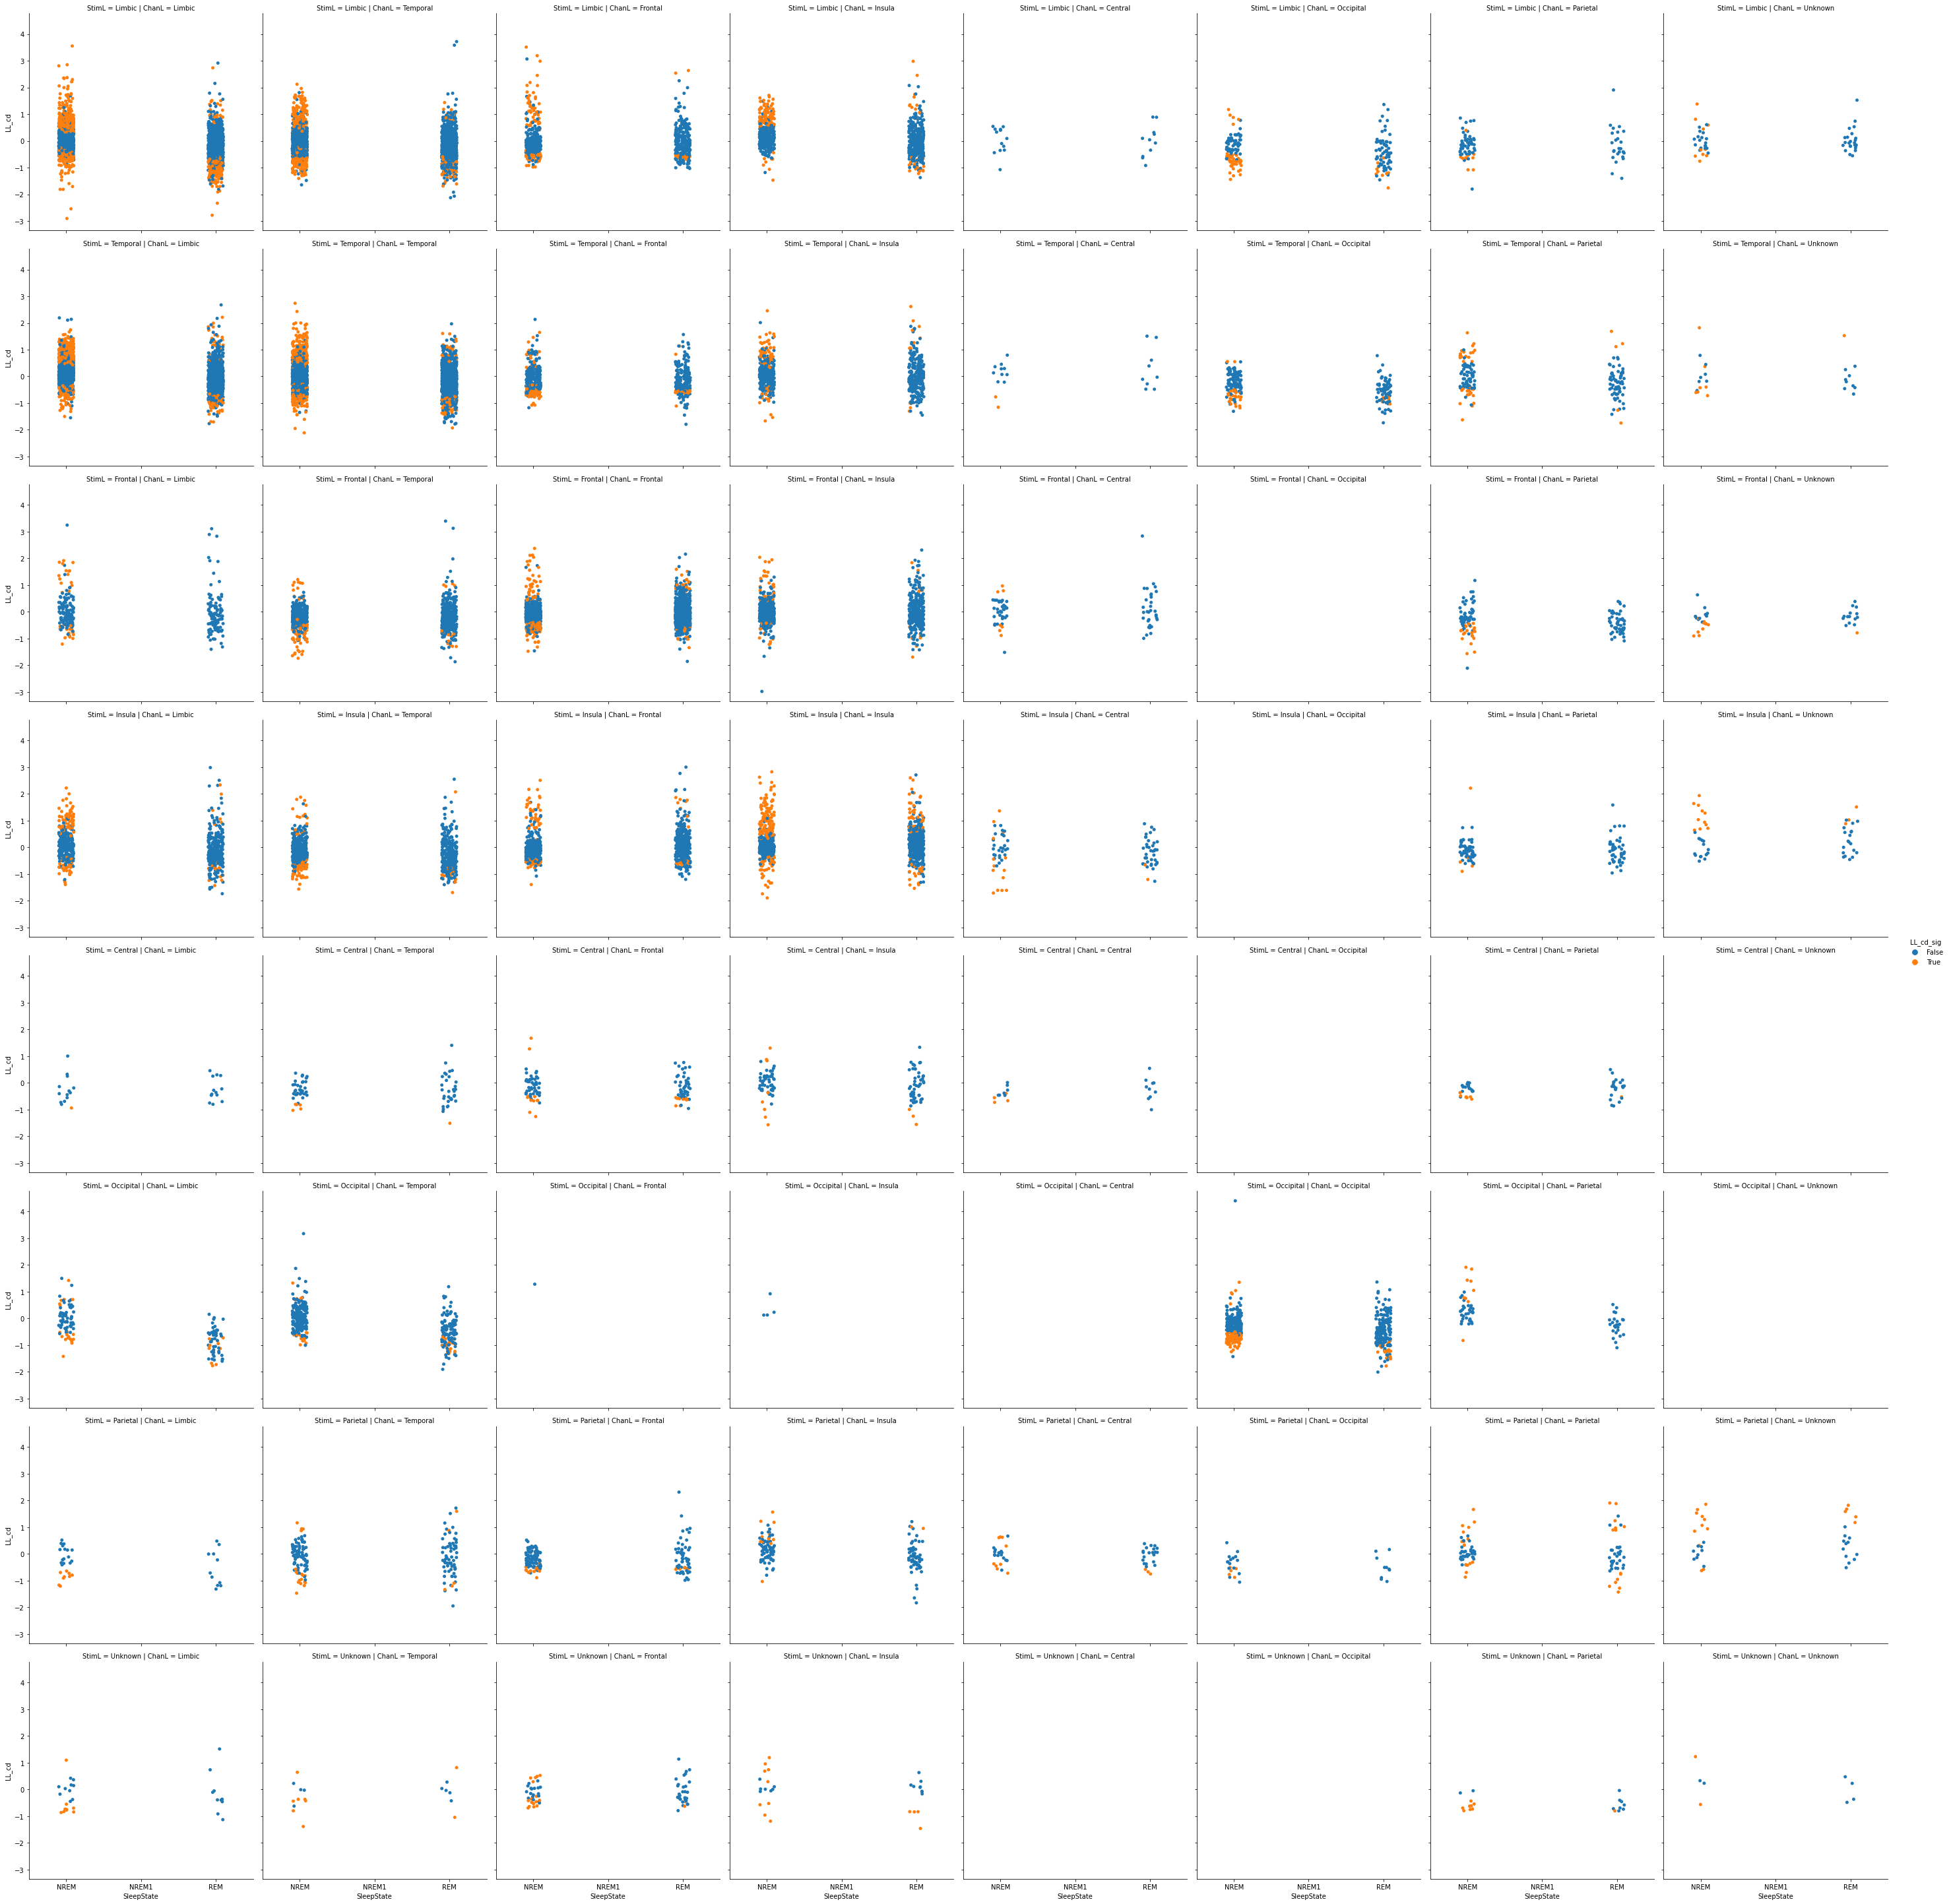

In [461]:
sns.catplot(x='SleepState', y= 'LL_cd', hue='LL_cd_sig',data=data_con[data_con.SleepState!='Wake'], row='StimL', col = 'ChanL')
plt.savefig('X:\\4 e-Lab\EvM\Projects\EL_experiment\Analysis\Patients\Across\CR\sleep_connections\con_sig_LL.jpg')

In [363]:
data_con

StimL     ChanL   Subj   StimA    ChanA          StimR  \
0        Limbic    Limbic  EL010    HIPP  OTS_med  Mesiotemporal   
1        Limbic    Limbic  EL010    HIPP  OTS_med  Mesiotemporal   
2        Limbic    Limbic  EL010    HIPP  OTS_med  Mesiotemporal   
3        Limbic    Limbic  EL010    HIPP  OTS_med  Mesiotemporal   
4        Limbic  Temporal  EL010    HIPP      ITS  Mesiotemporal   
...         ...       ...    ...     ...      ...            ...   
106477  Frontal   Frontal  EL020  LatOrS   LatOrS  Orbitofrontal   
106478  Frontal   Frontal  EL020  LatOrS   LatOrS  Orbitofrontal   
106479  Frontal   Frontal  EL020  LatOrS   LatOrS  Orbitofrontal   
106480  Frontal   Frontal  EL020  LatOrS   LatOrS  Orbitofrontal   
106481  Frontal   Frontal  EL020  LatOrS   LatOrS  Orbitofrontal   

                 ChanR   Stim   Chan SleepState  H  Prob         LL  \
0         Basotemporal    1.0    3.0       NREM  0   1.0   8.924150   
1         Basotemporal    1.0    3.0      NREM1  0   1.0   8.515362   
2         Basotemporal    1.0    3.0        REM  0   1.0   7.556294   
3         Basotemporal    1.0    3.0       Wake  0   1.0   8.808871   
4       Laterotemporal    1.0    7.0       NREM  0   0.0        NaN   
...                ...    ...    ...        ... ..   ...        ...   
106477   Orbitofrontal  590.0  587.0       Wake  0   1.0  13.182032   
106478   Orbitofrontal  590.0  588.0       NREM  0   1.0  10.947997   
106479   Orbitofrontal  590.0  588.0      NREM1  0   1.0  10.782028   
106480   Orbitofrontal  590.0  588.0        REM  0   1.0  10.881376   
106481   Orbitofrontal  590.0  588.0       Wake  0   1.0  10.629452   

                  Dist     LL_cd  P_ratio LL_cd_sig P_ratio_sig     d  
0       local (<15 mm)  0.113264      0.0     False       False   7.0  
1       local (<15 mm)       NaN      NaN       NaN         NaN   7.0  
2       local (<15 mm) -1.331863      0.0      True       False   7.0  
3       local (<15 mm)  0.000000      1.0       NaN         NaN   7.0  
4        short (<30mm)       NaN      NaN       NaN         NaN  21.0  
...                ...       ...      ...       ...         ...   ...  
106477  local (<15 mm)  0.000000      1.0       NaN         NaN  10.5  
106478  local (<15 mm)  0.334718      0.0     False       False   7.0  
106479  local (<15 mm)       NaN      NaN       NaN         NaN   7.0  
106480  local (<15 mm)  0.246946      0.0     False       False   7.0  
106481  local (<15 mm)  0.000000      1.0       NaN         NaN   7.0  

[106140 rows x 19 columns]

In [392]:
data_stats = data_con[~np.isnan(data_con.P_ratio)&(data_con.ChanL!='Unknown')&(data_con.StimL!='Unknown')&(data_con.SleepState=='NREM')&(data_con.H==0)&(data_con.P_ratio_sig==True)]
data_stats = data_stats.reset_index(drop=True)

In [394]:
data_stats = data_stats.sort_values('StimL')
data_stats = data_stats.reset_index(drop=True)

In [396]:
data_stats.StimL+'-'+data_stats.StimL 

0         Central-Central
1         Central-Central
2         Central-Central
3         Central-Central
4         Central-Central
              ...        
1303    Temporal-Temporal
1304    Temporal-Temporal
1305    Temporal-Temporal
1306    Temporal-Temporal
1307    Temporal-Temporal
Name: StimL, Length: 1308, dtype: object

In [397]:
data_stats.insert(0,'ConL',data_stats.StimL+'-'+data_stats.ChanL )

In [399]:
data_stats.insert(0,'Increase',1)
data_stats.loc[data_stats.P_ratio<0,'Increase'] = 0

In [402]:
contigency= pd.crosstab(data_stats['ConL'], data_stats['Increase'])
c, p, dof, expected = scipy.stats.chi2_contingency(contigency)

In [403]:
p

3.1990235817388905e-39

<AxesSubplot:xlabel='d', ylabel='P_ratio'>

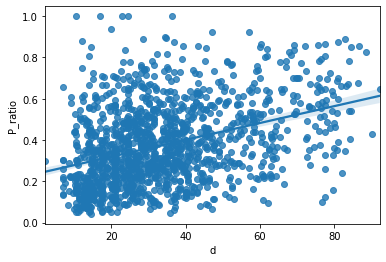

In [389]:
sns.regplot(x=data_stats.d, y=abs(data_stats.P_ratio))

In [434]:
subjs = ['EL003','EL004','EL005','EL010', 'EL011', 'EL012', 'EL013', 'EL014', 'EL015', 'EL016', 'EL017', 'EL019', 'EL020']

In [438]:
bad_all

array([41, 48, 58, 73, 85, 86])

In [441]:
len(labels_all)-len(bad_all)

100

In [445]:
subj='EL003'
path_gen = os.path.join(sub_path+'\Patients\\' + subj)
if not os.path.exists(path_gen):
    path_gen = 'T:\\EL_experiment\\Patients\\' + subj
path_patient = path_gen + '\Data\EL_experiment'
path_infos = os.path.join(path_patient, 'infos')
if not os.path.exists(path_infos):
    path_infos = path_gen + '\\infos'
path_patient_analysis = sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\\' + subj

lbls = pd.read_excel(os.path.join(path_infos, subj + "_labels.xlsx"), header=0, sheet_name='BP')
labels_all = lbls.label.values
labels_clinic = lbls.Clinic.values
labels_region = lbls.Region.values
labels_region[labels_region == 'HIPP'] = 'Mesiotemporal'
labels_region[labels_region == 'HIPP '] = 'Mesiotemporal'
labels_region[labels_region == 'ENT'] = 'Basotemporal'
bad_region = np.where((labels_region == 'WM') | (labels_region == 'OUT') | (labels_region == 'Putamen'))[0]

bad_chans = pd.read_csv(path_patient_analysis + '/BrainMapping/data/badchan.csv')
bad_chans = np.unique(np.array(np.where(bad_chans.values[:, 1:] == 1))[0, :])

WM_chans = np.where(labels_region == 'WM')[0]
bad_all = np.unique(np.concatenate([WM_chans, bad_region, bad_chans])).astype('int')
len(labels_all)-len(bad_all)

49

In [ ]:
s = 0
for subj in subjs:
    hyp = pd.read_csv('X:\\4 e-Lab\EvM\Projects\EL_experiment\Analysis\Patients\\'+subj+'\\stimlist_hypnogram.csv')
    
    
    df = pd.DataFrame([[subj,len(np.unique(hyp.stim_block)),len(hyp[(hyp.sleep==0)])/len(hyp),len(hyp[(hyp.sleep>1)&(hyp.sleep<4)])/len(hyp),len(hyp[(hyp.sleep==4)])/len(hyp)]], columns=['Subj','Block','W','NREM','REM'])
    if s ==0:
        sleep_overview = df
        s = 1
    else:
        sleep_overview = pd.concat([sleep_overview,df])
sleep_overview = sleep_overview.reset_index(drop=True)

In [450]:
s = 0
for subj in subjs:
    path_gen = os.path.join(sub_path+'\Patients\\' + subj)
    if not os.path.exists(path_gen):
        path_gen = 'T:\\EL_experiment\\Patients\\' + subj
    path_patient = path_gen + '\Data\EL_experiment'
    path_infos = os.path.join(path_patient, 'infos')
    if not os.path.exists(path_infos):
        path_infos = path_gen + '\\infos'
    path_patient_analysis = sub_path+'\EvM\Projects\EL_experiment\Analysis\Patients\\' + subj

    lbls = pd.read_excel(os.path.join(path_infos, subj + "_labels.xlsx"), header=0, sheet_name='BP')
    labels_all = lbls.label.values
    labels_clinic = lbls.Clinic.values
    labels_region = lbls.Region.values
    labels_region[labels_region == 'HIPP'] = 'Mesiotemporal'
    labels_region[labels_region == 'HIPP '] = 'Mesiotemporal'
    labels_region[labels_region == 'ENT'] = 'Basotemporal'
    bad_region = np.where((labels_region == 'WM') | (labels_region == 'OUT') | (labels_region == 'Putamen'))[0]

    bad_chans = pd.read_csv(path_patient_analysis + '/BrainMapping/data/badchan.csv')
    bad_chans = np.unique(np.array(np.where(bad_chans.values[:, 1:] == 1))[0, :])

    WM_chans = np.where(labels_region == 'WM')[0]
    bad_all = np.unique(np.concatenate([WM_chans, bad_region, bad_chans])).astype('int')
    n_chan =  len(labels_all)-len(bad_all)

    
    hyp = pd.read_csv('X:\\4 e-Lab\EvM\Projects\EL_experiment\Analysis\Patients\\'+subj+'\\stimlist_hypnogram.csv')
    df = pd.DataFrame([[subj,n_chan, len(np.unique(hyp.stim_block)),len(hyp[(hyp.sleep==0)])/len(hyp),len(hyp[(hyp.sleep>1)&(hyp.sleep<4)])/len(hyp),len(hyp[(hyp.sleep==4)])/len(hyp)]], columns=['Subj','Chan','Block','W','NREM','REM'])
    if s ==0:
        sleep_overview = df
        s = 1
    else:
        sleep_overview = pd.concat([sleep_overview,df])
sleep_overview = sleep_overview.reset_index(drop=True)

In [451]:
sleep_overview

Subj  Chan  Block         W      NREM       REM
0   EL003    49     20  0.694640  0.187727  0.091681
1   EL004    56     40  0.648966  0.232805  0.097933
2   EL005    51     38  0.680756  0.228023  0.072885
3   EL010    42     21  0.633031  0.260019  0.044524
4   EL011    52     70  0.772124  0.172582  0.044796
5   EL012    74     18  0.964332  0.014127  0.000000
6   EL013    47     35  1.000000  0.000000  0.000000
7   EL014    45     42  0.767934  0.185258  0.025749
8   EL015    55     54  0.660557  0.257329  0.059436
9   EL016    55     57  0.751878  0.153355  0.038652
10  EL017    47     17  0.571909  0.274888  0.107201
11  EL019    61     45  0.774552  0.170068  0.032046
12  EL020   100     55  0.608742  0.305089  0.065169

In [452]:
sleep_overview.to_excel('X:\\4 e-Lab\\EvM\Projects\EL_experiment\Analysis\Patients\Across\CR\\sleep_analysis_raw.xlsx', index=False, header=True)

In [421]:
pd.DataFrame([[subj,len(np.unique(hyp.stim_block)),len(hyp[(hyp.sleep==0)])/len(hyp),len(hyp[(hyp.sleep>1)&(hyp.sleep<4)])/len(hyp),len(hyp[(hyp.sleep==4)])/len(hyp)]], columns=['Subj','Block','W','NREM','REM'])

Subj  Block         W      NREM       REM
0  EL020     55  0.608742  0.305089  0.065169

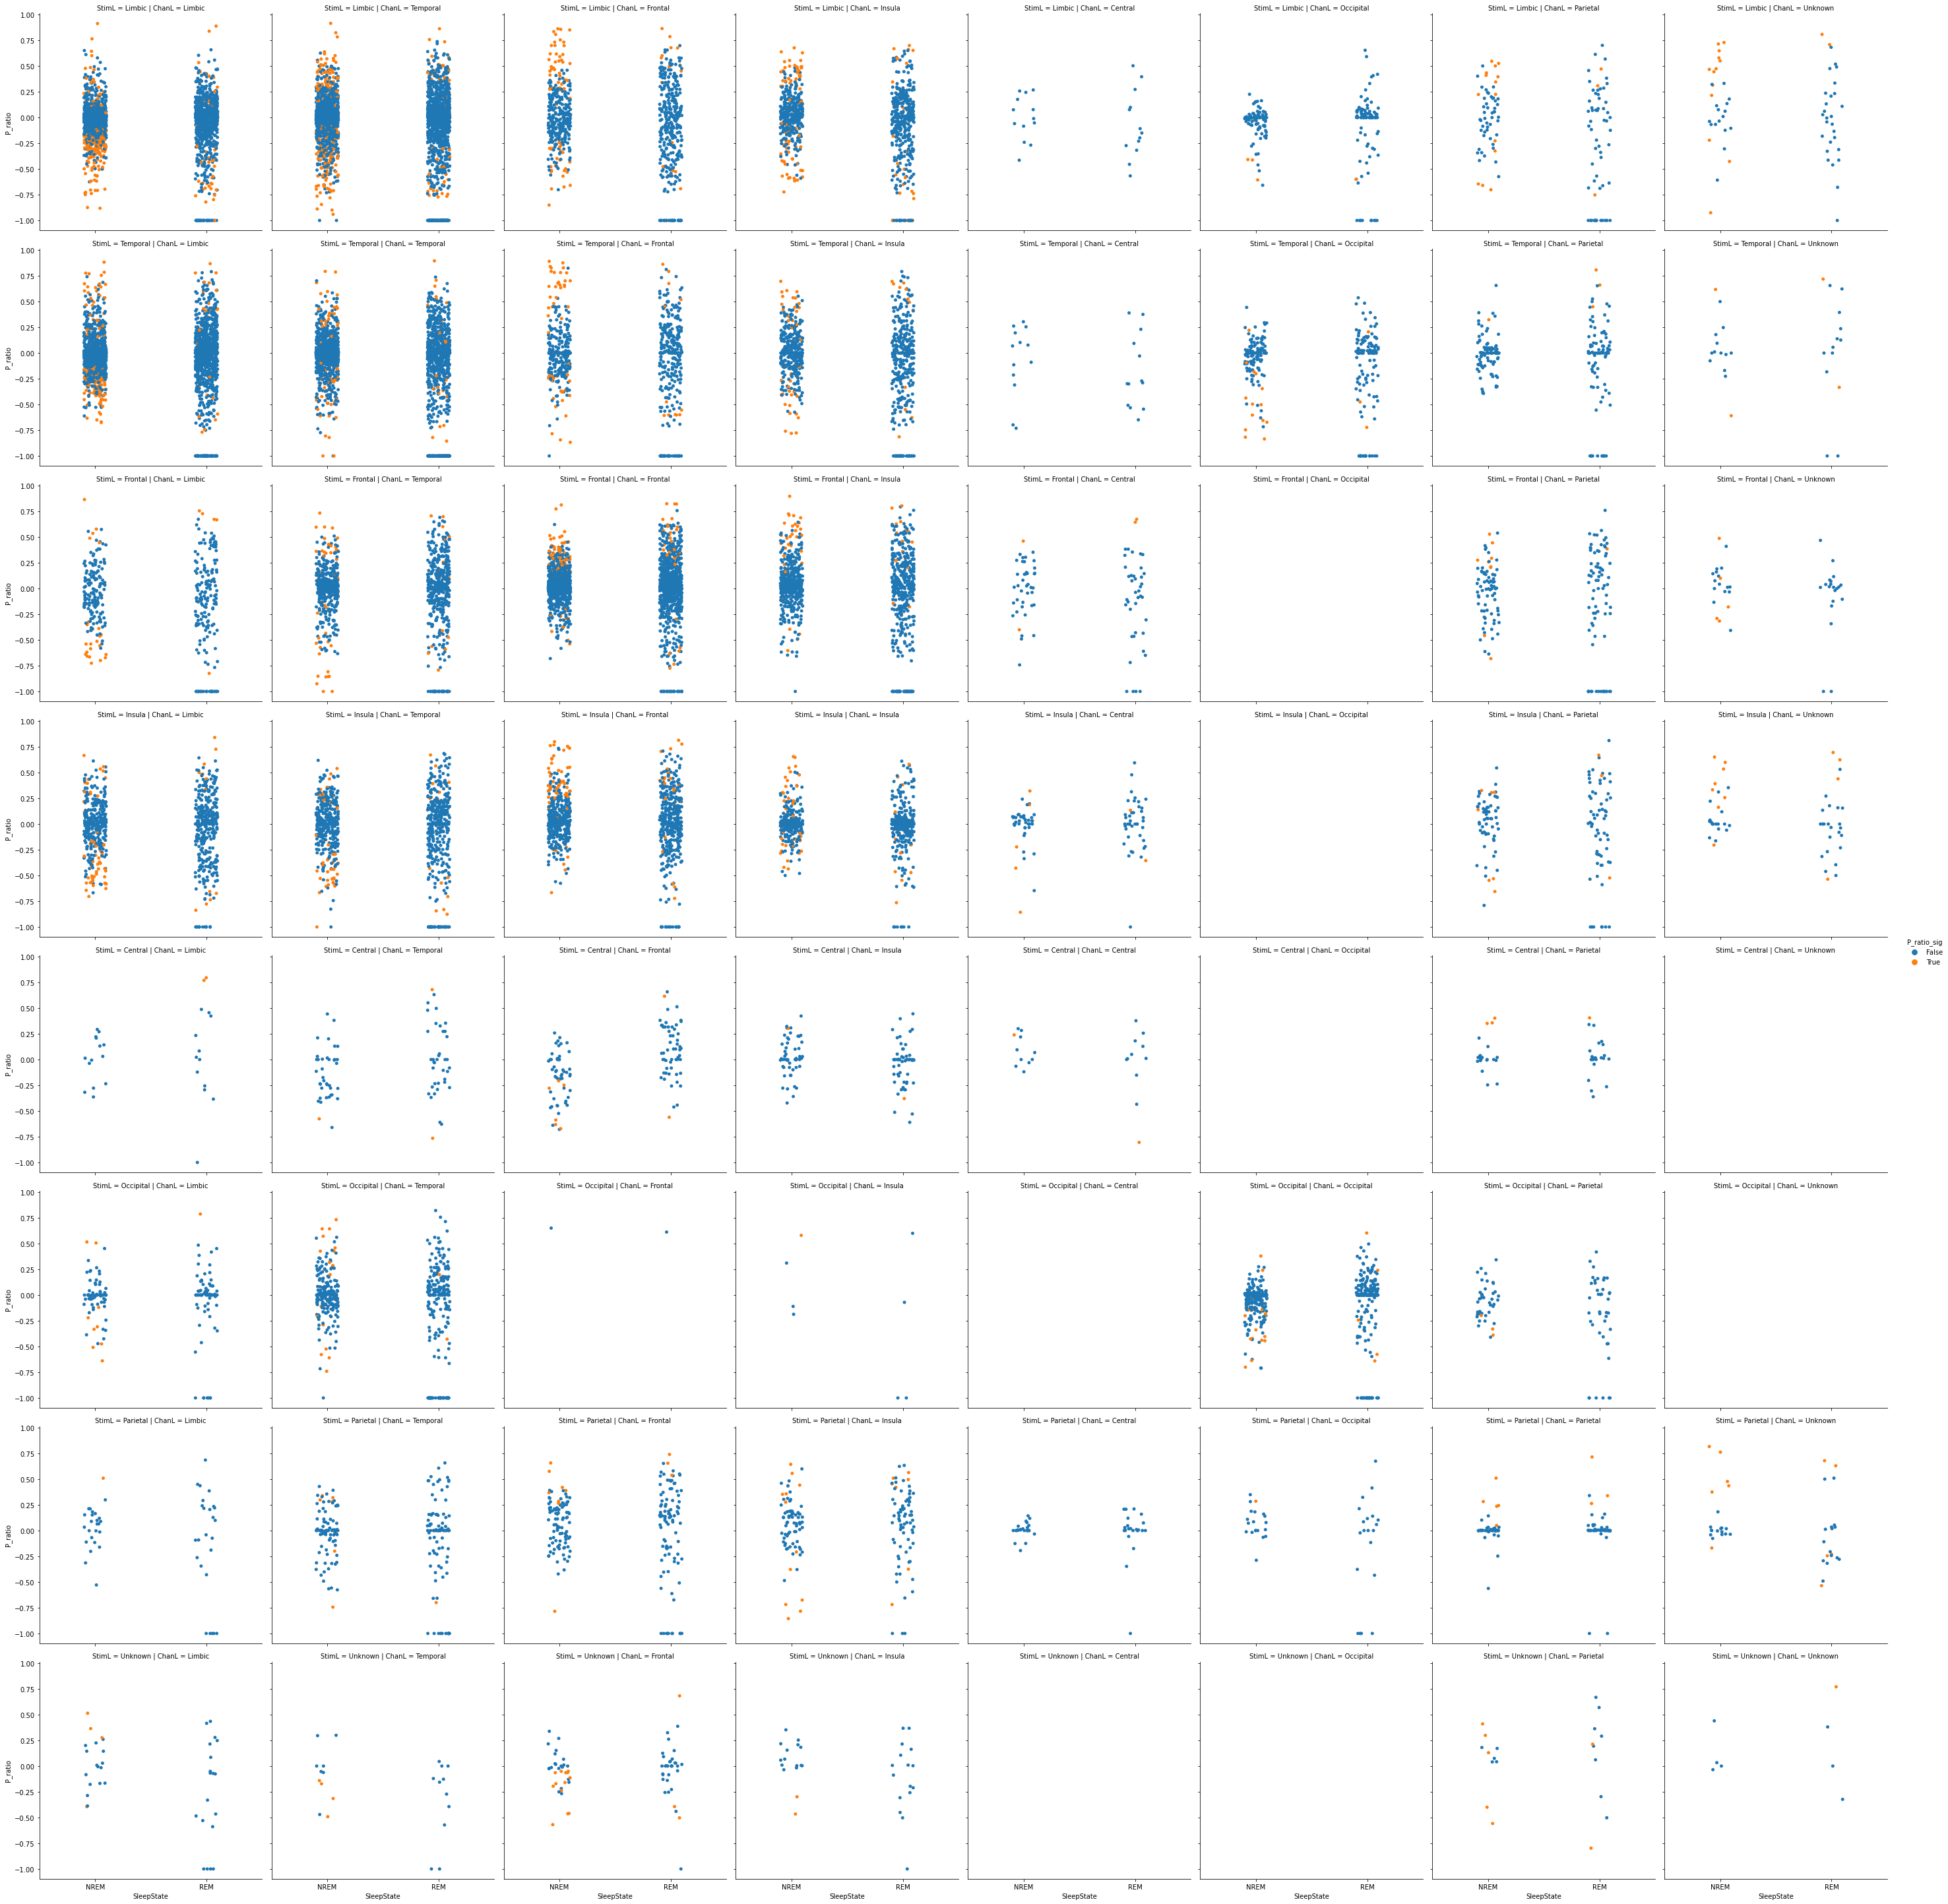

In [374]:
sns.catplot(x='SleepState', y= 'P_ratio',hue  ='P_ratio_sig', data=data_con[~np.isnan(data_con.P_ratio)&(data_con.SleepState!='NREM1')&(data_con.SleepState!='Wake')], row='StimL', col = 'ChanL', kind='strip')

In [5]:
start

NameError: name 'start' is not defined

### NETWORK SLEEP

In [43]:
sleepstate_labels = ['NREM', 'REM']
r_order = ["Orbitofrontal", "Dorsofrontal", "Central", ' Cingular', 'Insula', 'Superotemporal', 'Laterotemporal',
           'Basotemporal', 'Mesiotemporal', 'Sylvian', 'Parietal', 'Occipital']

In [25]:
data_con

StimL     ChanL   Subj StimA ChanA          StimR           ChanR  \
0       Limbic    Limbic  EL019   Amy   Amy  Mesiotemporal   Mesiotemporal   
1       Limbic    Limbic  EL019   Amy   Amy  Mesiotemporal   Mesiotemporal   
2       Limbic    Limbic  EL019   Amy   Amy  Mesiotemporal   Mesiotemporal   
3       Limbic  Temporal  EL019   Amy   STG  Mesiotemporal  Laterotemporal   
4       Limbic  Temporal  EL019   Amy   STG  Mesiotemporal  Laterotemporal   
...        ...       ...    ...   ...   ...            ...             ...   
50328  Frontal   Frontal  EL017   SFS   IFS   Dorsofrontal    Dorsofrontal   
50329  Frontal   Frontal  EL017   SFS   IFS   Dorsofrontal    Dorsofrontal   
50330  Frontal   Frontal  EL017   SFS   SFS   Dorsofrontal    Dorsofrontal   
50331  Frontal   Frontal  EL017   SFS   SFS   Dorsofrontal    Dorsofrontal   
50332  Frontal   Frontal  EL017   SFS   SFS   Dorsofrontal    Dorsofrontal   

        Stim   Chan SleepState  H      Prob         LL            Dist  \
0        1.0    3.0       NREM  0  1.000000  11.659413  local (<15 mm)   
1        1.0    3.0        REM  0  1.000000  12.268156  local (<15 mm)   
2        1.0    3.0       Wake  0  0.987730   9.446486  local (<15 mm)   
3        1.0    8.0       NREM  0  0.621622   3.636706   short (<30mm)   
4        1.0    8.0        REM  0  0.800000   3.409969   short (<30mm)   
...      ...    ...        ... ..       ...        ...             ...   
50328  484.0  480.0        REM  0  1.000000   3.549227  local (<15 mm)   
50329  484.0  480.0       Wake  0  1.000000   4.296032  local (<15 mm)   
50330  484.0  482.0       NREM  0  1.000000   9.588881  local (<15 mm)   
50331  484.0  482.0        REM  0  1.000000   6.717892  local (<15 mm)   
50332  484.0  482.0       Wake  0  1.000000   7.940379  local (<15 mm)   

          LL_cd   P_ratio LL_cd_sig P_ratio_sig     d  
0      1.190153  1.012422      True       False   7.0  
1      1.512825  1.012422      True       False   7.0  
2      0.000000  1.000000       NaN         NaN   7.0  
3      0.060039  1.378562     False        True  24.5  
4     -0.150910  1.774150     False       False  24.5  
...         ...       ...       ...         ...   ...  
50328 -0.685965  1.000000     False       False  14.0  
50329  0.000000  1.000000       NaN         NaN  14.0  
50330  1.499568  1.000000      True       False   7.0  
50331 -1.338927  1.000000      True       False   7.0  
50332  0.000000  1.000000       NaN         NaN   7.0  

[50057 rows x 19 columns]

In [26]:
data_plot  = data_con[data_con.H ==0]
chan_ID = np.unique(np.concatenate([data_plot.Stim, data_plot.Chan])).astype('int')

In [38]:
##NODES
G = nx.empty_graph(len(chan_ID))
for i in range(len(chan_ID)):
    if len(data_plot.loc[data_plot.Stim == chan_ID[i], 'Subj'].values) > 0:
        G.nodes[i]["subj"] = data_plot.loc[data_plot.Stim == chan_ID[i], 'Subj'].values[0]
        G.nodes[i]["area"] = data_plot.loc[data_plot.Stim == chan_ID[i], 'StimA'].values[0]
        G.nodes[i]["region"] = data_plot.loc[data_plot.Stim == chan_ID[i], 'StimR'].values[0]
        G.nodes[i]["label"] = data_plot.loc[data_plot.Stim == chan_ID[i], 'StimA'].values[0]+'_'+str(i)
        G.nodes[i]["lobe"] = data_plot.loc[data_plot.Stim == chan_ID[i], 'StimL'].values[0]
    else:
        G.nodes[i]["subj"] = data_plot.loc[data_plot.Chan == chan_ID[i], 'Subj'].values[0]
        G.nodes[i]["area"] = data_plot.loc[data_plot.Chan == chan_ID[i], 'ChanA'].values[0]
        G.nodes[i]["region"] = data_plot.loc[data_plot.Chan == chan_ID[i], 'ChanR'].values[0]
        G.nodes[i]["label"] = data_plot.loc[data_plot.Chan == chan_ID[i], 'ChanA'].values[0]+'_'+str(i)
        G.nodes[i]["lobe"] = data_plot.loc[data_plot.Chan == chan_ID[i], 'ChanL'].values[0]



In [47]:
change_labels =['non', 'stable', 'decrease', 'increase']

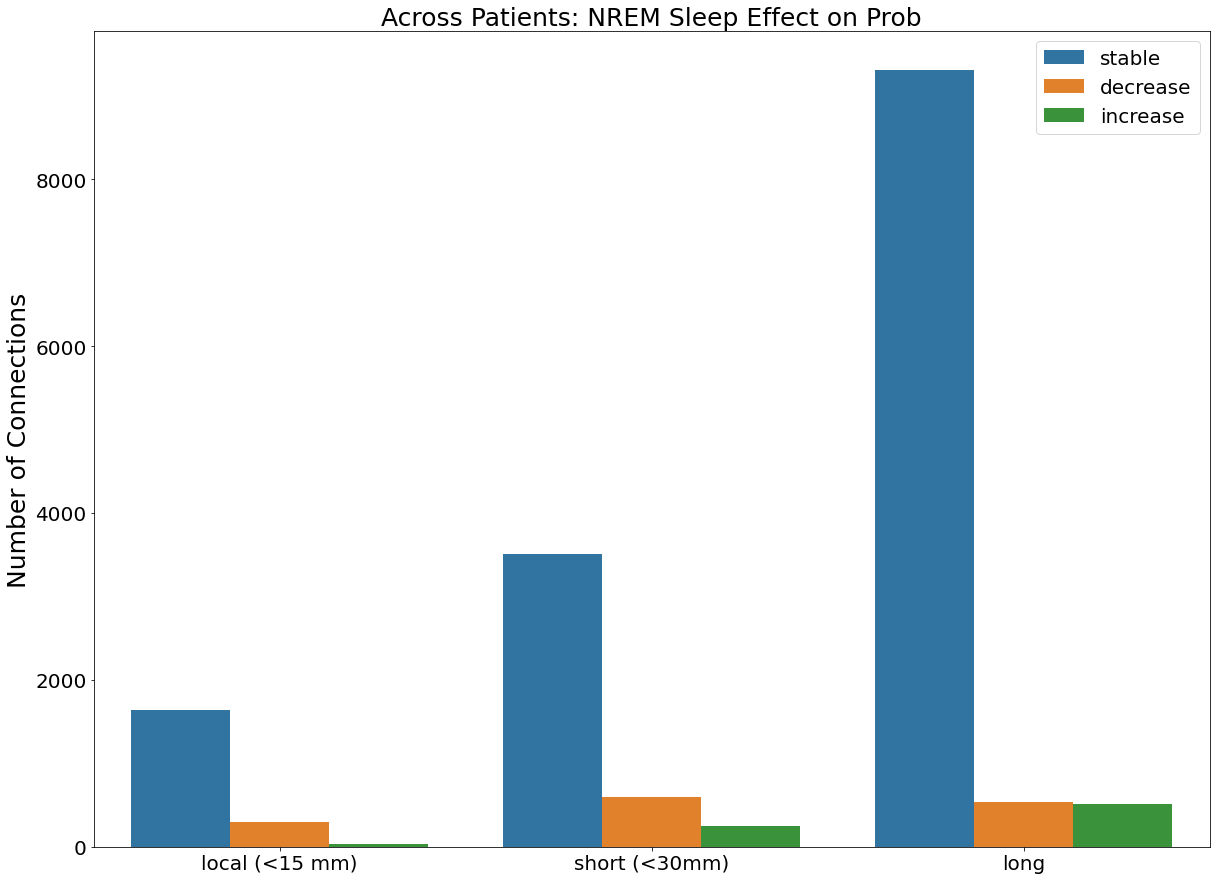

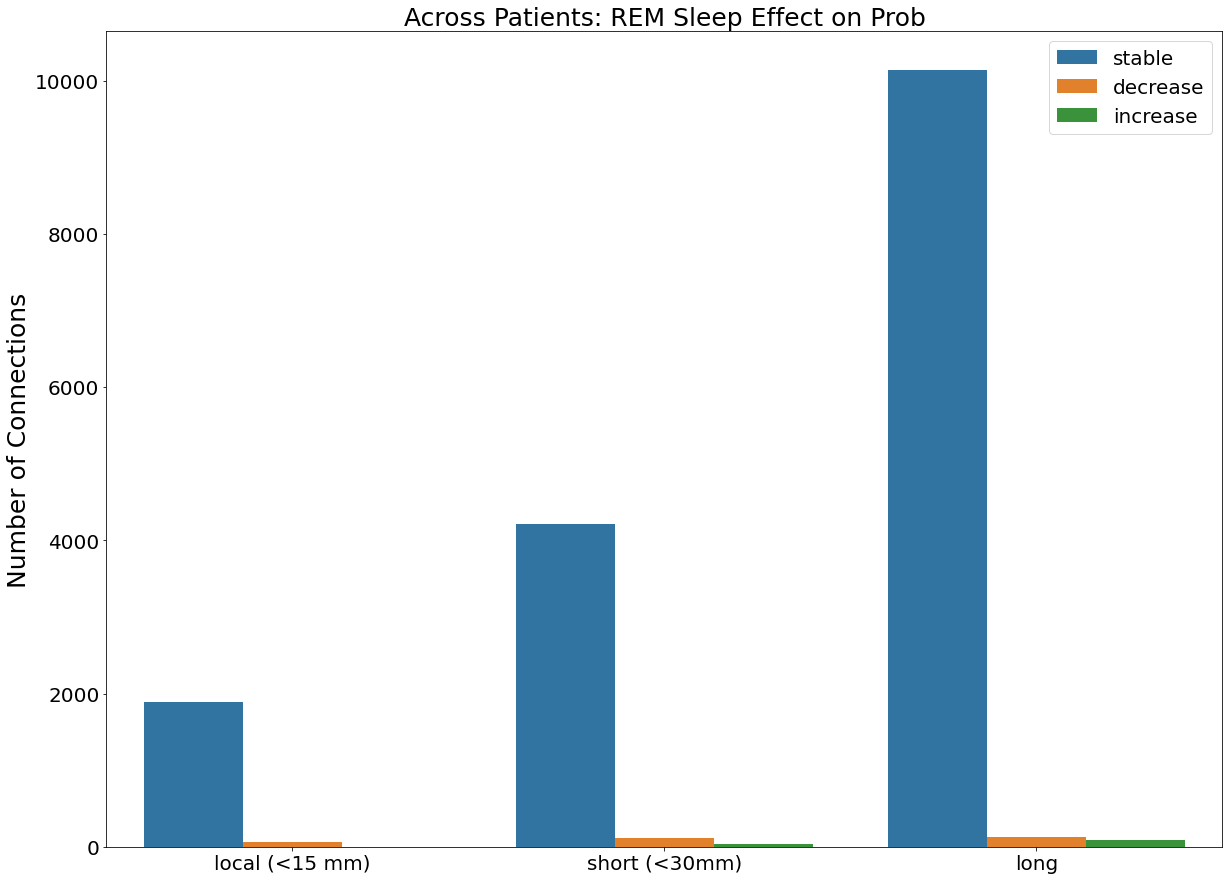

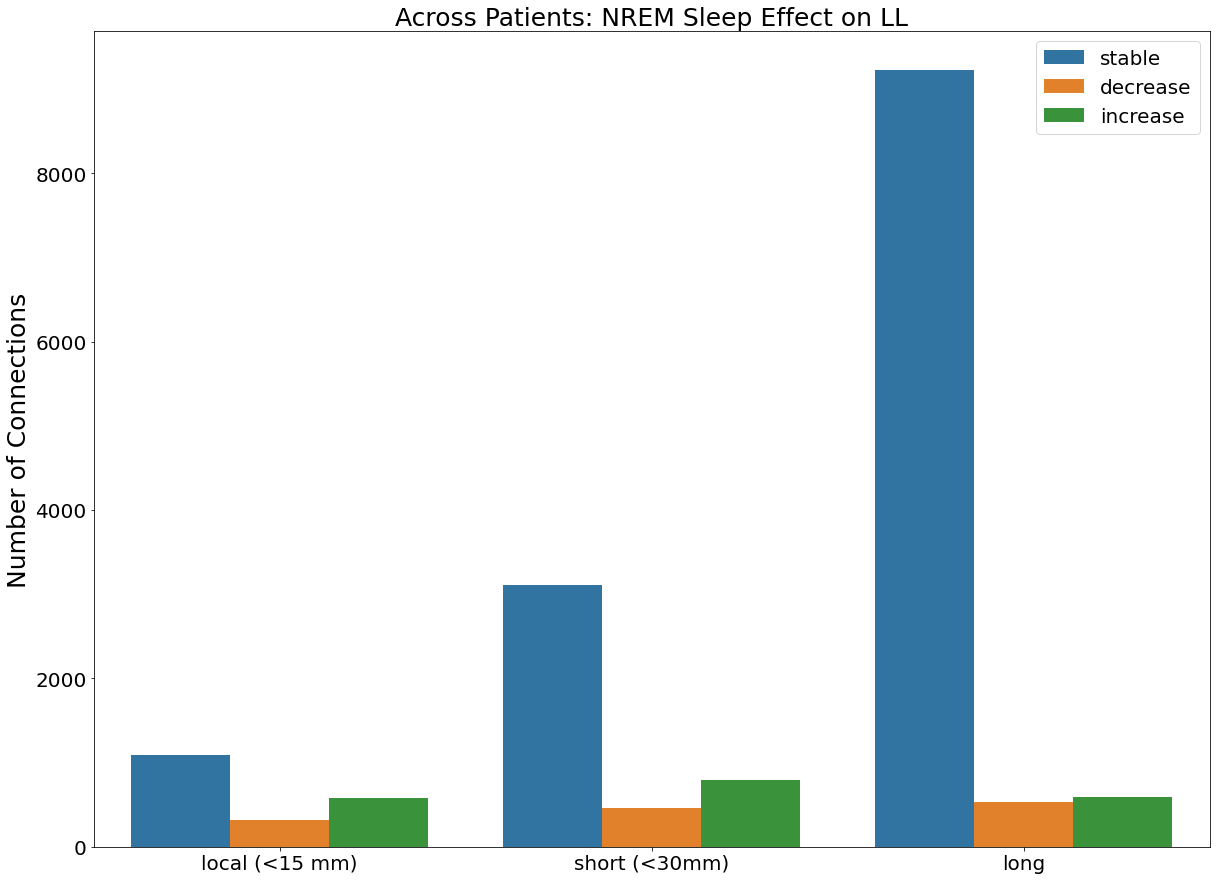

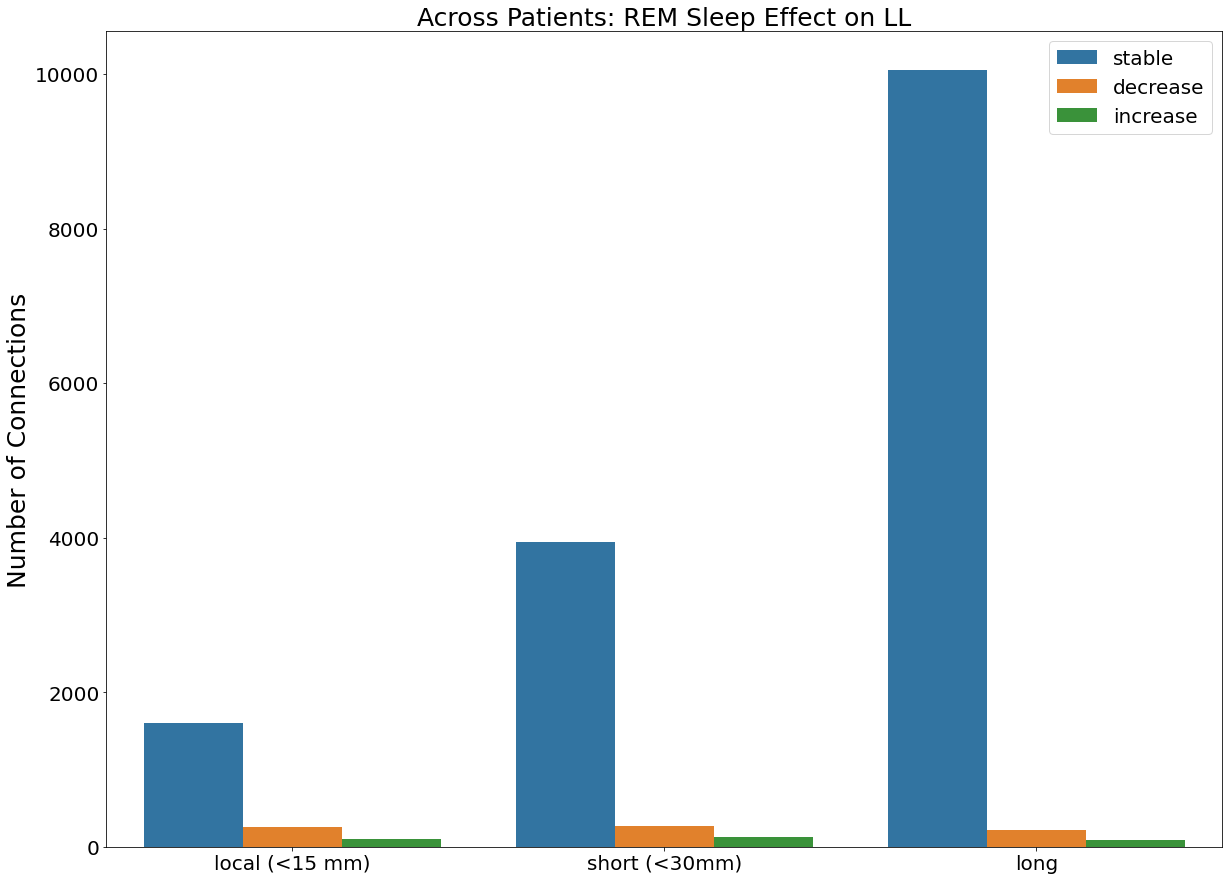

In [29]:
for test_label, test_label2 in zip(['prob_wake', 'ttest_wake'],['Prob', 'LL']): 
    for ss in ['NREM','REM']:
        plt.figure(figsize=(20, 15))
        plt.title('Across Patients: ' +ss + ' Sleep Effect on ' + test_label2, fontsize=25)
        sns.countplot(x='Dist', hue=test_label, data=data_con[data_con.SleepState == ss])
        plt.legend(['stable', 'decrease', 'increase'], fontsize=20)
        plt.ylabel('Number of Connections', fontsize=25)
        plt.xlabel('')
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.show()

Text(0.5, 1.0, 'NREM -- decrease')

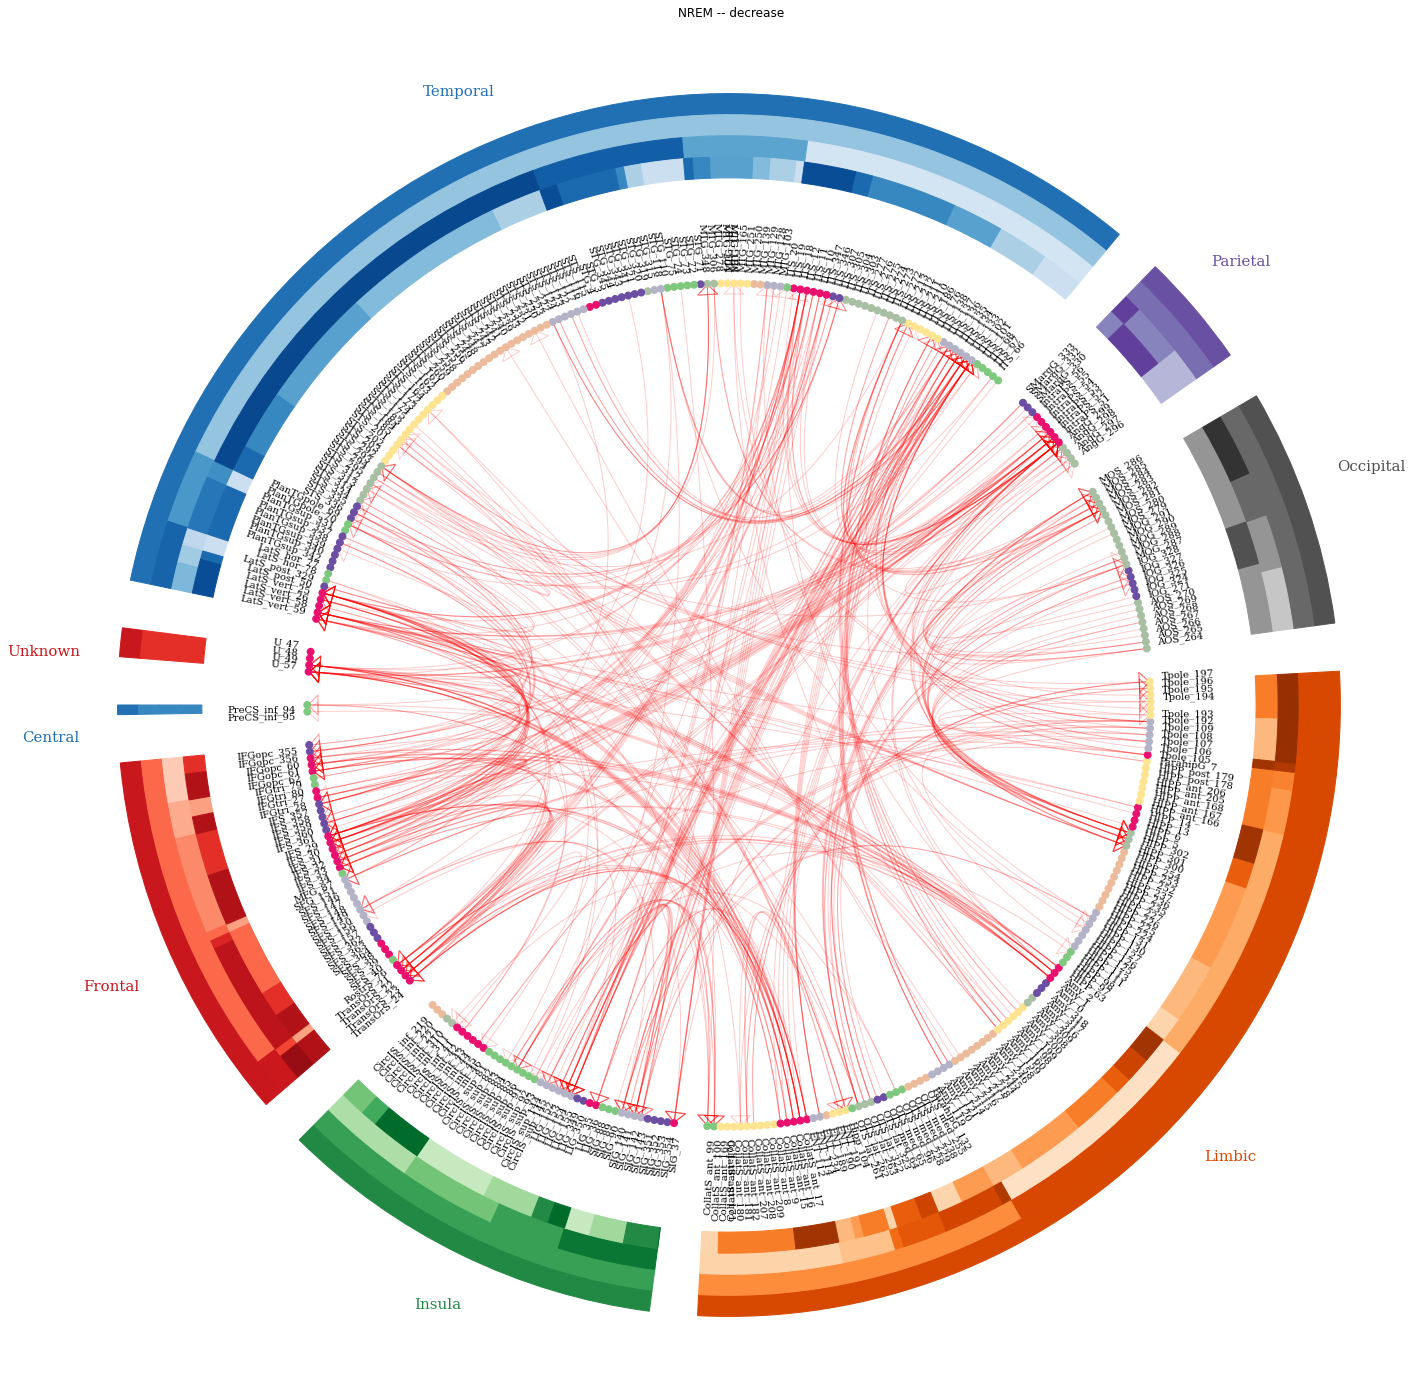

In [50]:
G.remove_edges_from(G.edges())
df_2_edges = data_plot[(data_plot.SleepState == ss)&(data_plot.SleepState == ss)&(data_plot['LL_cd_sig'] == 1)&(data_plot.LL_cd<0)&(data_plot.d>30)]
df_2_edges = df_2_edges.reset_index(drop=True)
for i in range(len(df_2_edges)): # 
    c = 'b'
    di = np.random.choice([0,1])
    G.add_edge(np.where(chan_ID == df_2_edges.Stim.values[i].astype('int'))[0][0],
               np.where(chan_ID == df_2_edges.Chan.values[i].astype('int'))[0][0], color=c, direction = di)

c = CircosPlot(
    G,
    node_grouping="lobe",
    node_subgrouping=["region", "area","subj"],
    node_color="subj",
    node_labels= True,
    node_label= 'label',
    group_label_position="middle",
    group_label_color=True,
    group_label_offset=65,
    figsize=(25,25), 
    fontsize=15
)
c.draw()
plt.title(ss+ ' -- decrease')

Text(0.5, 1.0, 'NREM -- increase')

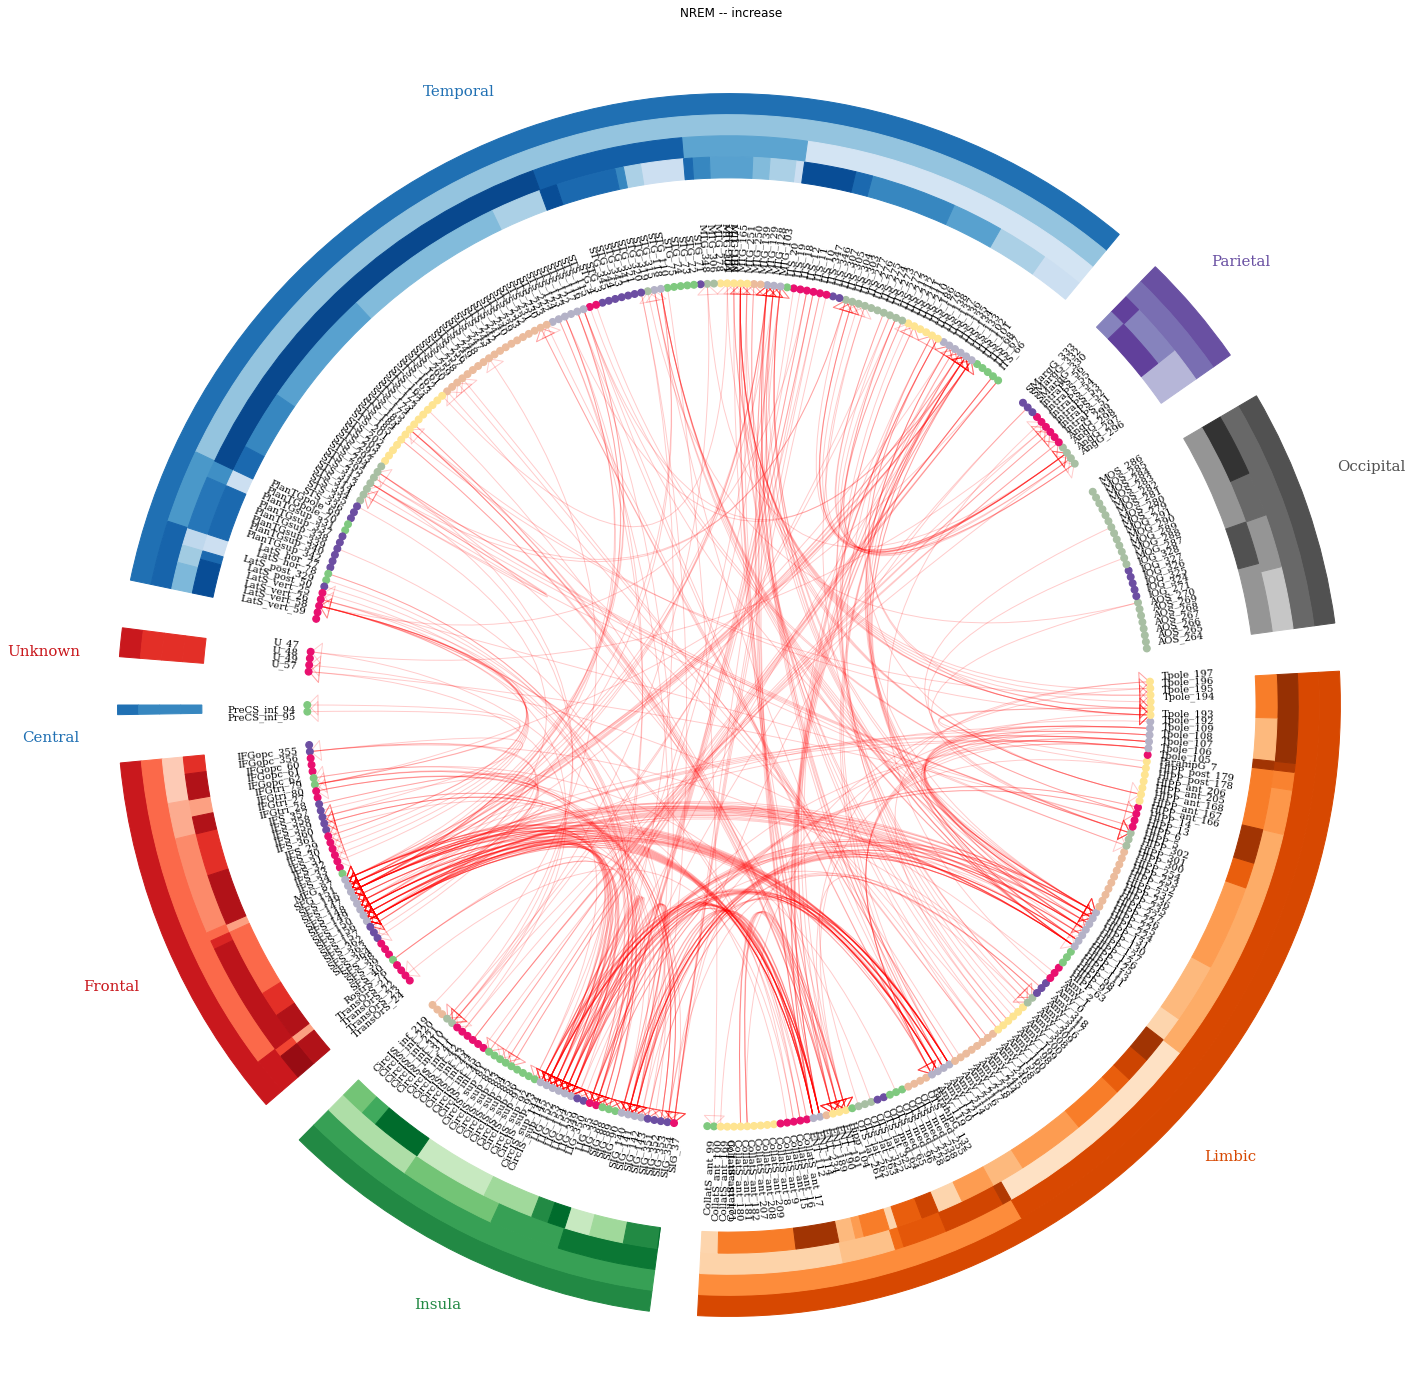

In [49]:
ss = 'NREM'

G.remove_edges_from(G.edges())
df_2_edges = data_plot[(data_plot.SleepState == ss)&(data_plot['LL_cd_sig'] == 1)&(data_plot.LL_cd>0)&(data_plot.d>30)]
df_2_edges = df_2_edges.reset_index(drop=True)
for i in range(len(df_2_edges)): # 
    c = 'b'
    di = np.random.choice([0,1])
    G.add_edge(np.where(chan_ID == df_2_edges.Stim.values[i].astype('int'))[0][0],
               np.where(chan_ID == df_2_edges.Chan.values[i].astype('int'))[0][0], color=c, direction = di)

c = CircosPlot(
    G,
    node_grouping="lobe",
    node_subgrouping=["region","area","subj"],
    node_color="subj",
    node_labels= True,
    node_label= 'label',
    group_label_position="middle",
    group_label_color=True,
    group_label_offset=65,
    figsize=(25,25), 
    fontsize=15
)
c.draw()
plt.title(ss+ ' -- increase')

In [15]:
## edges
for test_label, test_label2 in zip(['prob_wake', 'ttest_wake'],['Prob', 'LL']): 
    for ss in ['NREM','REM']:
        for change in [2,3]:

            G.remove_edges_from(G.edges())
            df_2_edges = data_plot[(data_plot.SleepState == ss)&(data_plot[test_label] == change)&(data_plot.d < 30)]
            df_2_edges = df_2_edges.reset_index(drop=True)
            for i in range(len(df_2_edges)): # 
                c = 'b'
                di = np.random.choice([0,1])
                G.add_edge(np.where(chan_ID == df_2_edges.Stim.values[i].astype('int'))[0][0],
                           np.where(chan_ID == df_2_edges.Chan.values[i].astype('int'))[0][0], color=c, direction = di)
                
            c = CircosPlot(
                G,
                node_grouping="region",
                node_subgrouping=["area","subj"],
                node_color="subj",
                node_labels= True,
                node_label= 'label',
                group_label_position="middle",
                group_label_color=True,
                group_label_offset=65,
                figsize=(25,25), 
                fontsize=15
            )
            c.draw()
            plt.title(test_label2+' '+change_labels[change]+' in '+ss+', short connections')
            plt.savefig('Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\connectogram\\figures\\'+test_label2+'_'+change_labels[change]+'_'+ss+'_short.svg')
            plt.savefig('Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\connectogram\\figures\\'+test_label2+'_'+change_labels[change]+'_'+ss+'_short.jpg')
            plt.close()
## edges
for test_label, test_label2 in zip(['prob_wake', 'ttest_wake'],['Prob', 'LL']):
    
    for ss in ['NREM','REM']:
        for change in [2,3]:

            G.remove_edges_from(G.edges())
            df_2_edges = data_plot[(data_plot.SleepState == ss)&(data_plot[test_label] == change)&(data_plot.d > 30)]
            df_2_edges = df_2_edges.reset_index(drop=True)
            for i in range(len(df_2_edges)): # 
                c = 'b'
                di = np.random.choice([0,1])
                G.add_edge(np.where(chan_ID == df_2_edges.Stim.values[i].astype('int'))[0][0],
                           np.where(chan_ID == df_2_edges.Chan.values[i].astype('int'))[0][0], color=c, direction = di)
                
            c = CircosPlot(
                G,
                node_grouping="region",
                node_subgrouping=["area","subj"],
                node_color="subj",
                node_labels= True,
                node_label= 'label',
                group_label_position="middle",
                group_label_color=True,
                group_label_offset=65,
                figsize=(25,25), 
                fontsize=15
            )
            c.draw()
            plt.title(test_label2+' '+change_labels[change]+' in '+ss+', long connections')
            
            plt.savefig('Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\connectogram\\figures\\'+test_label2+'_'+change_labels[change]+'_'+ss+'_long.svg')
            plt.savefig('Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\connectogram\\figures\\'+test_label2+'_'+change_labels[change]+'_'+ss+'_long.jpg')
            plt.close()

In [ ]:
stop

In [ ]:
sns.scatterplot(x='d', y='Prob', hue='ttest_wake', data= data_plot_P[data_plot_P.SleepState=='NREM'])

In [ ]:
sns.scatterplot(x='d', y='Prob', hue='Subj', data= data_plot_P[data_plot_P.SleepState=='NREM'])

In [ ]:
sns.scatterplot(x='d', y='Prob', hue='Subj', data= data_plot_P[data_plot_P.SleepState=='NREM'])

In [ ]:
sns.catplot( x= 'Dist', hue='prob_wake', data= data_plot_P, kind='count', row='ChanR')

In [ ]:
sns.catplot( x= 'Dist', hue='prob_wake', data= data_plot_P, kind='count', row='ChanR')

## CIRCOS

In [ ]:
t_show = 0
test = 'Prob'
tt = 'prob_wake'

if t_show == 1:
    test = 'LL'
    tt = 'ttest_wake'

In [ ]:
ss = 0
df_2 = data_con[data_con.SleepState == sleepstate_labels[ss]]
chan_ID = np.unique(np.concatenate([df_2.Stim, df_2.Chan])).astype('int')

In [ ]:
i = 0
lobe = df_2.loc[df_2.Stim == chan_ID[i], 'StimR'].values[0]
par = df_2.loc[df_2.Stim == chan_ID[i], 'StimA'].values[0] + '_' + str(chan_ID[i])
z1 = str(float(df_2.loc[df_2.Stim == chan_ID[i], 'Subj'].values[0][-2:]) / 100)
Map = pd.DataFrame([[lobe, par, '0', '0', '0', z1, z1, z1, z1]],
                   columns=['region', 'parcelation', 'r', 'g', 'b', 'z1', 'z2', 'z3', 'z4'])

In [ ]:
for i in range(1, len(chan_ID)):
    if len(df_2.loc[df_2.Stim == chan_ID[i], 'Subj'].values) > 0:
        lobe = df_2.loc[df_2.Stim == chan_ID[i], 'StimR'].values[0]
        par = df_2.loc[df_2.Stim == chan_ID[i], 'StimA'].values[0] + '_' + str(chan_ID[i])
        z1 = float(df_2.loc[df_2.Stim == chan_ID[i], 'Subj'].values[0][-2:]) / 100
    else:
        lobe = df_2.loc[df_2.Chan == chan_ID[i], 'ChanR'].values[0]
        par = df_2.loc[df_2.Chan == chan_ID[i], 'ChanA'].values[0] + '_' + str(chan_ID[i])
        z1 = str(float(df_2.loc[df_2.Chan == chan_ID[i], 'Subj'].values[0][-2:]) / 100)
    Map_row = pd.DataFrame([[lobe, par, '0', '0', '0', z1, z1, z1, z1]],
                           columns=['region', 'parcelation', 'r', 'g', 'b', 'z1', 'z2', 'z3', 'z4'])

    Map = pd.concat([Map, Map_row])
Map = Map.reset_index(drop=True)
Map = Map.sort_values(by="parcelation")
Map = Map.reset_index(drop=True)
Map['region'] = pd.Categorical(Map['region'], r_order)
Map = Map.sort_values(by="region")
Map = Map.reset_index(drop=True)
lobes = np.unique(Map.region)

In [ ]:
path_map = 'Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\connectogram\\' +sleepstate_labels[ss] + '\\' + test + '\\raw/map.txt'
with open(path_map, 'a') as f:
    dfAsString = Map.to_string(header=False, index=False)
    f.write(dfAsString)

##### Edges

In [ ]:
path_links = 'Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\Across\BrainMapping\Sleep\connectogram\\' +sleepstate_labels[ss] + '\\' + test + '\\raw/map.links.txt'

In [ ]:
i = 0
df_2 = df_2[df_2[tt] > 1]
p1 = df_2.StimA.values[i] + '_' + str(int(df_2.Stim.values[i]))
p2 = df_2.ChanA.values[i] + '_' + str(int(df_2.Chan.values[i]))
score = df_2[tt].values[i]
t = 0
h = 'l'
if score == 3:
    t = 1
    h = 'r'

M_links = pd.DataFrame([[h, p1, h, p2, str(t), str(score)]], columns=['h1', 'p1', 'h2', 'p2', 'type', 'score'])

In [ ]:
for i in range(1, len(df_2)):
    p1 = df_2.StimA.values[i] + '_' + str(int(df_2.Stim.values[i]))
    p2 = df_2.ChanA.values[i] + '_' + str(int(df_2.Chan.values[i]))
    score = df_2[tt].values[i]
    t = 0
    h = 'l'
    if score == 3:
        t = 1
        h = 'r'
    M_links_new = pd.DataFrame([[h, p1, h, p2, str(t), str(score)]], columns=['h1', 'p1', 'h2', 'p2', 'type', 'score'])
    M_links = pd.concat([M_links, M_links_new])
M_links = M_links.reset_index(drop=True)

In [ ]:
with open(path_links, 'a') as f:
    dfAsString = M_links.to_string(header=False, index=False)
    f.write(dfAsString)

### heatmap

In [ ]:
t_show = 0
test = 'Prob'
tt = 'prob_wake'

In [ ]:
for t_show in range(2):
    if t_show == 1:
        test = 'LL'
        tt = 'ttest_wake'
    for ss in range(2):
        plt.figure(figsize=(20, 15))
        plt.title('Across Patients: ' + sleepstate_labels[ss] + ' Sleep Effect on ' + test, fontsize=25)
        sns.countplot(x='Dist', hue=tt, data=data_con[data_con.SleepState == sleepstate_labels[ss]])
        plt.legend(['stable', 'decrease', 'increase'], fontsize=20)
        plt.ylabel('Number of Connections', fontsize=25)
        plt.xlabel('')
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.show()

In [ ]:
t_show = 0
test = 'Prob'
tt = 'prob_wake'

if t_show == 1:
    test = 'LL'
    tt = 'ttest_wake'

In [ ]:
e_val = 3
e = 'increase'
if e_val == 2:
    e = 'decrease'
if e_val == 1:
    e = 'no'

In [ ]:
data_con_sig = data_con[(data_con[tt] == e_val) & (data_con.SleepState == sleepstate_labels[ss])]
df = data_con_sig.groupby(['StimR', 'ChanR'], as_index=False)[[tt]].count()
df[tt] = np.round(df[tt], 2)
df_p = df.pivot("StimR", "ChanR", tt)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))  # mask

fig.patch.set_facecolor('xkcd:black')
plt.title(e + ' ' + sleepstate_labels[ss] + ' Sleep Effect on ' + test, fontsize=25, color=[1, 1, 1])
g = sns.heatmap(df_p, annot=True, cmap='hot', vmin=0)
g.set_facecolor('xkcd:black')

plt.ylabel('A', fontsize=20, color="white")
plt.xlabel('B', fontsize=20, color="white")
plt.yticks(fontsize=15, color="white")
plt.xticks(fontsize=15, color="white", rotation=90)
plt.show()

## Networkx Visualization

#### DiGraph

In [ ]:
G = nx.DiGraph()
for i in range(len(chan_ID)):
    if len(df_2.loc[df_2.Stim == chan_ID[i], 'Subj'].values) > 0:
        G.add_node(chan_ID[i], subj=df_2.loc[df_2.Stim == chan_ID[i], 'Subj'].values[0],
                   area=df_2.loc[df_2.Stim == chan_ID[i], 'StimA'].values[0],
                   region=df_2.loc[df_2.Stim == chan_ID[i], 'StimR'].values[0])
    else:
        G.add_node(chan_ID[i], subj=df_2.loc[df_2.Chan == chan_ID[i], 'Subj'].values[0],
                   area=df_2.loc[df_2.Chan == chan_ID[i], 'ChanA'].values[0],
                   region=df_2.loc[df_2.Chan == chan_ID[i], 'StimA'].values[0])

In [ ]:
for i in range(len(df_2)):
    G.add_edge(df_2.Stim.values[i].astype('int'), df_2.Chan.values[i].astype('int'),
               weight=df_2.Dir_index.values[i].astype('int'))

#### complete GRaph

In [ ]:
ss = 0
df_2 = data_con[data_con.SleepState == sleepstate_labels[ss]]
chan_ID = np.unique(np.concatenate([df_2.Stim, df_2.Chan])).astype('int')
df_2 = df_2.reset_index(drop=True)

In [ ]:
G = nx.empty_graph(len(chan_ID))
for i in range(len(chan_ID)):
    if len(df_2.loc[df_2.Stim == chan_ID[i], 'Subj'].values) > 0:
        G.nodes[i]["subj"] = df_2.loc[df_2.Stim == chan_ID[i], 'Subj'].values[0]
        G.nodes[i]["area"] = df_2.loc[df_2.Stim == chan_ID[i], 'StimA'].values[0]
        G.nodes[i]["region"] = df_2.loc[df_2.Stim == chan_ID[i], 'StimR'].values[0]
    else:
        G.nodes[i]["subj"] = df_2.loc[df_2.Chan == chan_ID[i], 'Subj'].values[0]
        G.nodes[i]["area"] = df_2.loc[df_2.Chan == chan_ID[i], 'ChanA'].values[0]
        G.nodes[i]["region"] = df_2.loc[df_2.Chan == chan_ID[i], 'ChanR'].values[0]

In [ ]:
df_2_edges = df_2[df_2.prob_wake>1]
df_2_edges = df_2_edges.reset_index(drop=True)

In [ ]:
for i in range(len(df_2_edges)):
    c = 'b'
    if df_2_edges.prob_wake.values[i].astype('int') ==3:
        c = 'r'
    G.add_edge(np.where(chan_ID == df_2_edges.Stim.values[i].astype('int'))[0][0],
               np.where(chan_ID == df_2_edges.Chan.values[i].astype('int'))[0][0],
               weight=df_2_edges.prob_wake.values[i].astype('int'), color=c)

In [ ]:
import sys
sys.path.append('T:\EL_experiment\Codes\CCEP_human\Python_Analysis\visualization')

In [ ]:
### The required libraries and packages ###
import networkx as nx
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nxviz
from nxviz.plots_cust import CircosPlot, MatrixPlot, ArcPlot, BasePlot

In [ ]:
node_grouping = 'region'
node_order = ['area', 'subj']
grouping_all = node_order.copy()
grouping_all.insert(0, node_grouping)

nodes = [n for n, d in sorted(G.nodes(data=True), key =lambda x: [x[1] [grouping_all[n]] for n in range(len(grouping_all))])]

In [ ]:
from collections import Counter

In [ ]:
data = [G.nodes[n]['region'] for n in G.nodes]
node_length = len(data)
groups = Counter(data)

In [ ]:
data = [G.nodes[n][grouping_all[1]] for n in nodes]

In [ ]:
data_unique= np.unique(data)

In [ ]:
vec = np.array(np.array(data) == data_unique[0])*1

In [ ]:
import  itertools 

## plot subgroups

In [ ]:
self.grapj = G 

In [ ]:
node_grouping

In [ ]:
nodes # sle.fnodes (nodes numbers order by correct order)
grouping_all #['region', 'area', 'subj']
regions = [G.nodes[n][node_grouping] for n in nodes]

In [ ]:
np.unique(regions)[5]

In [ ]:
reg = 6 # first region
group_type = 0 # first subgroup
SG = G.subgraph([n for n, attrdict in G.nodes.items() if
                                          attrdict[node_grouping] == np.unique(regions)[reg]])
SG_nodes = [n for n, d in sorted(SG.nodes(data=True),
                                              key=lambda x: [x[1][grouping_all[n]] for n in range(len(grouping_all))])]

data = [SG.nodes[n][grouping_all[1]] for n in SG_nodes] #different subroup labels
data_unique = np.unique(data) # subgroup labels, unique
data_unique

In [ ]:
nodes_arr = np.array(nodes)

In [ ]:
nodes.shape

In [ ]:
np.isin(nodes,SG_nodes)

In [ ]:
SG_nodes

In [ ]:
for sg in range(len(data_unique)):
    vec = np.array(np.array(data) == data_unique[sg]) * 1
    seqs = [(key, len(list(val))) for key, val in itertools.groupby(vec)]
    # find start positions of sequences
    # seqs = [(key, start, length), ...]
    seqs = [(key, sum(s[1] for s in seqs[:i]), len) for i, (key, len) in enumerate(seqs)]
    ix = np.array([[s[1], s[1] + s[2]] for s in seqs if s[0] == 1])
    ix[ix >= len(SG_nodes)] = len(SG_nodes) - 1
    for i in range(len(ix)):
        node_start = SG_nodes[ix[i, 0]]
        node_end = SG_nodes[ix[i, 1]]
        print(node_start, node_end)

In [ ]:
SG_nodes

In [ ]:
SG_nodes[ix[0,1]]

In [ ]:
ix

In [ ]:
sg = 4
vec = np.array(np.array(data) == data_unique[sg]) * 1
seqs = [(key, len(list(val))) for key, val in itertools.groupby(vec)]
# find start positions of sequences
# seqs = [(key, start, length), ...]
seqs = [(key, sum(s[1] for s in seqs[:i]), len) for i, (key, len) in enumerate(seqs)]
ix = np.array([[s[1], s[1] + s[2]] for s in seqs if s[0] == 1])
ix

In [ ]:
ix

In [ ]:
SG_nodes

In [ ]:
seqs = [(key, len(list(val))) for key, val in itertools.groupby(vec)]
# find start positions of sequences
# seqs = [(key, start, length), ...]
seqs = [(key, sum(s[1] for s in seqs[:i]), len) for i, (key, len) in enumerate(seqs)]
ix = np.array([[s[1], s[1] + s[2] - 1] for s in seqs if s[0] == 1])

In [ ]:
ix = np.where(nodes_dummies == -1)[0]
ix = np.insert(ix, 0, -1)
ix = np.sort(np.insert(ix, -1, len(nodes_dummies)+1))
ix = np.reshape(ix, (-1, 2))
ix[:, 1] = ix[:, 1] -1
ix[:,0] = ix[:, 0] +1

In [ ]:
for i in range(2):
    c = 'b'
    if df_2_edges.prob_wake.values[i].astype('int') ==3:
        c = 'r'
    G.add_edge(np.where(chan_ID == df_2_edges.Stim.values[i].astype('int'))[0][0],
               np.where(chan_ID == df_2_edges.Chan.values[i].astype('int'))[0][0],
               weight=df_2_edges.prob_wake.values[i].astype('int'), color=c)

In [ ]:
for i, (start, end) in enumerate(G.edges()):
    print(i, (start, end))

In [ ]:
for i in range(len(ix)-1):
    node_start = nodes_dummies[ix[i, 0]]
    node_end =nodes_dummies[ix[i, 1]]
    print(node_start)
    print(node_end)

In [ ]:
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return np.array(tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3)))/256

In [ ]:
hex_to_rgb(sns.color_palette('Blues', 2).as_hex()[0])

In [ ]:
sns.color_palette('Blues', 2).as_hex()[:]

In [ ]:
G.nodes.items()

In [ ]:
SG = G.subgraph( [n for n,attrdict in G.nodes.items() if attrdict ['region'] == 'Mesiotemporal'])

In [ ]:
SG.nodes()

In [ ]:
SG.nodes()

In [ ]:
G.nodes(data=True)

In [ ]:

c = CircosPlot(
    G,
    node_grouping="region",
    node_color="region",
    node_order="region",
    node_labels=True,
    group_label_position="middle",
    group_label_color=True,
    group_label_offset=6,
    figsize=(20, 20)
)
c.draw()
plt.show()

In [ ]:
def make_graph(nodes_df, edges_df):
    # make graph from nodes and edges
    g = nx.DiGraph()
    for i, row in nodes_df.iterrows():
        keys = row.index.tolist()

        values = row.values

        # The dict contains all attributes

        g.add_node(row['ID'], **dict(zip(keys, values)))

    for i, row in edges_df.iterrows():
        keys = row.index.tolist()

        values = row.values

        g.add_edge(row['source'], row['target'], weight=row['LL_peak'], **dict(zip(keys, values)))

    return g

###  testing functions for nxviz

In [ ]:
circos_radius(10, 20)

In [ ]:
def circos_radius(n_nodes, node_r):
    """
    Automatically computes the origin-to-node centre radius of the Circos plot
    using the triangle equality sine rule.

    a / sin(A) = b / sin(B) = c / sin(C)

    :param n_nodes: the number of nodes in the plot.
    :type n_nodes: int
    :param node_r: the radius of each node.
    :type node_r: float
    :returns: Origin-to-node centre radius.
    """
    A = 2 * np.pi / n_nodes  # noqa
    B = (np.pi - A) / 2  # noqa
    a = 2 * node_r
    return a * np.sin(B) / np.sin(A)